<div style="background-color:#f9f9f9; padding:20px; border-radius:10px; text-align:center; font-size:24px; font-weight:bold;">
 Deliverable 1 — <i>Exploratory Data Analysis (EDA)</i>
</div>

<p style="text-align:center;">
<b>Filipa São João</b> — 20250483<br>
<b>Inês Esteves</b> — 20250455<br>
<b>José Pereira</b> — 20250506<br>
</p>

<div style="background-color:#f9f9f9; padding: 15px; border-left: 5px solid #c3d664; margin-bottom: 15px;">
    
# **<span style="color:#c3d664;">INDEX</span>**

[1. **Customers**](#Customers)<br>
- [1.1. **Data Understanding**](#Data-Understanding)<br>
- [1.2. **Data Introduction**](#Data-Introduction)<br>
- [1.3. **Data Exploration**](#Data-Exploration)<br>
    - [1.3.1. **Duplicates**](#Duplicates)<br>
    - [1.3.2. **Missing Values and Strange Values**](#Missing-Values-and-Strange-Values)<br>
    - [1.3.3. **Visualization**](#Visualization)<br>
- [1.3. **Feature Engineering**](#Feature-Engineering)<br>
    
[2. **Flights**](#Flights)<br>
- [2.1. **Data Understanding**](#data-Understanding)<br>
- [2.2. **Data Introduction**](#data-Introduction)<br>
- [2.3. **Data Exploration**](#data-Exploration)<br>
    - [2.3.1. **Duplicates**](#duplicates)<br>
    - [2.3.2. **Missing Values**](#missing-Values)<br>
    - [2.3.3. **Strange Values**](#strange-Values)<br>
    - [2.3.4. **Visualization**](#visualization)<br>
- [2.4. **Feature Engineering**](#feature-Engineering)<br> 
    
[3. **Merge**](#Merge)<br>
    
[4. **BONUS**](#BONUS)<br><br>

</div>


<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **1. Customers** <a id="Customers"></a>   
    
</a>
    
</div>

## **<span style="color:#c3d664;">1.1. Data Understanding (Meta Data)</span>**<a id="Data-Understanding"></a>

##### Import the needed libraries:

In [2788]:
#!pip install folium

In [3347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import math
from datetime import datetime
from IPython.display import display, HTML
import itertools
from math import ceil
import matplotlib.colors as mcolors
import folium
from folium.plugins import HeatMap, MarkerCluster
import webbrowser
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

##### Import the dataset containing information on loyalty program customers into a pandas DataFrame.

In [2791]:
customer_df = pd.read_csv("DM_AIAI_CustomerDB.csv")

#### **Customer Meta Data:**


|                Variables | Description                                                      |
| -----------------------: | ---------------------------------------------------------------- |
|                  Loyalty | Unique customer identifier in the loyalty program                |
|               First Name | Customer’s first name                                            |
|                Last Name | Customer’s last name                                             |
|            Customer Name | Customer’s full name (concatenation of first and last name)      |
|                  Country | Customer’s country of residence                                  |
|        Province or State | Customer’s province or state of residence                        |
|                     City | Customer’s city of residence                                     |
|                 Latitude | Geographic latitude coordinate of the customer’s location        |
|                Longitude | Geographic longitude coordinate of the customer’s location       |
|              Postal code | Customer’s postal or ZIP code                                    |
|                   Gender | Customer’s gender                                                |
|                Education | Customer’s highest education level (Bachelor, College, etc.)     |
|            Location Code | Urban/Suburban/Rural classification of customer residence        |
|                   Income | Customer’s annual income                                         |
|           Marital Status | Customer’s marital status (Married, Single, Divorced)            |
|            LoyaltyStatus | Current tier level in the loyalty program (Star > Nova > Aurora) |
|    EnrollmentDateOpening | Date when the customer joined the loyalty program                |
|         CancellationDate | Date when the customer left the program                          |
|  Customer Lifetime Value | Total calculated monetary value of the customer relationship     |
|           EnrollmentType | Method used to join the loyalty program                          |



## **<span style="color:#c3d664;">1.2. Data Introduction</span>**<a id="Data-Introduction"></a>

Display the first five rows to confirm successful data import and review the dataset’s structure.

In [2796]:
customer_df.head()

Unnamed: 0  Loyalty# First Name    Last Name        Customer Name Country  \
0           0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1           1    549612      Dayle        Menez          Dayle Menez  Canada   
2           2    429460     Necole       Hannon        Necole Hannon  Canada   
3           3    608370      Queen        Hagee          Queen Hagee  Canada   
4           4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude  ...  Gender Education  \
0           Ontario    Toronto  43.653225  -79.383186  ...  female  Bachelor   
1           Alberta   Edmonton  53.544388 -113.490930  ...    male   College   
2  British Columbia  Vancouver  49.282730 -123.120740  ...    male   College   
3           Ontario    Toronto  43.653225  -79.383186  ...    male   College   
4            Quebec       Hull  45.428730  -75.713364  ...    male  Bachelor   

  Location Code   Income  Marital Status LoyaltyStatus EnrollmentDateOpening  \
0         Urban  70146.0         Married          Star             2/15/2019   
1         Rural      0.0        Divorced          Star              3/9/2019   
2         Urban      0.0          Single          Star             7/14/2017   
3      Suburban      0.0          Single          Star             2/17/2016   
4      Suburban  97832.0         Married          Star            10/25/2017   

  CancellationDate Customer Lifetime Value  EnrollmentType  
0              NaN                 3839.14        Standard  
1              NaN                 3839.61        Standard  
2         1/8/2021                 3839.75        Standard  
3              NaN                 3839.75        Standard  
4              NaN                 3842.79  2021 Promotion  

[5 rows x 21 columns]

In [2797]:
customer_df.describe().T

count           mean            std            min  \
Unnamed: 0               16921.0    8440.023639    4884.775439       0.000000   
Loyalty#                 16921.0  550197.393771  259251.503597  100011.000000   
Latitude                 16921.0      47.174500       3.307971      42.984924   
Longitude                16921.0     -91.814768      22.242429    -135.056840   
Income                   16901.0   37758.038400   30368.992499       0.000000   
Customer Lifetime Value  16901.0    7990.460188    6863.173093    1898.010000   

                                   25%            50%            75%  \
Unnamed: 0                 4210.000000    8440.000000   12670.000000   
Loyalty#                 326823.000000  550896.000000  772438.000000   
Latitude                     44.231171      46.087818      49.282730   
Longitude                  -120.237660     -79.383186     -74.596184   
Income                        0.000000   34161.000000   62396.000000   
Customer Lifetime Value    3979.720000    5780.180000    8945.690000   

                                   max  
Unnamed: 0                16900.000000  
Loyalty#                 999999.000000  
Latitude                     60.721188  
Longitude                   -52.712578  
Income                    99981.000000  
Customer Lifetime Value   83325.380000

Provides a summary of the dataset, including the total number of observations, the data types of each column, and the presence of missing values.

In [2799]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

To know the number of rows and collumns of this DF

In [2801]:
customer_df.shape

(16921, 21)

## **<span style="color:#c3d664;">1.3. Data Exploration</span>**<a id="Data-Exploration"></a>

Let's eliminate the variable "Unnamed: 0" because it was created automatically and has exactly the same values as the index.

In [2804]:
customer_df = customer_df.drop(columns="Unnamed: 0")

Let's also eliminate the variables First Name and Last Name, since there is already a variable that contains both. And, let´s also eliminate the variables "Country" and "Postal code" because there is only one type of value in "Country" column and because the "Postal code" column don´t have important info for the clustering.

In [2806]:
customer_df = customer_df.drop(columns=["First Name", "Last Name", "Country", "Postal code"])

In [2807]:
customer_df.head()

Loyalty#        Customer Name Province or State       City   Latitude  \
0    480934  Cecilia Householder           Ontario    Toronto  43.653225   
1    549612          Dayle Menez           Alberta   Edmonton  53.544388   
2    429460        Necole Hannon  British Columbia  Vancouver  49.282730   
3    608370          Queen Hagee           Ontario    Toronto  43.653225   
4    530508       Claire Latting            Quebec       Hull  45.428730   

    Longitude  Gender Education Location Code   Income Marital Status  \
0  -79.383186  female  Bachelor         Urban  70146.0        Married   
1 -113.490930    male   College         Rural      0.0       Divorced   
2 -123.120740    male   College         Urban      0.0         Single   
3  -79.383186    male   College      Suburban      0.0         Single   
4  -75.713364    male  Bachelor      Suburban  97832.0        Married   

  LoyaltyStatus EnrollmentDateOpening CancellationDate  \
0          Star             2/15/2019              NaN   
1          Star              3/9/2019              NaN   
2          Star             7/14/2017         1/8/2021   
3          Star             2/17/2016              NaN   
4          Star            10/25/2017              NaN   

   Customer Lifetime Value  EnrollmentType  
0                  3839.14        Standard  
1                  3839.61        Standard  
2                  3839.75        Standard  
3                  3839.75        Standard  
4                  3842.79  2021 Promotion

### **<span style="color:#c3d664;">1.3.1. Duplicates</span>**<a id="Duplicates"></a>

Verify if there is some duplicated observation

In [2810]:
customer_df.duplicated().sum()

0

It only makes sense to check for duplicates in 2 variables (Loyalty#, Customer Name) because those are the only ones where duplicates indicate an error. In the other variables, having repeated values is normal, it doesn't necessarily mean an error or a duplicate.

In [2812]:
customer_df["Customer Name"].duplicated().sum()

0

In [2813]:
customer_df["Loyalty#"].duplicated().sum()

164

Showing all the rows where "Loyalty#" is duplicated

In [2815]:
duplicates_L = customer_df[customer_df["Loyalty#"].duplicated(keep=False)]  
duplicates_L

Loyalty#      Customer Name Province or State            City  \
5        193662    Leatrice Hanlin             Yukon      Whitehorse   
123      746226  Theodora Sampieri  British Columbia        Whistler   
141      279419      Reyes Sobczak  British Columbia  West Vancouver   
161      354438     Maricela Veals            Quebec        Montreal   
204      719633  Elnora Holzmiller  British Columbia        Victoria   
...         ...                ...               ...             ...   
16488    373638    Sherryl Vanduyn            Quebec       Tremblant   
16625    727507      Marnie Kisner           Alberta           Banff   
16766    278854  Marylee Villicana            Quebec       Tremblant   
16775    434807        Cira Nalley           Alberta        Edmonton   
16881    368073   Enedina Dickason            Quebec     Quebec City   

        Latitude   Longitude  Gender             Education Location Code  \
5      60.721188 -135.056840    male              Bachelor         Rural   
123    50.116322 -122.957360  female              Bachelor         Urban   
141    49.328625 -123.160190  female               College         Urban   
161    45.501690  -73.567253    male               College         Rural   
204    48.428421 -123.365650    male              Bachelor      Suburban   
...          ...         ...     ...                   ...           ...   
16488  46.118462  -74.596184  female               College         Rural   
16625  51.178398 -115.570800    male              Bachelor      Suburban   
16766  46.118462  -74.596184  female  High School or Below         Urban   
16775  53.544388 -113.490930    male              Bachelor         Rural   
16881  46.813877  -71.207977    male              Bachelor         Urban   

        Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
5      26262.0        Married          Star              5/7/2015   
123    43177.0        Married          Star             1/17/2021   
141        0.0         Single          Star              7/3/2016   
161        0.0        Married          Star              9/1/2021   
204    27608.0       Divorced          Star             12/3/2019   
...        ...            ...           ...                   ...   
16488      0.0         Single          Star             7/30/2021   
16625  93011.0       Divorced          Star            12/26/2020   
16766  20799.0         Single          Star             8/16/2017   
16775  35296.0         Single          Star             8/27/2015   
16881  66661.0         Single          Star             3/20/2018   

      CancellationDate  Customer Lifetime Value EnrollmentType  
5                  NaN                  3844.57       Standard  
123                NaN                  4089.04       Standard  
141                NaN                  4117.37       Standard  
161                NaN                  4167.09       Standard  
204                NaN                  4250.78       Standard  
...                ...                      ...            ...  
16488              NaN                 18898.33       Standard  
16625              NaN                 22643.83       Standard  
16766              NaN                 28328.47       Standard  
16775              NaN                 29194.37       Standard  
16881              NaN                 42561.63       Standard  

[327 rows x 16 columns]

Seeing an example

In [2817]:
print(f"The number of Loyalty# duplicates is {len(duplicates_L)}.")

The number of Loyalty# duplicates is 327.


Founding that these are different people who have the same Loyalty#

In [2819]:
print(f"The percentage of the Loyalty# duplicates are {round(100*(len(duplicates_L)/len(customer_df)), 2)}%.")

The percentage of the Loyalty# duplicates are 1.93%.


Since 164 duplicate loyalty entries represent 1.93% of the dataset, these duplicates will be eliminated for two reasons:
- 1- It's an insignificant percentage,
- 2- Later, a merge will be performed with another dataset where the key is loyalty#, so having duplicates is not advisable.

In [2821]:
customer_df = customer_df[~customer_df["Loyalty#"].duplicated(keep=False)]

In [2822]:
customer_df.shape

(16594, 16)

In [2823]:
customer_df["Loyalty#"].duplicated().sum()

0

### **<span style="color:#c3d664;">1.3.2. Missing Values and Strange Values</span>**<a id="missing-values-and-strange-values"></a>

Checking the missing values in each variable

In [2826]:
customer_df.isna().sum()

Loyalty#                       0
Customer Name                  0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14327
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

#### **Income**

Traiting and converting missing income values to their median.

In [2829]:
# Calculating the median
mediana_income = customer_df['Income'].median()

# Filling the Na values by the median
customer_df['Income'].fillna(mediana_income, inplace=True)

In [2830]:
# Verify if there is still any missing value 
customer_df['Income'].isna().sum()

0

In [2831]:
(customer_df['Income'] == 0).sum()

4198

Founding that those without income are only students.

In [2833]:
customer_df[customer_df["Income"] == 0]["Education"].value_counts()

Education
College    4198
Name: count, dtype: int64

In [2834]:
customer_df.isna().sum()

Loyalty#                       0
Customer Name                  0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14327
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

#### **CancellationDate**

If a customer has an empty value in the variable "CancellationDate", it means they haven't cancelled their loyalty program yet.

Changing dates to datatype

In [2838]:
for col in ["EnrollmentDateOpening", "CancellationDate"]:
    if col in customer_df.columns:
        customer_df[col] = pd.to_datetime(customer_df[col], errors='coerce')

Checking if there are any customers who started and finished the loyalty program on the same day.

In [2840]:
# Calculating the diff_days
customer_df['diff_days'] = (customer_df['CancellationDate'] - customer_df['EnrollmentDateOpening']).dt.days

# Remove rows where the difference is equal to 0.
customer_df = customer_df[customer_df['diff_days'] != 0]

# Remove the "diff_days" column
customer_df = customer_df.drop(columns=['diff_days'])

In [2841]:
customer_df.shape

(16572, 16)

Checking any errors in the dates (CancellationDate < EnrollmentDate)

In [2843]:
Errors = customer_df[customer_df["CancellationDate"] < customer_df["EnrollmentDateOpening"]]
Errors

Loyalty#        Customer Name Province or State       City   Latitude  \
72       357549         Elisha Furna  British Columbia   Whistler  50.116322   
77       265297         Ebonie Radde          Manitoba   Winnipeg  49.895138   
176      845613       Jerald Shiring            Quebec   Montreal  45.501690   
210      830547         Dortha Detar  British Columbia  Vancouver  49.282730   
304      514900        Edith Forslin           Ontario    Toronto  43.653225   
...         ...                  ...               ...        ...        ...   
16514    584796  Julieann Mclaughlan  British Columbia  Vancouver  49.282730   
16522    774931          Cira Defide  British Columbia   Whistler  50.116322   
16551    275807      Arturo Michaeli          Manitoba   Winnipeg  49.895138   
16634    433307   Lyndon Vogelgesang          Manitoba   Winnipeg  49.895138   
16757    893127         Bernie Morea  British Columbia  Vancouver  49.282730   

        Longitude  Gender Education Location Code   Income Marital Status  \
72    -122.957360  female  Bachelor         Rural  60817.0         Single   
77     -97.138374  female  Bachelor         Urban  39101.0        Married   
176    -73.567253    male  Bachelor         Urban  30598.0        Married   
210   -123.120740    male  Bachelor         Rural  26245.0         Single   
304    -79.383186  female  Bachelor         Urban  80892.0        Married   
...           ...     ...       ...           ...      ...            ...   
16514 -123.120740    male  Bachelor         Rural  59853.0         Single   
16522 -122.957360  female  Bachelor         Rural  33588.0        Married   
16551  -97.138374  female  Bachelor         Urban  71467.0       Divorced   
16634  -97.138374    male  Bachelor      Suburban  80540.0        Married   
16757 -123.120740  female  Bachelor         Urban  33806.0       Divorced   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
72             Star            2021-09-21       2019-05-21   
77             Star            2021-07-17       2019-03-17   
176            Star            2021-10-13       2019-06-13   
210            Star            2021-05-11       2019-01-11   
304            Star            2021-07-20       2019-03-20   
...             ...                   ...              ...   
16514          Star            2021-08-18       2019-04-18   
16522          Star            2021-07-21       2019-03-21   
16551          Star            2021-10-18       2019-06-18   
16634          Star            2021-08-03       2019-04-03   
16757          Star            2021-08-20       2019-04-20   

       Customer Lifetime Value EnrollmentType  
72                     3964.73       Standard  
77                     3978.67       Standard  
176                    4198.03       Standard  
210                    4271.20       Standard  
304                    4425.91       Standard  
...                        ...            ...  
16514                 19454.41       Standard  
16522                 19731.34       Standard  
16551                 20446.60       Standard  
16634                 22758.91       Standard  
16757                 27789.69       Standard  

[199 rows x 16 columns]

Removing any errors in the dates (CancellationDate < EnrollmentDate)

In [2845]:
customer_df.drop(customer_df[customer_df["CancellationDate"] < customer_df["EnrollmentDateOpening"]].index, inplace=True)

In [2846]:
customer_df.shape

(16373, 16)

In [2847]:
customer_df.isna().sum()

Loyalty#                       0
Customer Name                  0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14329
Customer Lifetime Value        0
EnrollmentType                 0
dtype: int64

As already mentioned, these 14.329 MVs correspond to loyal customers, so a feature will be created later that transforms these MVs into 'active' accounts.

#### **Customer Lifetime Value**

Founding that correcting the "CancellationDate" variable also corrected the missing CLV values.

In [2851]:
customer_df['Customer Lifetime Value'].isna().sum()

0

In [2852]:
customer_df.describe().T

count                           mean  \
Loyalty#                 16373.0                  549416.972638   
Latitude                 16373.0                      47.174397   
Longitude                16373.0                     -91.838016   
Income                   16373.0                   37722.932511   
EnrollmentDateOpening      16373  2018-09-24 19:15:13.137482496   
CancellationDate            2044  2020-01-17 17:17:01.526418688   
Customer Lifetime Value  16373.0                    7982.218152   

                                         min                  25%  \
Loyalty#                            100018.0             326272.0   
Latitude                           42.984924            44.231171   
Longitude                         -135.05684           -120.23766   
Income                                   0.0                  0.0   
EnrollmentDateOpening    2015-04-01 00:00:00  2017-01-10 00:00:00   
CancellationDate         2016-02-13 00:00:00  2019-01-26 18:00:00   
Customer Lifetime Value              1898.01              3979.39   

                                         50%                  75%  \
Loyalty#                            550434.0             771307.0   
Latitude                           46.087818             49.28273   
Longitude                         -79.383186           -74.596184   
Income                               34115.0              62375.0   
EnrollmentDateOpening    2018-10-16 00:00:00  2020-06-20 00:00:00   
CancellationDate         2020-04-10 00:00:00  2021-03-17 06:00:00   
Customer Lifetime Value              5781.02              8936.82   

                                         max            std  
Loyalty#                            999986.0  258723.673913  
Latitude                           60.721188        3.30687  
Longitude                         -52.712578      22.246273  
Income                               99981.0   30343.566318  
EnrollmentDateOpening    2021-12-30 00:00:00            NaN  
CancellationDate         2021-12-30 00:00:00            NaN  
Customer Lifetime Value             83325.38    6841.404203

### **<span style="color:#c3d664;">1.3.3. Visualization</span>**<a id="Visualization"></a>

#### 1 Variable:

In [2855]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16373 entries, 0 to 16900
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Loyalty#                 16373 non-null  int64         
 1   Customer Name            16373 non-null  object        
 2   Province or State        16373 non-null  object        
 3   City                     16373 non-null  object        
 4   Latitude                 16373 non-null  float64       
 5   Longitude                16373 non-null  float64       
 6   Gender                   16373 non-null  object        
 7   Education                16373 non-null  object        
 8   Location Code            16373 non-null  object        
 9   Income                   16373 non-null  float64       
 10  Marital Status           16373 non-null  object        
 11  LoyaltyStatus            16373 non-null  object        
 12  EnrollmentDateOpening    16373 non-nu

##### Numerical Variables

In [2857]:
numeric_features = ["Income", "Customer Lifetime Value"]

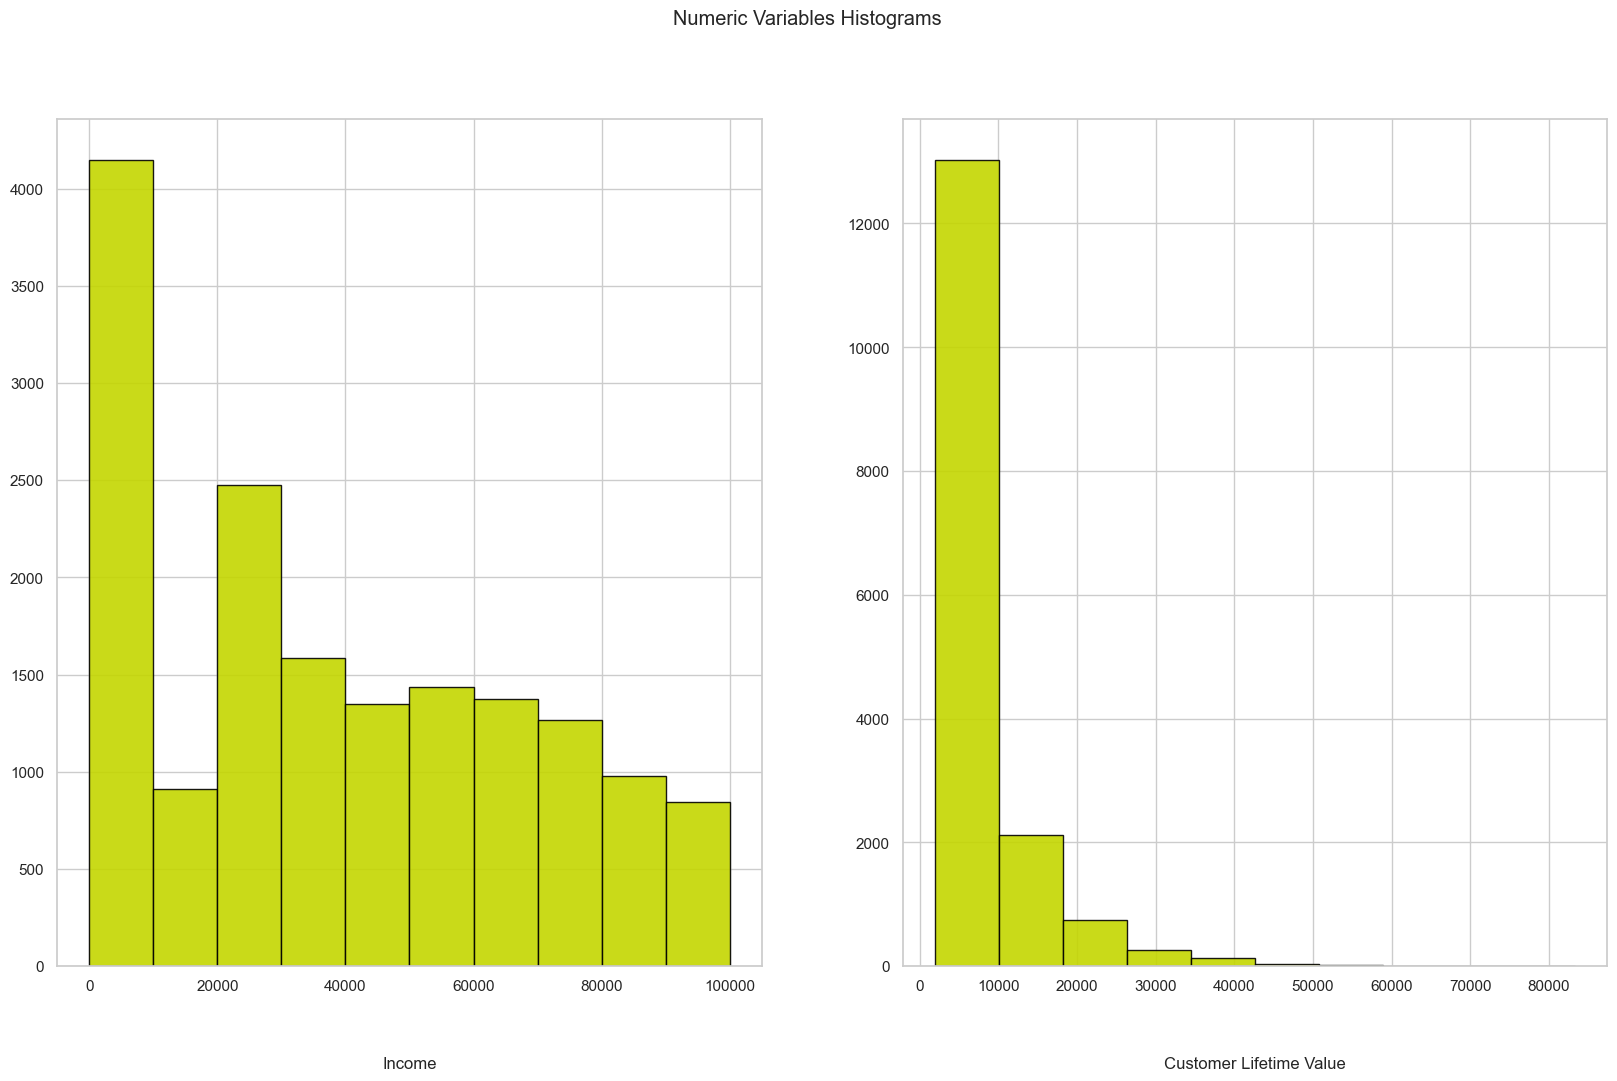

In [2858]:
sns.set(style="whitegrid")
sp_rows = 1
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(customer_df[feat], color='#C4D600', edgecolor="black", alpha=0.9, bins=10)
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables Histograms"
plt.suptitle(title)
plt.show()

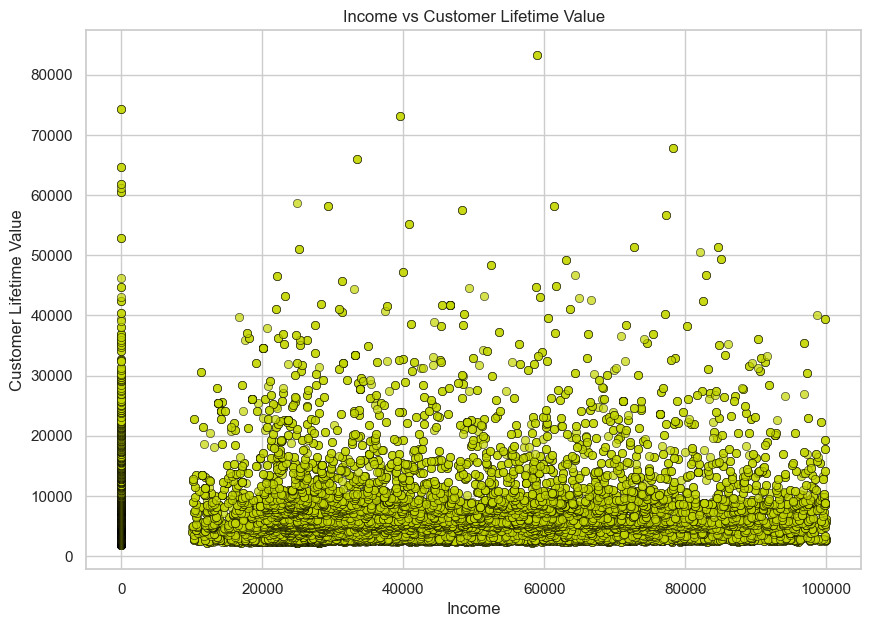

In [2859]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=customer_df,
    x="Income",
    y="Customer Lifetime Value",
    color="#C4D600",   
    edgecolor="black",
    alpha=0.7
)

plt.title("Income vs Customer Lifetime Value")
plt.xlabel("Income")
plt.ylabel("Customer Lifetime Value")
plt.show()

##### Categorical Variables

In [2861]:
categorical_features = ["Gender", "Education", "Marital Status", "LoyaltyStatus", "EnrollmentType"]

Text(0.5, 0.98, 'Distribution of Categorical Variables')

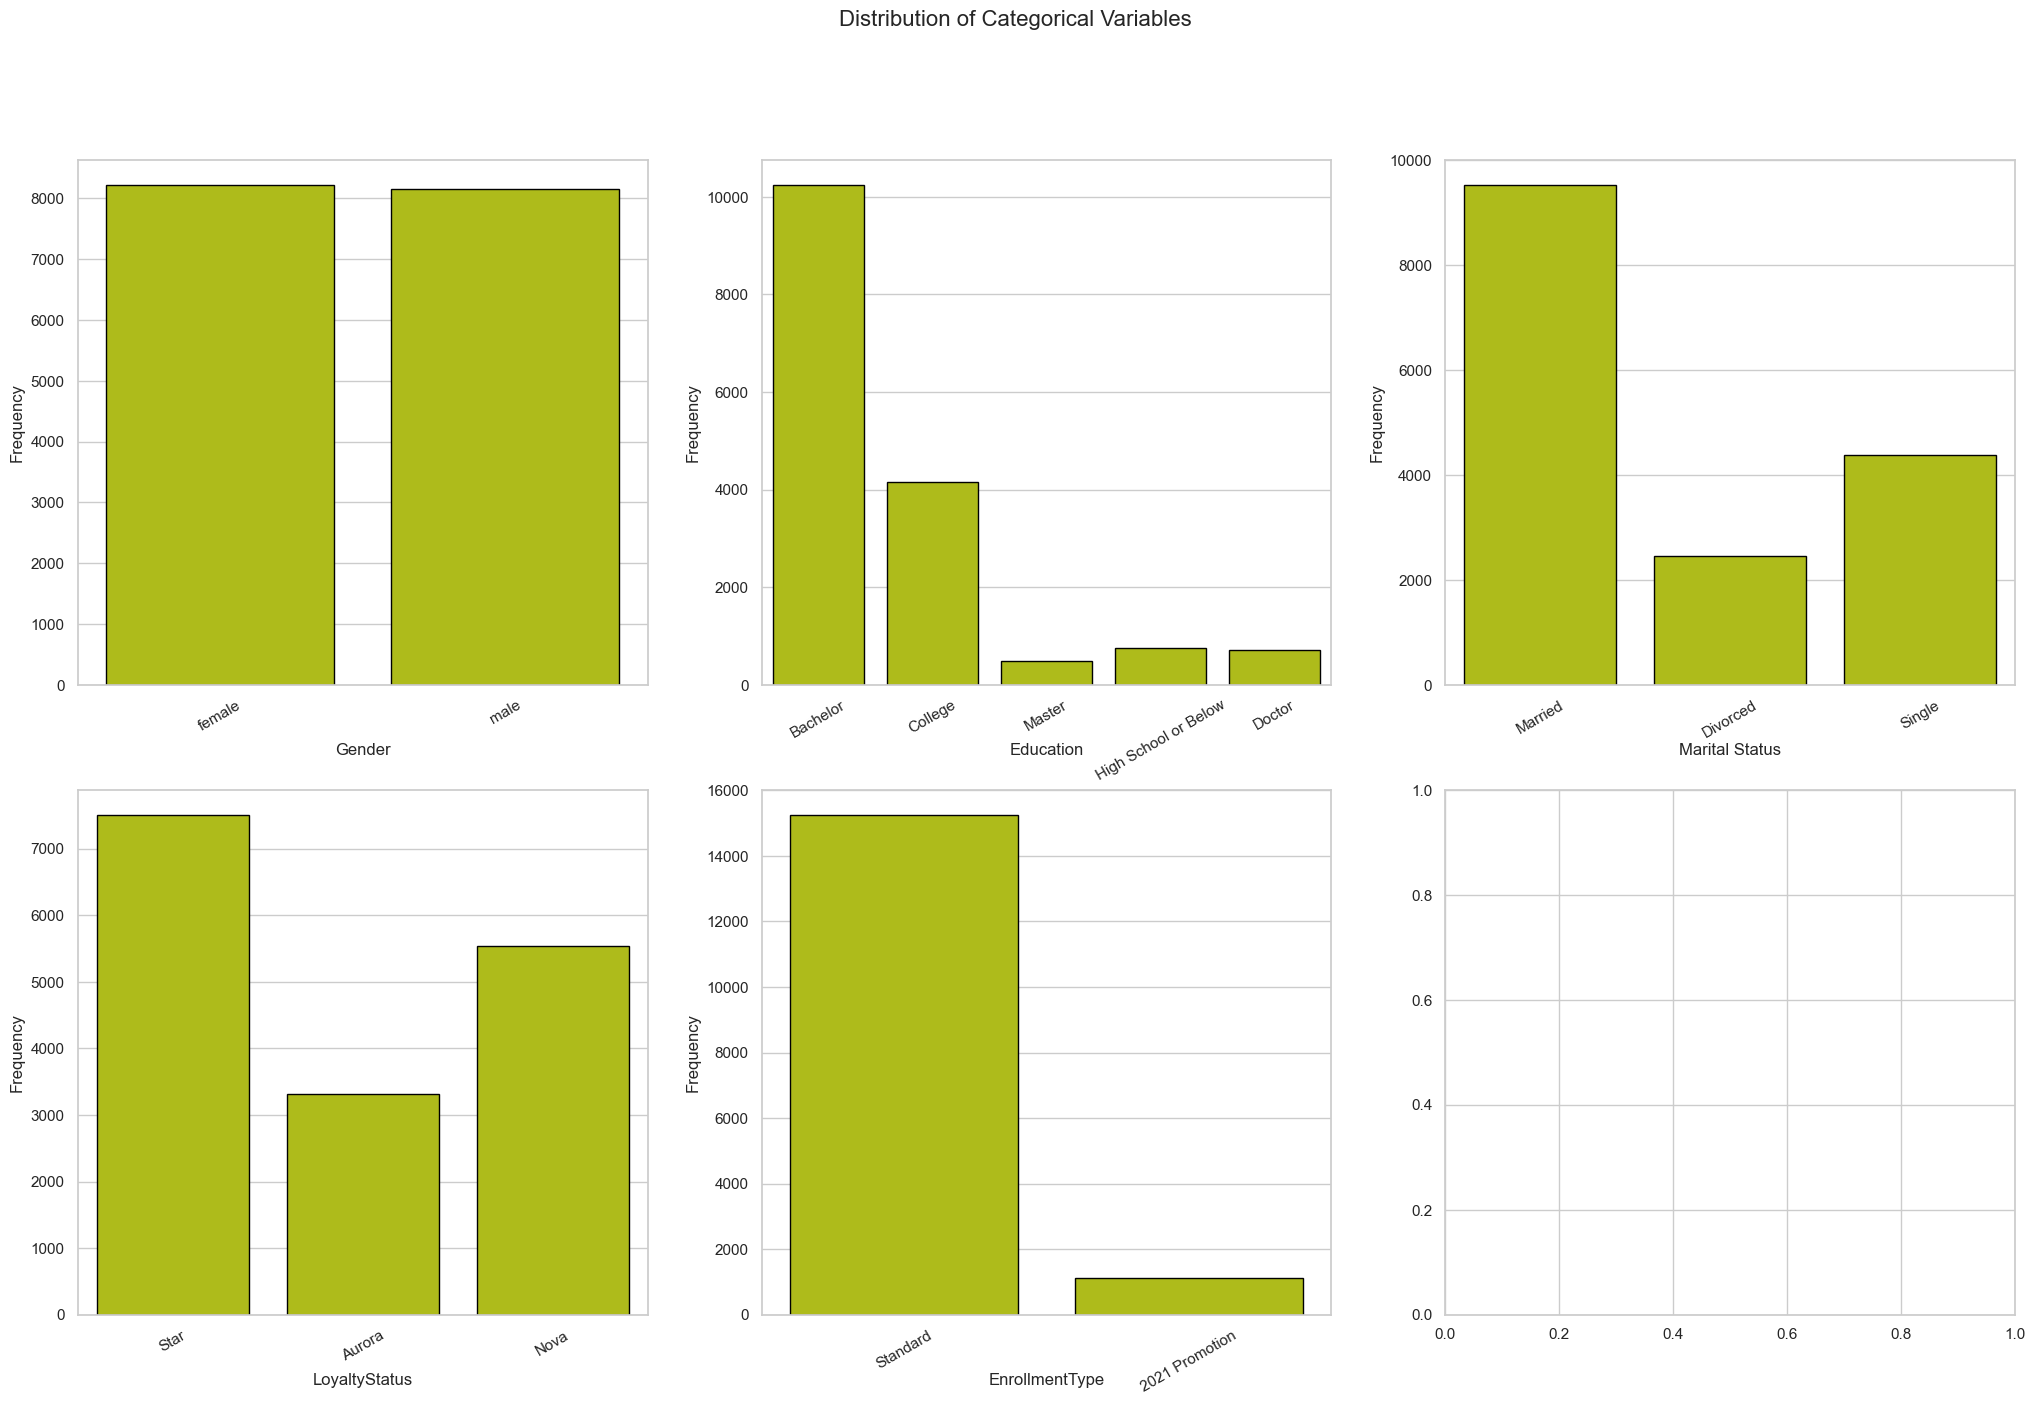

In [2862]:
sns.set(style="whitegrid")
sp_rows = 2
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(25, 15))
axes = axes.flatten()  

for ax, feat in zip(axes, categorical_features):
    sns.countplot(x=feat, data=customer_df, ax=ax, color='#C4D600', edgecolor="black")
    ax.set_title(feat, y=-0.15)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency")
    ax.tick_params(axis="x", rotation=30)

plt.suptitle("Distribution of Categorical Variables", fontsize=16)

#### Between 2 Variables: 

##### Numerical VS Numerical

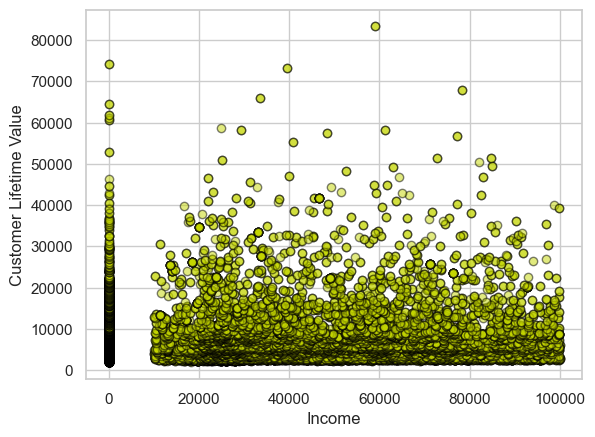

In [2865]:
sns.set(style="whitegrid")
plt.scatter(customer_df["Income"], customer_df["Customer Lifetime Value"], 
            edgecolors="black",
            alpha=.5,
            color='#C4D600' 
           )

plt.xlabel("Income")
plt.ylabel("Customer Lifetime Value")
plt.show()

##### We have confirmed that there is no relationship whatsoever between the two variables.

##### Categorical VS Categorical

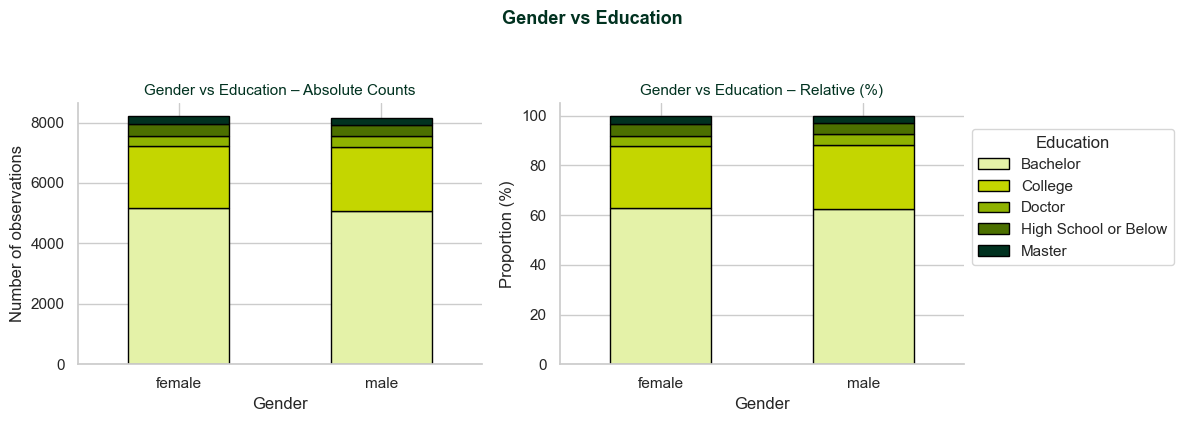

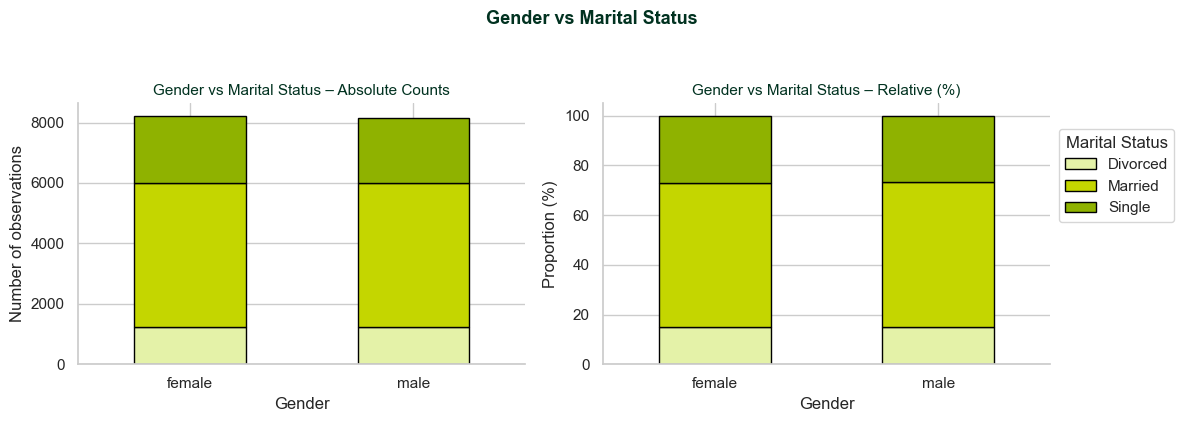

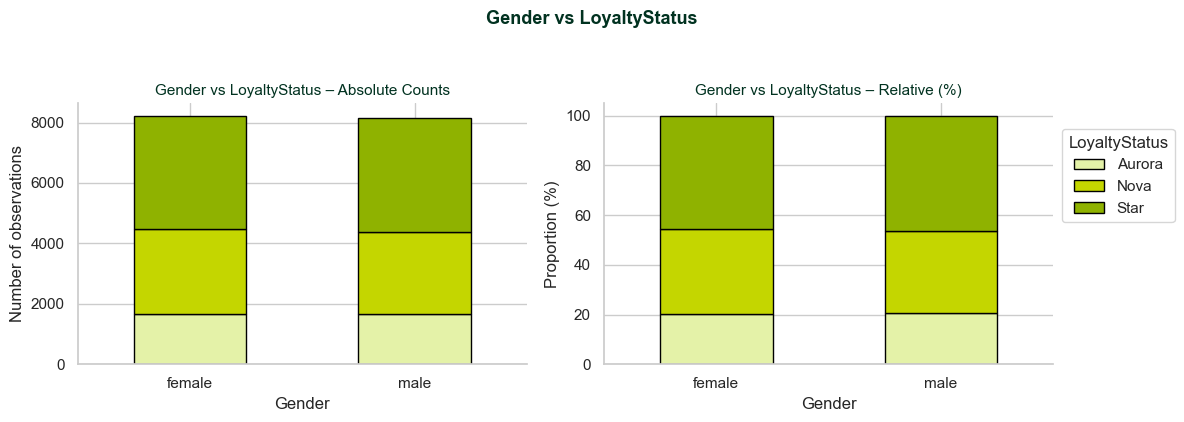

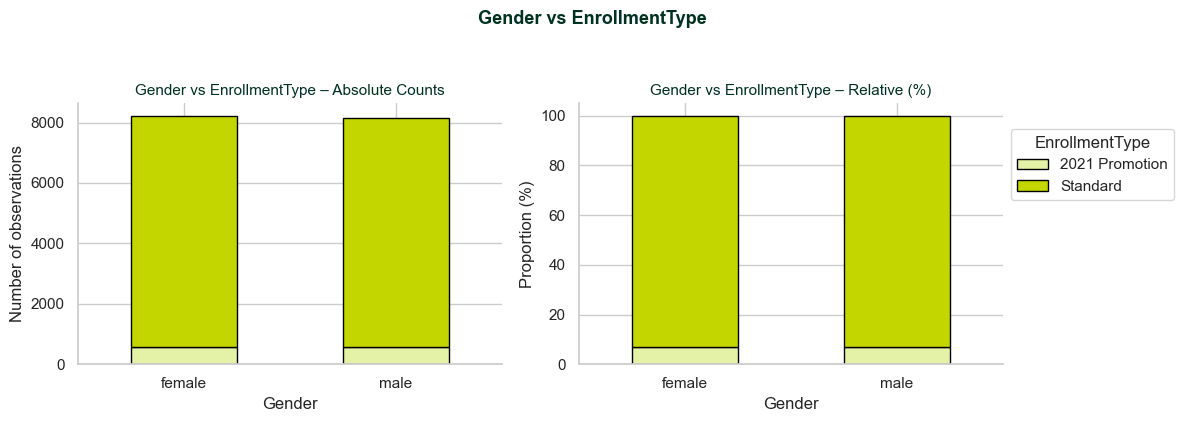

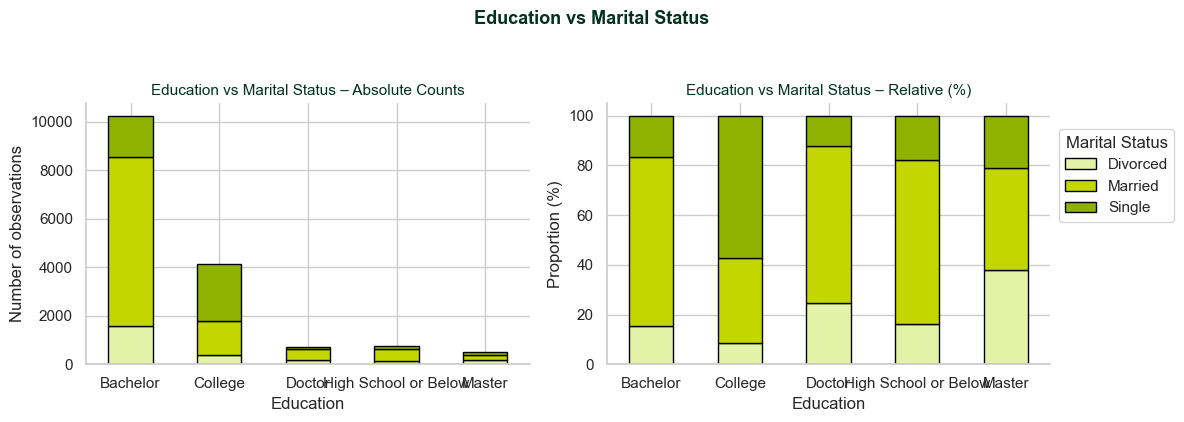

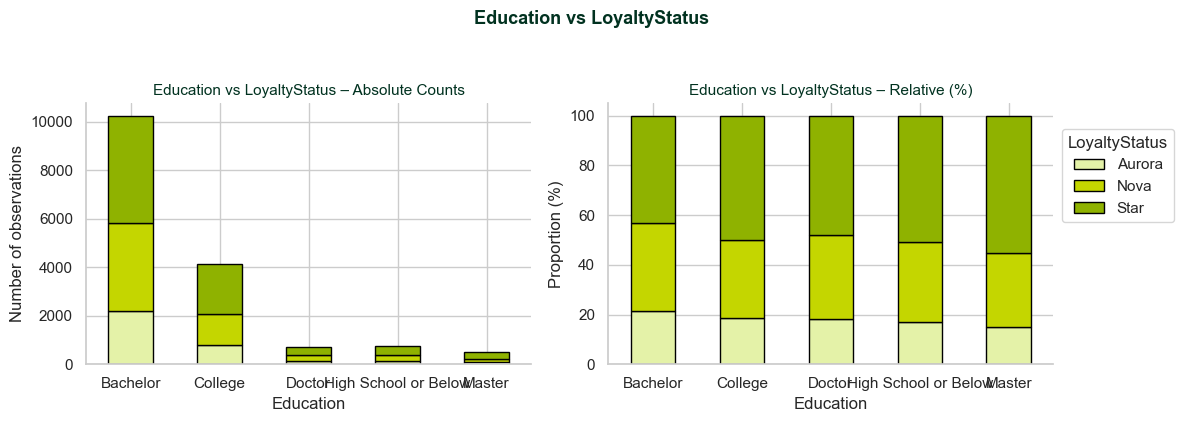

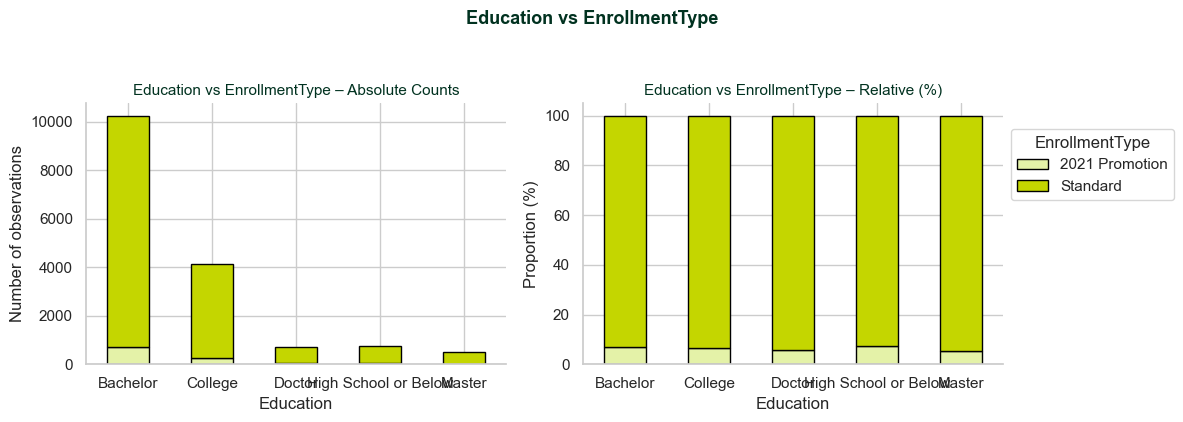

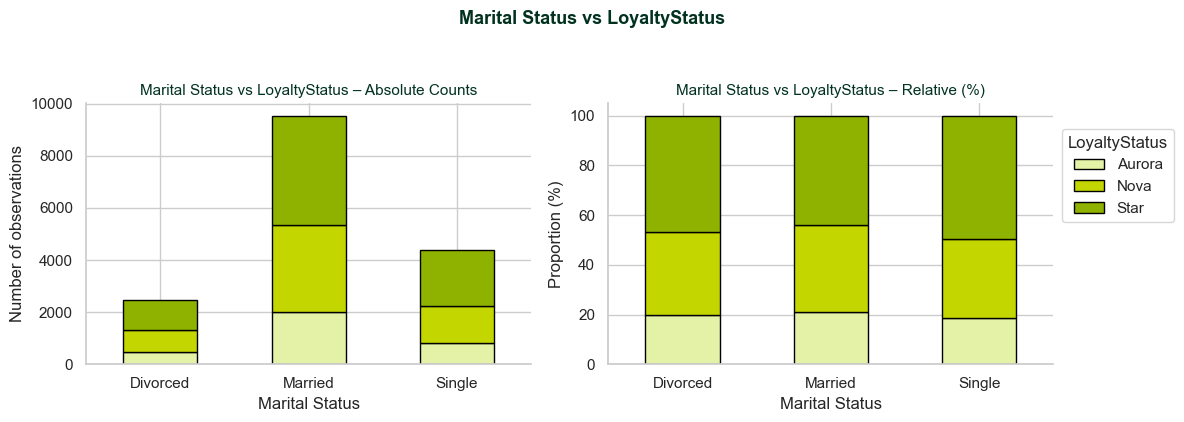

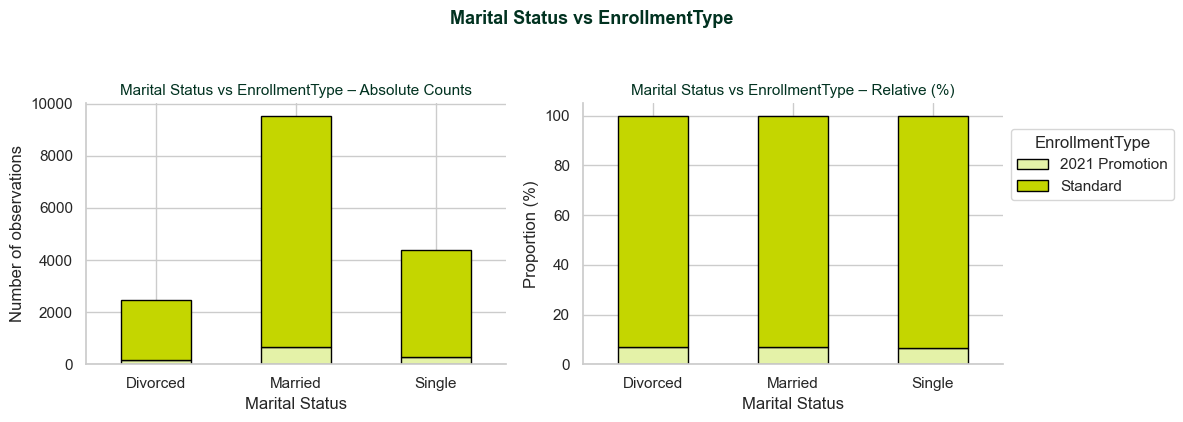

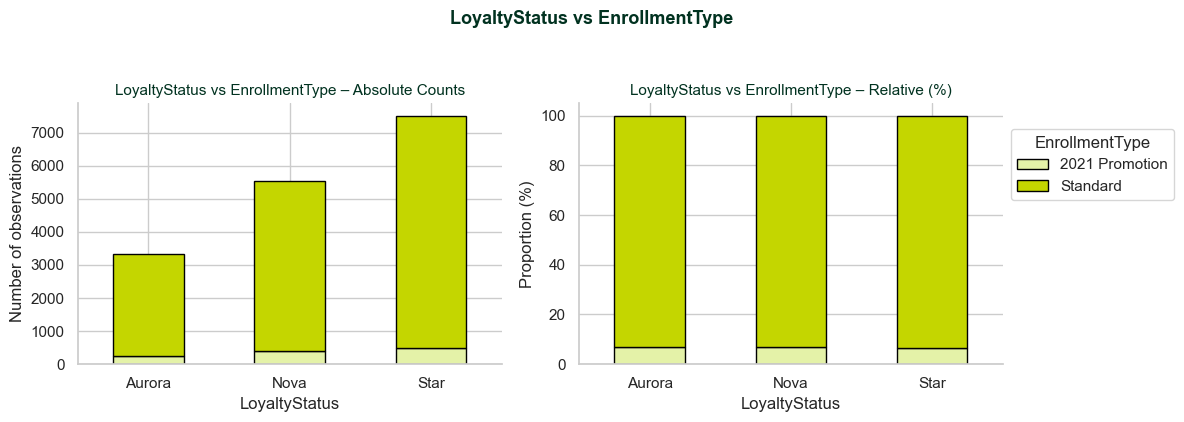

In [2868]:
sns.set(style="whitegrid")

COLORS = ["#E4F2A8", "#C4D600", "#8FB200", "#4C7000", "#013220"]

pairs = list(itertools.combinations(categorical_features, 2))

for (cat1, cat2) in pairs:
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # --- ABSOLUT ---
    abs_crosstab = pd.crosstab(customer_df[cat1], customer_df[cat2])
    abs_crosstab.plot(kind="bar", stacked=True, ax=axes[0], color=COLORS, edgecolor="black")
    axes[0].set_title(f"{cat1} vs {cat2} – Absolute Counts", fontsize=11, color="#013220")
    axes[0].set_xlabel(cat1)
    axes[0].set_ylabel("Number of observations")
    axes[0].legend([], frameon=False)
    axes[0].tick_params(axis="x", rotation=0)
    axes[0].spines["top"].set_visible(False)
    axes[0].spines["right"].set_visible(False)

    # --- RELATIVE ---
    rel_crosstab = pd.crosstab(customer_df[cat1], customer_df[cat2], normalize="index") * 100
    rel_crosstab.plot(kind="bar", stacked=True, ax=axes[1], color=COLORS, edgecolor="black")
    axes[1].set_title(f"{cat1} vs {cat2} – Relative (%)", fontsize=11, color="#013220")
    axes[1].set_xlabel(cat1)
    axes[1].set_ylabel("Proportion (%)")
    axes[1].legend(title=cat2, bbox_to_anchor=(1.02, 0.9), loc="upper left", borderaxespad=0.)
    axes[1].tick_params(axis="x", rotation=0)
    axes[1].spines["top"].set_visible(False)
    axes[1].spines["right"].set_visible(False)
    
    plt.suptitle(f"{cat1} vs {cat2}", fontsize=13, fontweight="bold", color="#013220", y=1.05)
    plt.tight_layout()
    plt.show()

Since the number of females and males are very similar, their graphs will always be very similar in both absolute and relative values.

##### Numerical VS Categorical

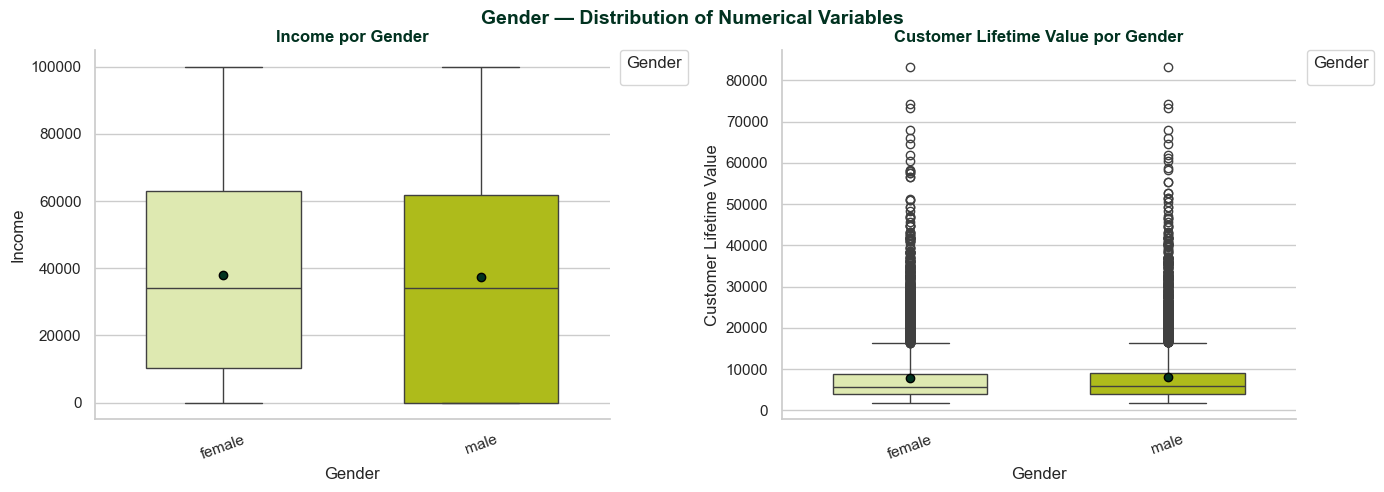

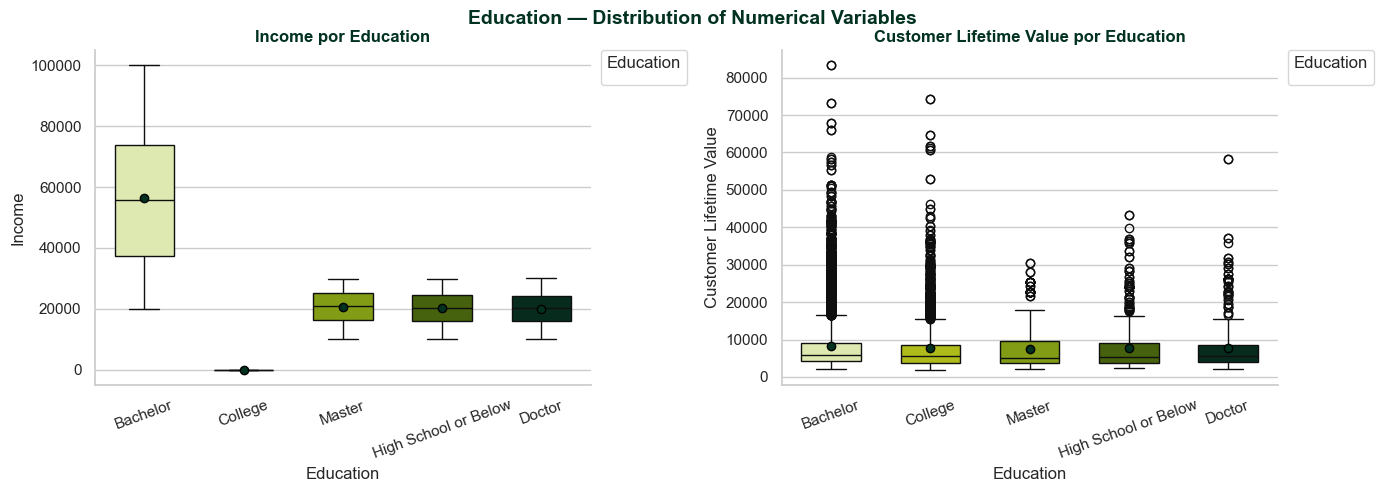

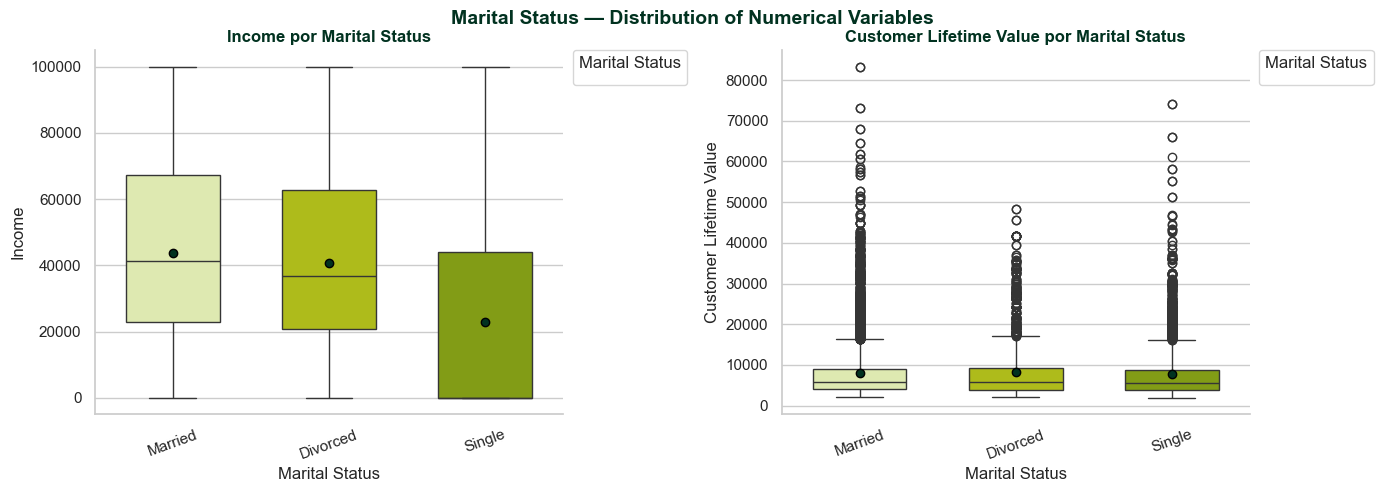

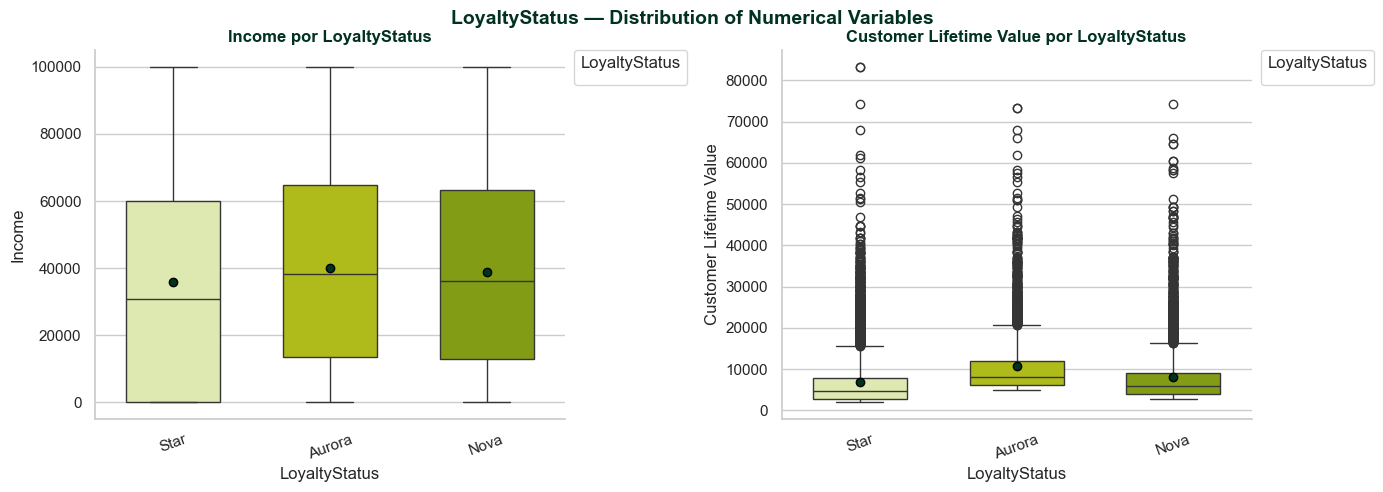

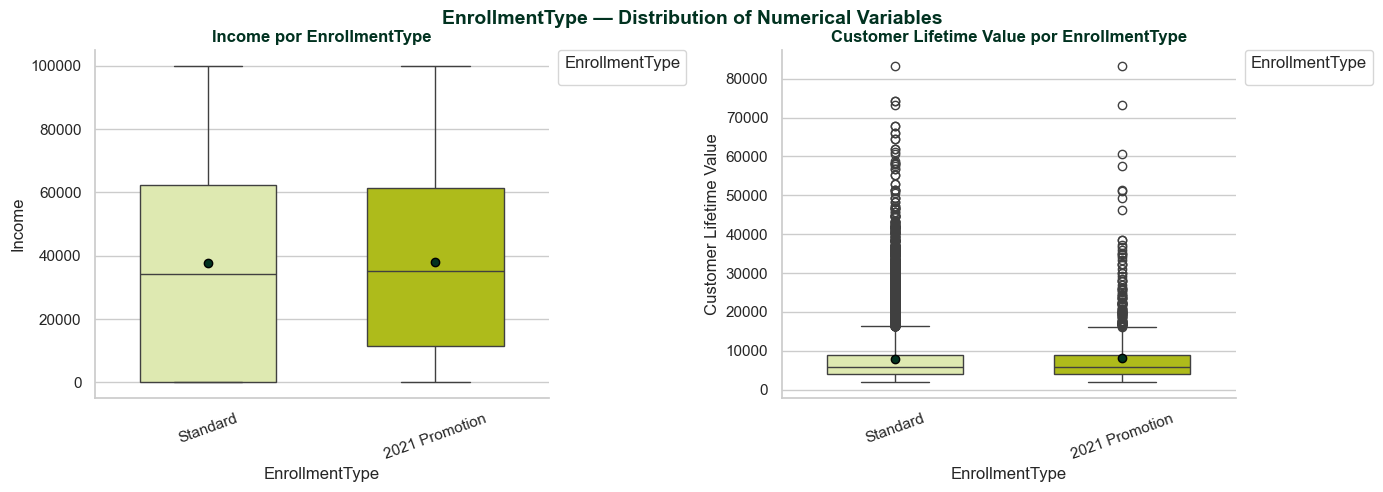

In [2871]:
sns.set(style="whitegrid")

PALETTE = ["#E4F2A8", "#C4D600", "#8FB200", "#4C7000", "#013220"]

for cat in categorical_features:
    fig, axes = plt.subplots(1, len(numeric_features), figsize=(14, 5))
    axes = np.atleast_1d(axes)

    for ax, num in zip(axes, numeric_features):
        sns.boxplot(
            data=customer_df, x=cat, y=num, palette=PALETTE, ax=ax, width=0.6, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "#013220", "markeredgecolor": "black"}
        )

        ax.set_title(f"{num} por {cat}", fontsize=12, color="#013220", fontweight="bold")
        ax.set_xlabel(cat)
        ax.set_ylabel(num)
        ax.tick_params(axis="x", rotation=20)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(
            handles, labels, title=f"{cat}",
            bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.,
            frameon=True, facecolor="white"
        )

    plt.suptitle(f"{cat} — Distribution of Numerical Variables", fontsize=14, color="#013220", fontweight="bold")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

### **<span style="color:#c3d664;">1.3.4. Outliers</span>**<a id="Outliers"></a>

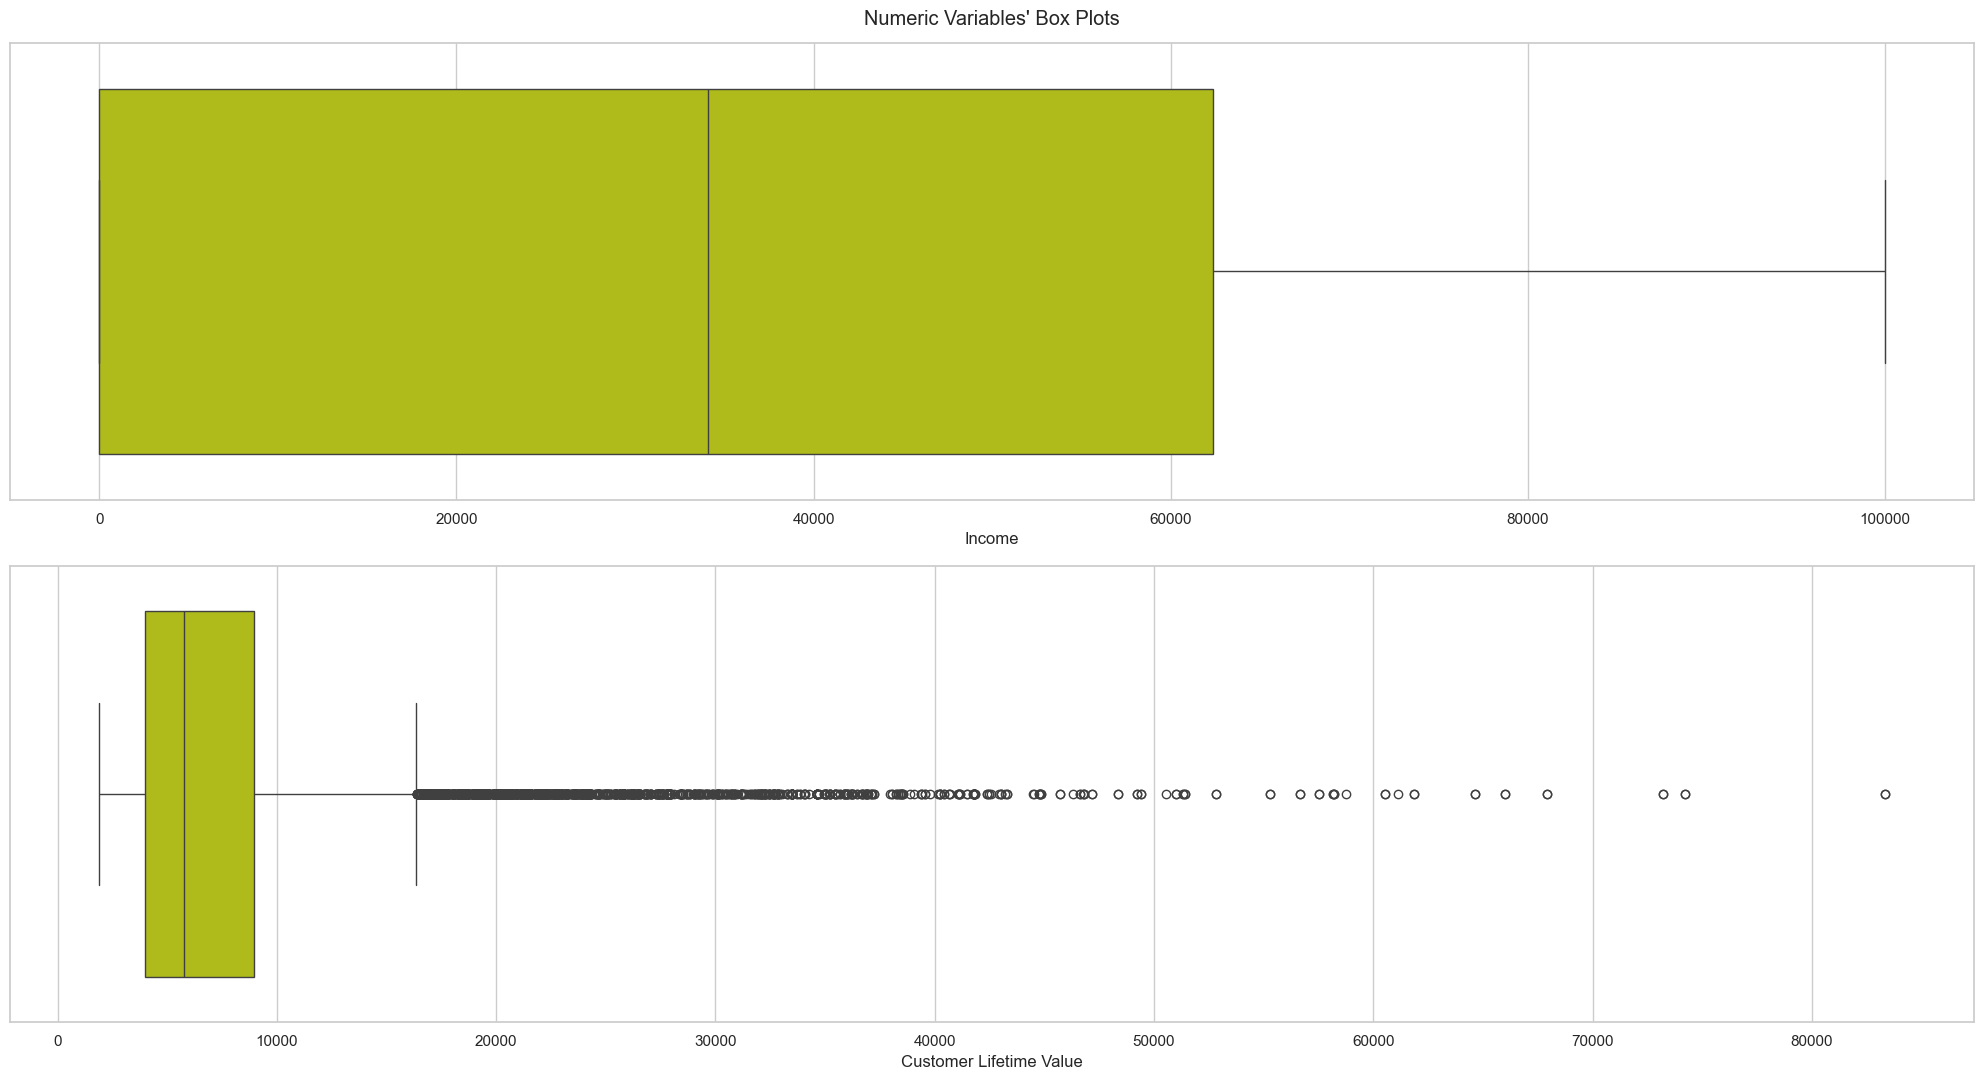

In [2873]:
sns.set(style="whitegrid")
sp_rows = 2
sp_cols = 1

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(
        x=customer_df[feat],
        ax=ax,
        color="#C4D600"
    )
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

## **<span style="color:#c3d664;">1.4. Feature Engineering</span>**<a id="Feature-Engineering"></a>

### **<span style="color:#c3d664;">1.4.1. Creation of variables</span>**<a id="creation-of-variables"></a>

#### Status

Creating a variable that tells us whether the customer is loyal or not:

In [2878]:
customer_df["Status"] = customer_df["CancellationDate"].apply(lambda x: "Active" if pd.isna(x) else "Cancelled")

#### MembershipMonths

Creating a variable to track the number of months a client has been active when they are active, based on the fact that we only have data up to 2021.

In [2881]:
last_obs = pd.Timestamp("2021-12-30") #max do enrollmentdate

# Calculation (in months)
customer_df['MembershipMonths'] = customer_df.apply(
    lambda row: ((last_obs - row['EnrollmentDateOpening']).days/30.44)
    if row['Status'] == 'Active'
    else ((row['CancellationDate'] - row['EnrollmentDateOpening']).days/30.44),
    axis=1
)

In [2882]:
customer_df[customer_df["MembershipMonths"] == 0]

Loyalty#      Customer Name Province or State         City   Latitude  \
434      123928  Dimple Stallworth            Quebec    Tremblant  46.118462   
5546     857845   Leilani Wheeldon      Newfoundland   St. John's  47.561508   
7930     948961    Shemeka Poitras           Ontario      Trenton  44.101128   
8146     647393         Drew Fodge            Quebec     Montreal  45.501690   
9683     170982      Elin Standard            Quebec     Montreal  45.501690   
11094    253412     Glayds Nesspor            Quebec  Quebec City  46.813877   
12182    881871      Chanda Rigano           Ontario      Toronto  43.653225   

       Longitude  Gender             Education Location Code   Income  \
434   -74.596184    male              Bachelor         Rural  28264.0   
5546  -52.712578    male               College      Suburban      0.0   
7930  -77.576309    male              Bachelor         Urban  94303.0   
8146  -73.567253    male               College         Rural      0.0   
9683  -73.567253    male  High School or Below         Rural  14072.0   
11094 -71.207977  female              Bachelor         Urban  79751.0   
12182 -79.383186  female              Bachelor         Rural  73938.0   

      Marital Status LoyaltyStatus EnrollmentDateOpening CancellationDate  \
434         Divorced          Star            2021-12-30              NaT   
5546          Single          Nova            2021-12-30              NaT   
7930         Married          Nova            2021-12-30              NaT   
8146         Married          Nova            2021-12-30              NaT   
9683        Divorced          Nova            2021-12-30              NaT   
11094        Married          Star            2021-12-30              NaT   
12182        Married          Star            2021-12-30              NaT   

       Customer Lifetime Value EnrollmentType  Status  MembershipMonths  
434                    4624.56       Standard  Active               0.0  
5546                   3945.59       Standard  Active               0.0  
7930                   7908.45       Standard  Active               0.0  
8146                   8356.18       Standard  Active               0.0  
9683                  24127.50       Standard  Active               0.0  
11094                  2551.23       Standard  Active               0.0  
12182                  3086.01       Standard  Active               0.0

There are 7 loyal customers on the day the data was collected, hence the zero value:

End date: 2021-12-30

Since we are dealing with months, let's convert this variable to an integer:

In [2885]:
customer_df['MembershipMonths'] = customer_df['MembershipMonths'].astype(int)

Since we have already created the Status and Membership variables, the cancellationdate variable will be eliminated, as it is not necessary for our evaluation. Furthermore, it is a variable that contains numerous missing values.

In [2887]:
customer_df = customer_df.drop(columns=["CancellationDate"])

In [2888]:
customer_df.head()

Loyalty#        Customer Name Province or State       City   Latitude  \
0    480934  Cecilia Householder           Ontario    Toronto  43.653225   
1    549612          Dayle Menez           Alberta   Edmonton  53.544388   
2    429460        Necole Hannon  British Columbia  Vancouver  49.282730   
3    608370          Queen Hagee           Ontario    Toronto  43.653225   
4    530508       Claire Latting            Quebec       Hull  45.428730   

    Longitude  Gender Education Location Code   Income Marital Status  \
0  -79.383186  female  Bachelor         Urban  70146.0        Married   
1 -113.490930    male   College         Rural      0.0       Divorced   
2 -123.120740    male   College         Urban      0.0         Single   
3  -79.383186    male   College      Suburban      0.0         Single   
4  -75.713364    male  Bachelor      Suburban  97832.0        Married   

  LoyaltyStatus EnrollmentDateOpening  Customer Lifetime Value  \
0          Star            2019-02-15                  3839.14   
1          Star            2019-03-09                  3839.61   
2          Star            2017-07-14                  3839.75   
3          Star            2016-02-17                  3839.75   
4          Star            2017-10-25                  3842.79   

   EnrollmentType     Status  MembershipMonths  
0        Standard     Active                34  
1        Standard     Active                33  
2        Standard  Cancelled                41  
3        Standard     Active                70  
4  2021 Promotion     Active                50

#### CLV_log

Creating a logarithmic Customer Lifetime Value variable to make its distribution easier to understand.

In [2891]:
customer_df["CLV_log"] = np.log1p(customer_df["Customer Lifetime Value"])

#### Income_log

Creating a logarithmic Income variable to make its distribution easier to understand.

In [2894]:
customer_df["Income_log"] = np.log1p(customer_df["Income"])

In [2895]:
customer_df = customer_df.drop(['Income', 'Customer Lifetime Value'], axis=1)

### **<span style="color:#c3d664;">1.4.2. Missing values of new variables</span>**<a id="missing-values-of-new-variables"></a>

In [2897]:
customer_df['Status'].isna().sum()

0

In [2898]:
customer_df['MembershipMonths'].isna().sum()

0

In [2899]:
customer_df['CLV_log'].isna().sum()

0

In [2900]:
customer_df['Income_log'].isna().sum()

0

### **<span style="color:#c3d664;">1.4.3. Outliers of the news variables</span>**<a id="outliers-of-the-new-variables"></a>

In [2902]:
new_features = ['MembershipMonths', 'CLV_log', 'Income_log']

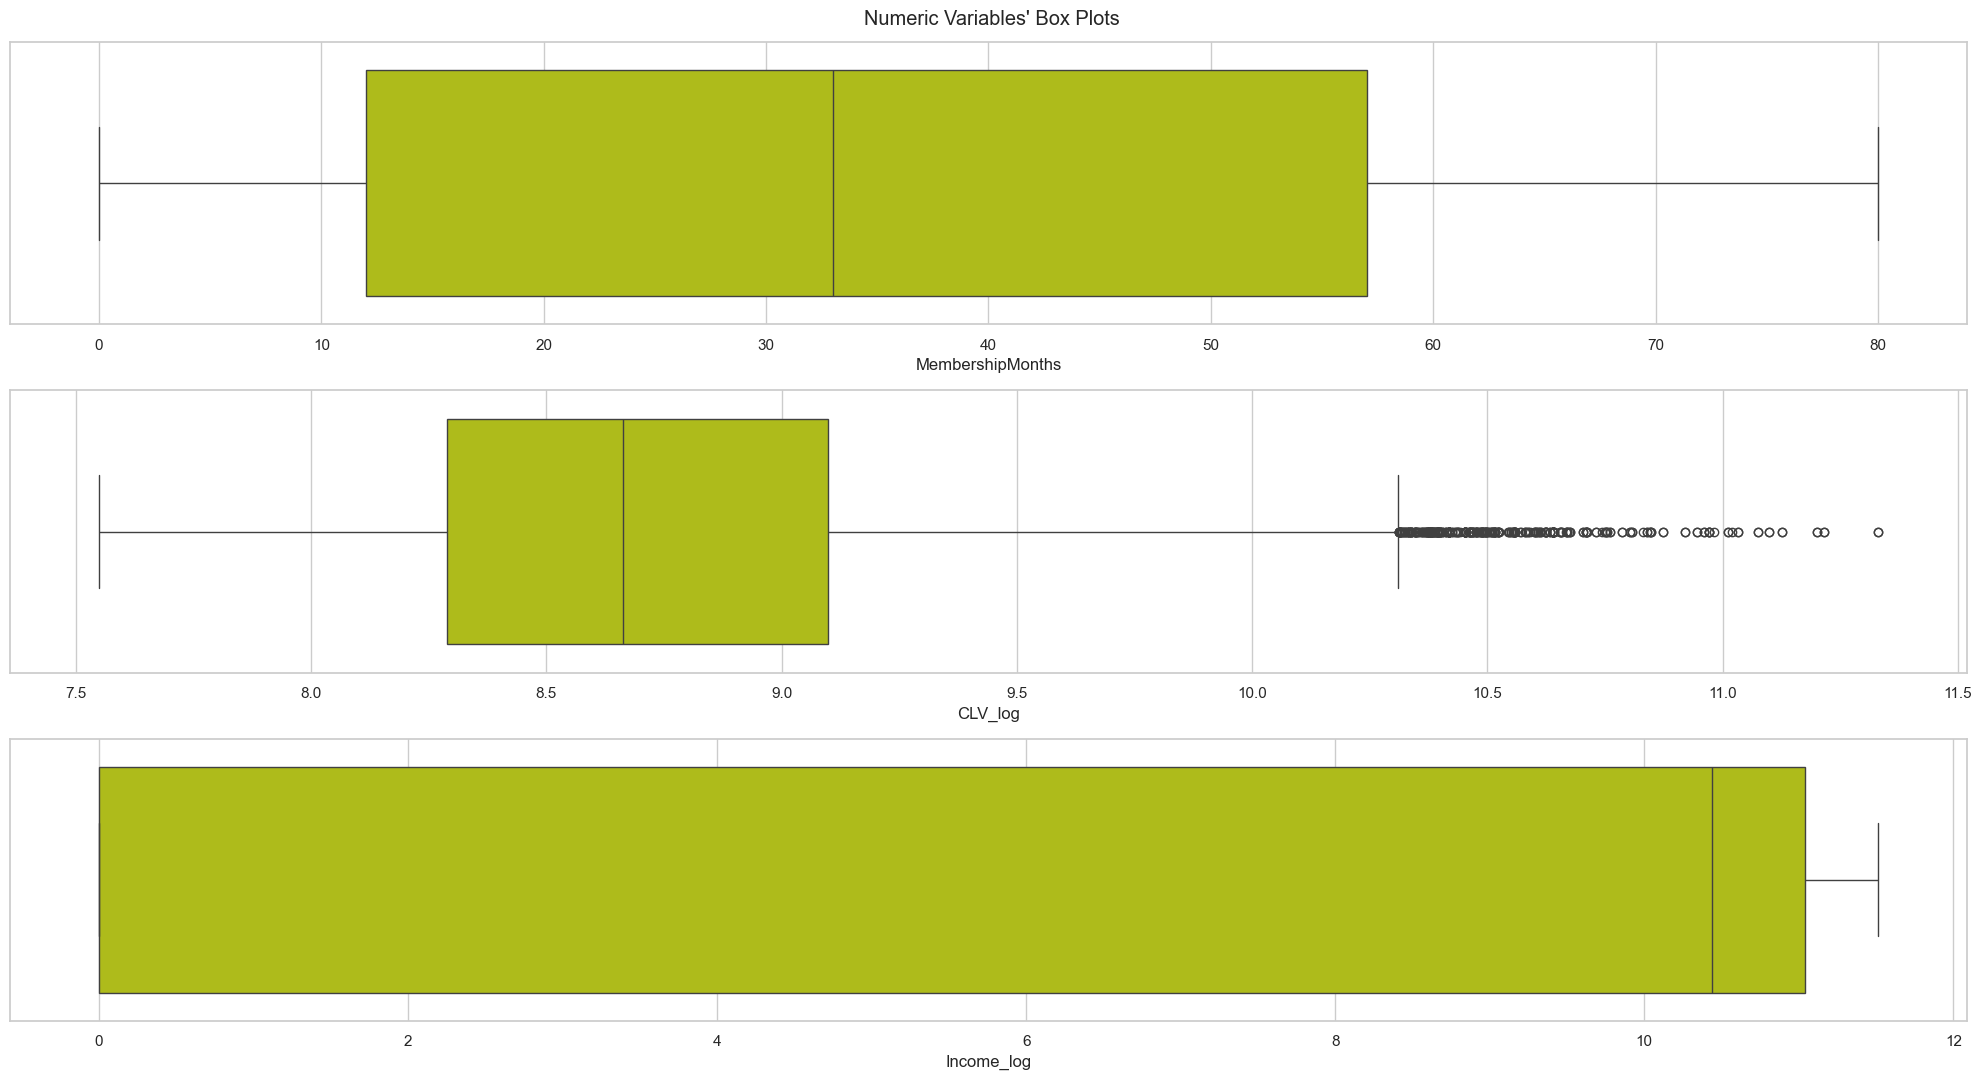

In [2903]:
sns.set(style="whitegrid")
sp_rows = 3
sp_cols = 1

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

for ax, feat in zip(axes.flatten(), new_features):
    sns.boxplot(
        x=customer_df[feat],
        ax=ax,
        color="#C4D600"
    )
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### **<span style="color:#c3d664;">1.4.4. Visualization of new variables</span>**<a id="visualization-of-the-new-variables"></a>

#### Status:

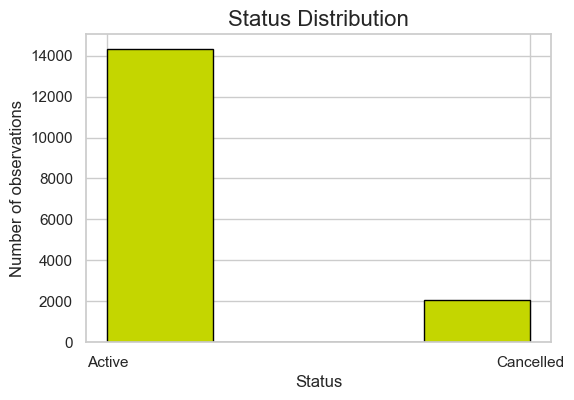

In [2906]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.hist(
    customer_df["Status"], 
    color='#C4D600', 
    edgecolor="black", 
    alpha=1, 
    bins=4
)
plt.title("Status Distribution", fontsize=16)
plt.xlabel("Status")
plt.ylabel("Number of observations")
plt.show()

#### MembershipMonths:

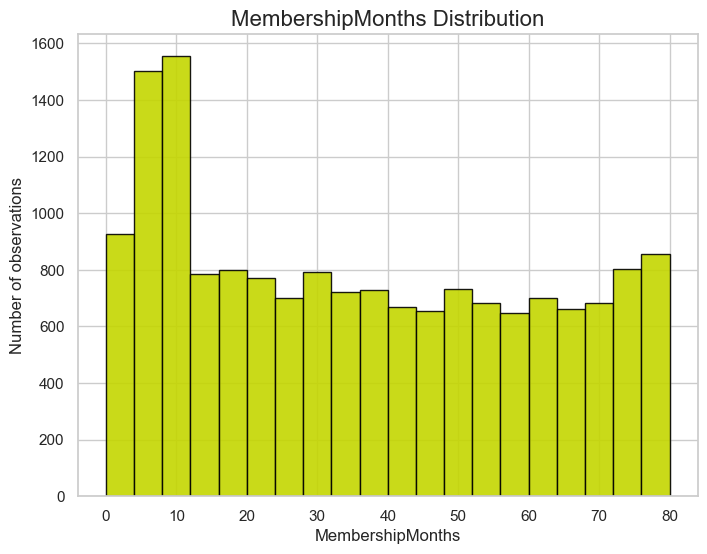

In [2908]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.hist(
    customer_df["MembershipMonths"], 
    color='#C4D600', 
    edgecolor="black", 
    alpha=0.9, 
    bins=20
)
plt.title("MembershipMonths Distribution", fontsize=16)
plt.xlabel("MembershipMonths")
plt.ylabel("Number of observations")
plt.show()

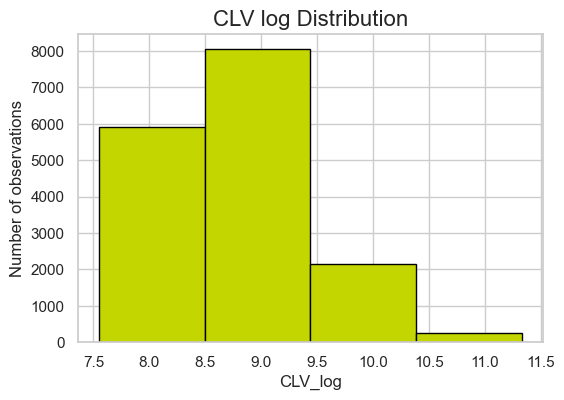

In [2909]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.hist(
    customer_df["CLV_log"], 
    color='#C4D600', 
    edgecolor="black", 
    alpha=1, 
    bins=4
)
plt.title("CLV log Distribution", fontsize=16)
plt.xlabel("CLV_log")
plt.ylabel("Number of observations")
plt.show()

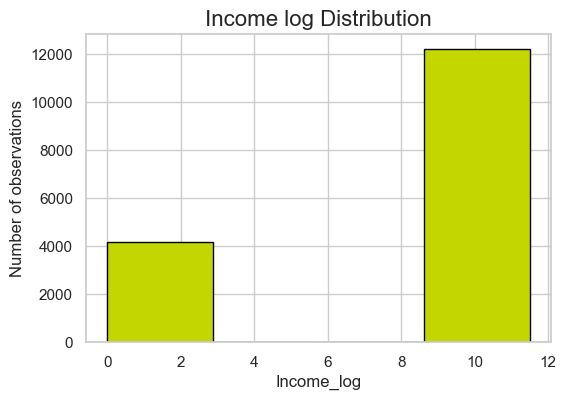

In [2910]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.hist(
    customer_df["Income_log"], 
    color='#C4D600', 
    edgecolor="black", 
    alpha=1, 
    bins=4
)
plt.title("Income log Distribution", fontsize=16)
plt.xlabel("Income_log")
plt.ylabel("Number of observations")
plt.show()

#### Status VS other categorical variables:

In [2912]:
cat_features = ["Status", "Gender", "Education", "Marital Status", "LoyaltyStatus", "EnrollmentType"]

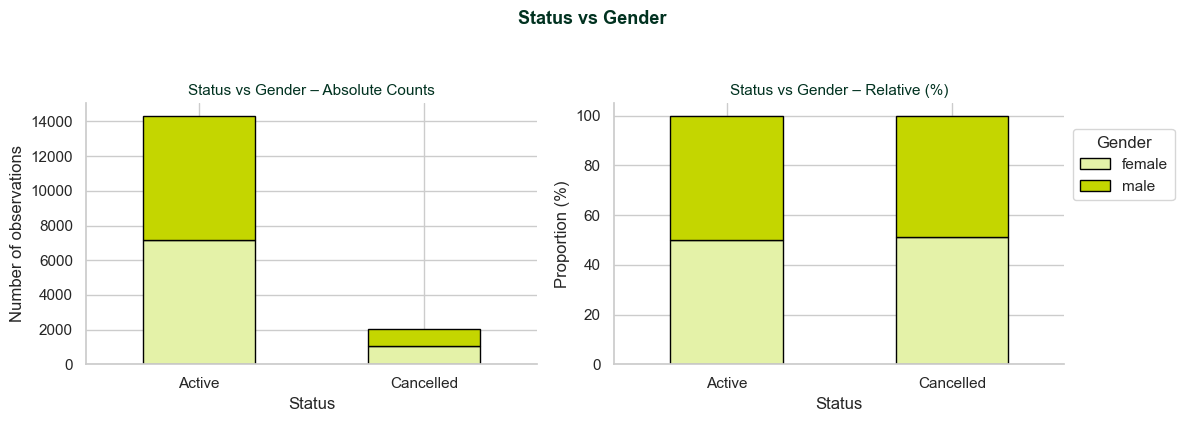

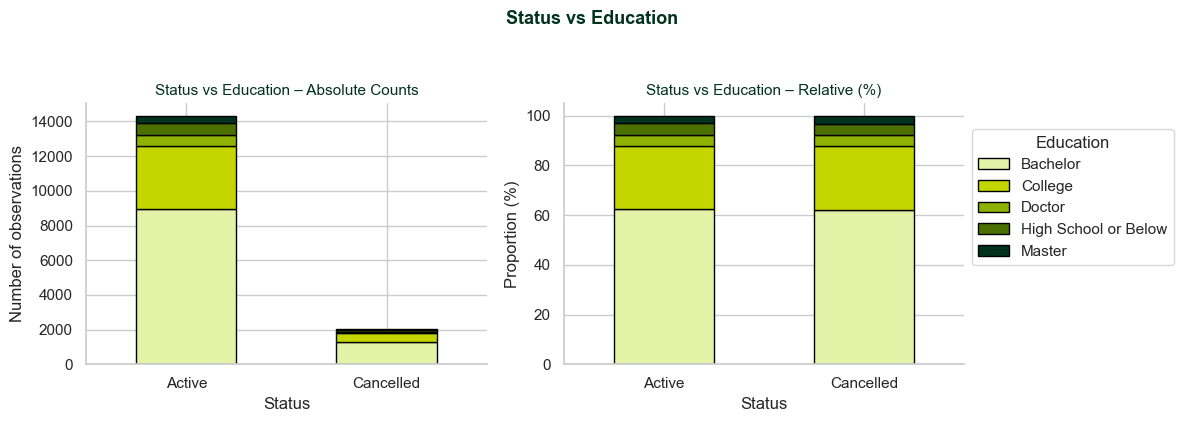

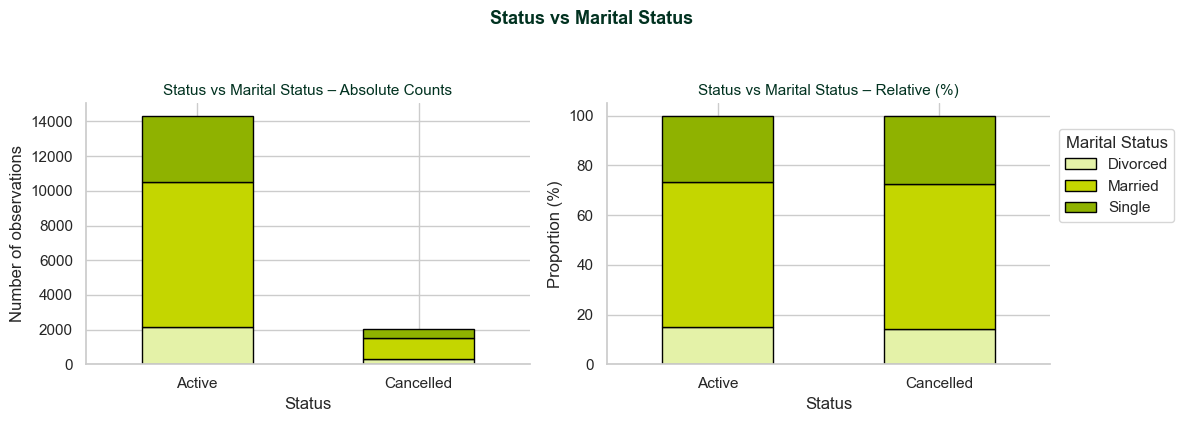

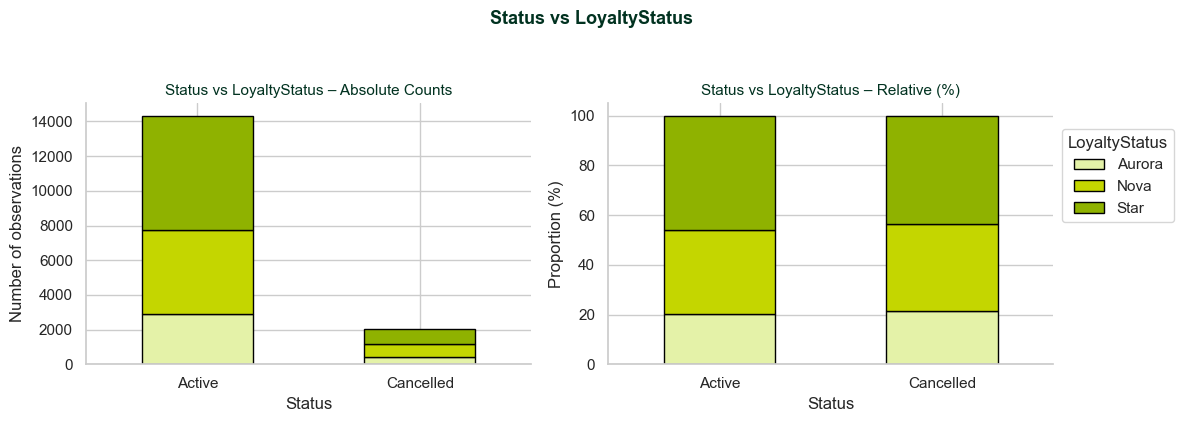

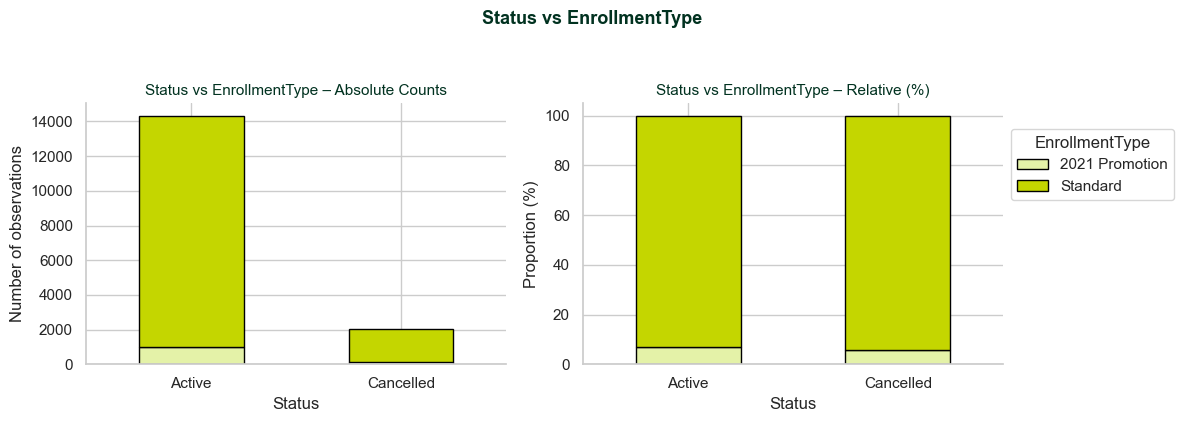

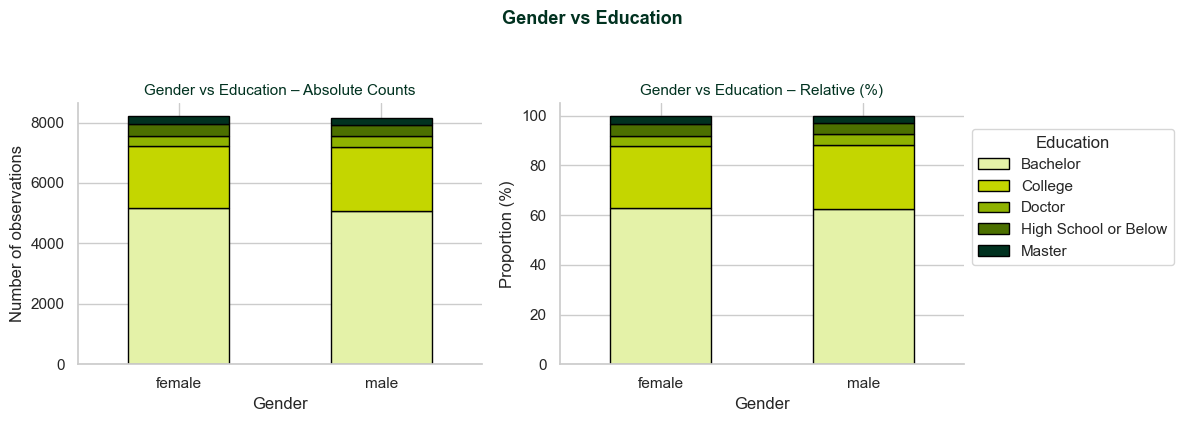

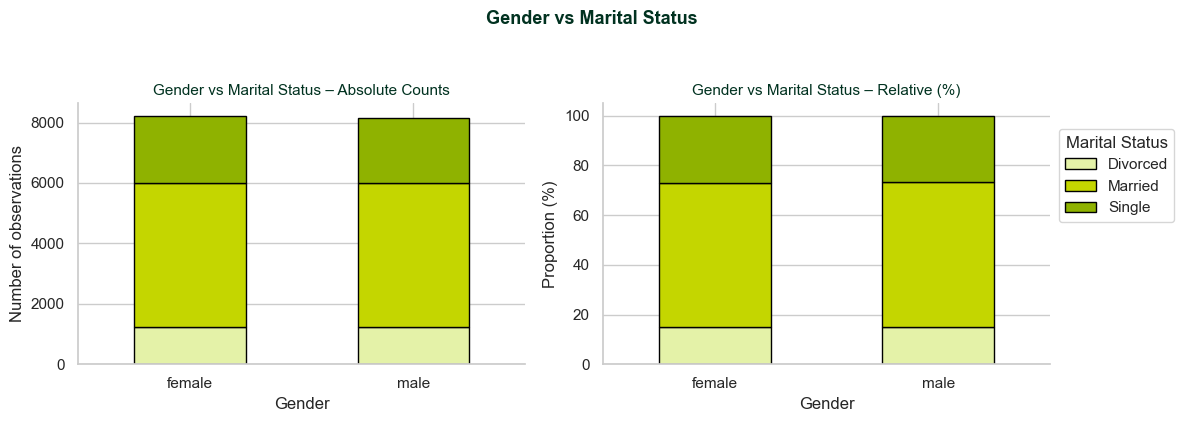

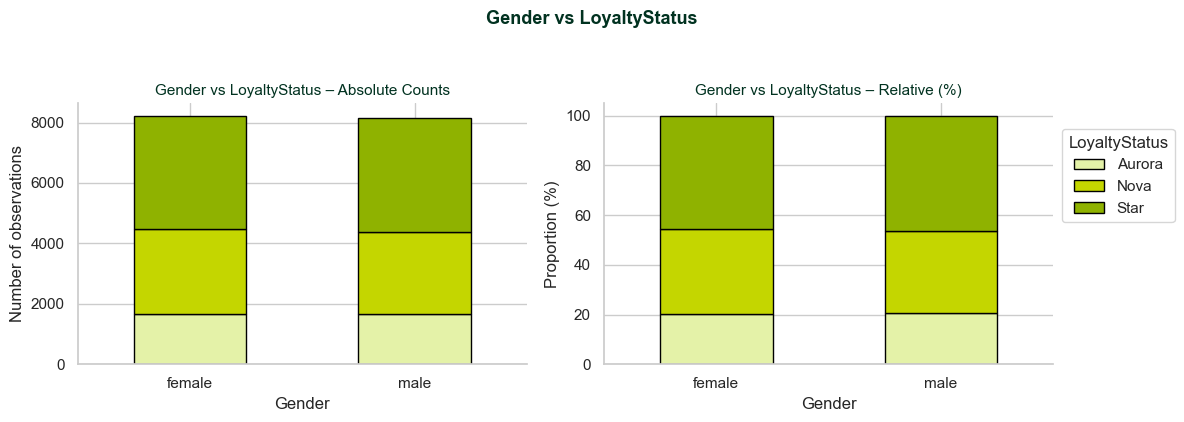

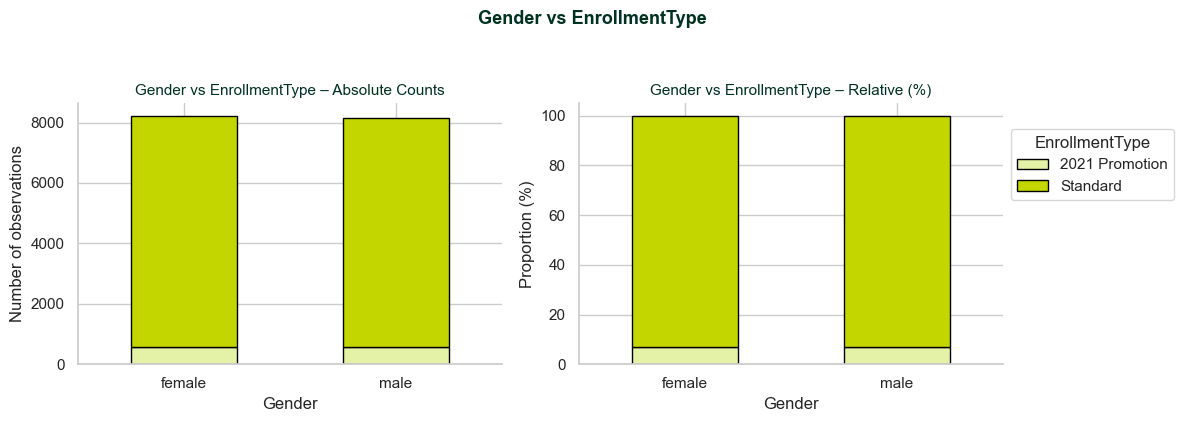

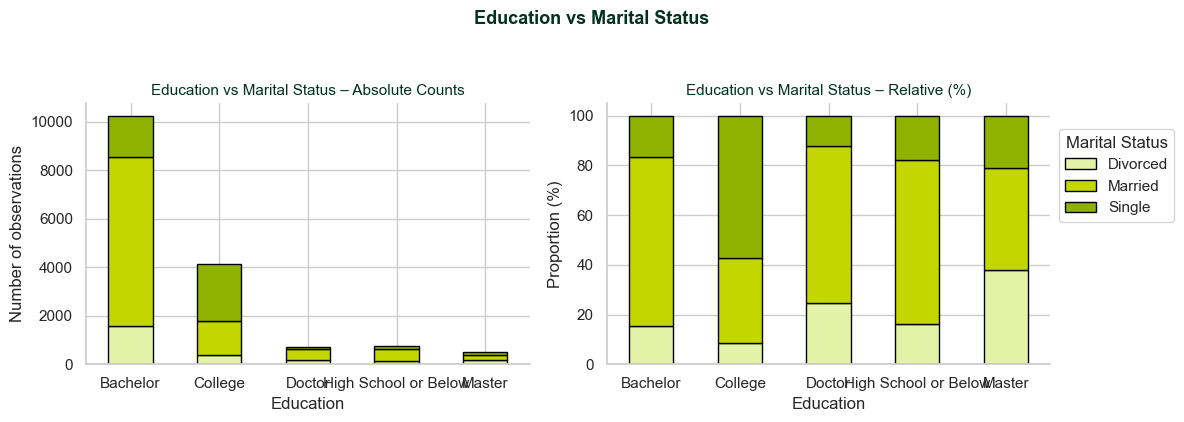

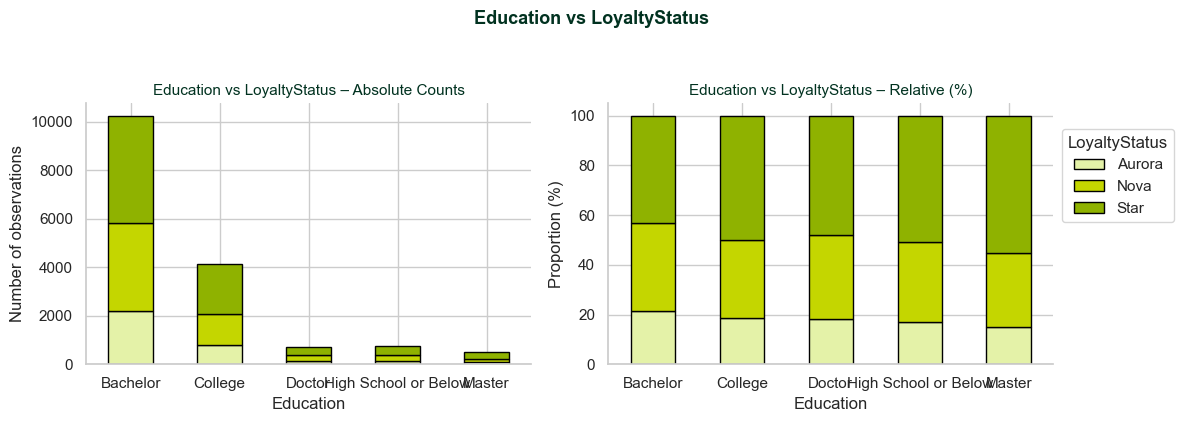

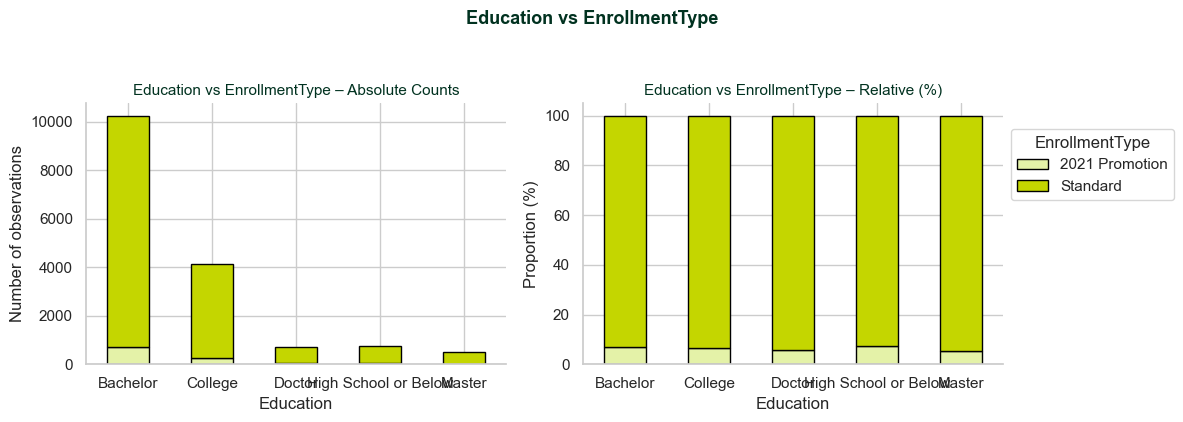

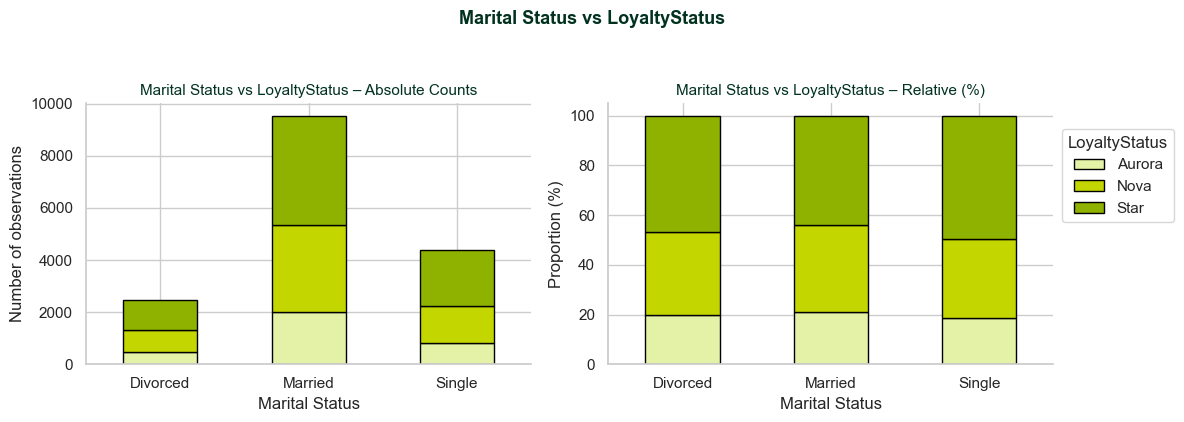

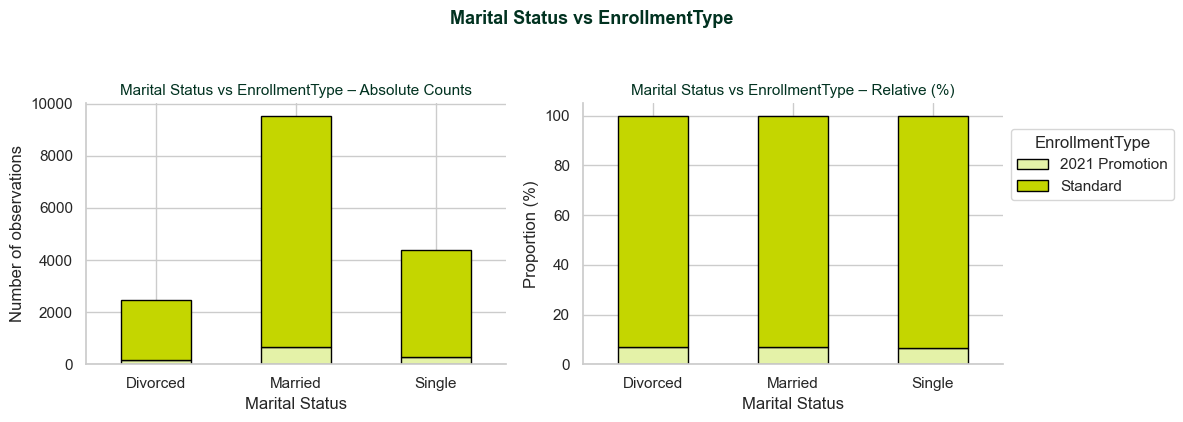

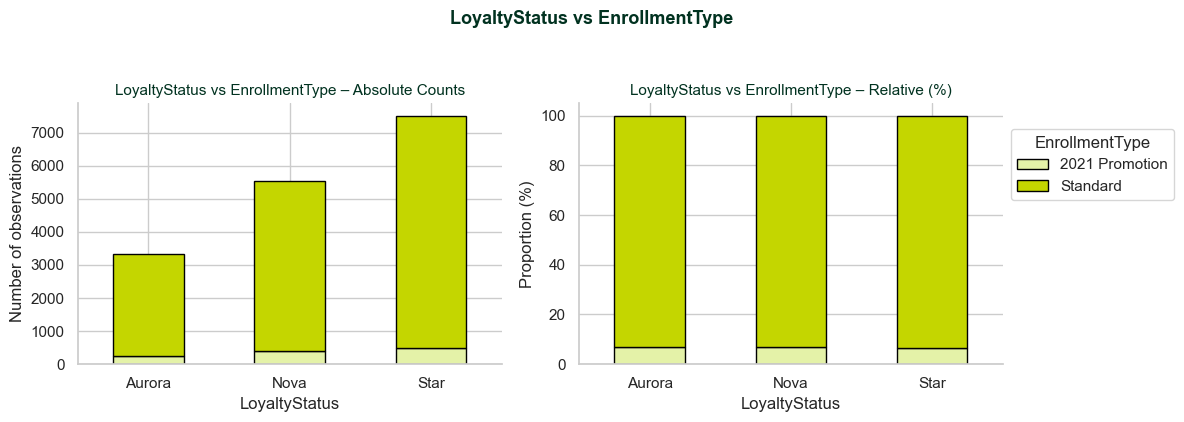

In [2913]:
sns.set(style="whitegrid")

COLORS = ["#E4F2A8", "#C4D600", "#8FB200", "#4C7000", "#013220"]

pairs = list(itertools.combinations(cat_features, 2))

for (cat1, cat2) in pairs:
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # --- ABSOLUT ---
    abs_crosstab = pd.crosstab(customer_df[cat1], customer_df[cat2])
    abs_crosstab.plot(kind="bar", stacked=True, ax=axes[0], color=COLORS, edgecolor="black")
    axes[0].set_title(f"{cat1} vs {cat2} – Absolute Counts", fontsize=11, color="#013220")
    axes[0].set_xlabel(cat1)
    axes[0].set_ylabel("Number of observations")
    axes[0].legend([], frameon=False)
    axes[0].tick_params(axis="x", rotation=0)
    axes[0].spines["top"].set_visible(False)
    axes[0].spines["right"].set_visible(False)

    # --- RELATIVE ---
    rel_crosstab = pd.crosstab(customer_df[cat1], customer_df[cat2], normalize="index") * 100
    rel_crosstab.plot(kind="bar", stacked=True, ax=axes[1], color=COLORS, edgecolor="black")
    axes[1].set_title(f"{cat1} vs {cat2} – Relative (%)", fontsize=11, color="#013220")
    axes[1].set_xlabel(cat1)
    axes[1].set_ylabel("Proportion (%)")
    axes[1].legend(title=cat2, bbox_to_anchor=(1.02, 0.9), loc="upper left", borderaxespad=0.)
    axes[1].tick_params(axis="x", rotation=0)
    axes[1].spines["top"].set_visible(False)
    axes[1].spines["right"].set_visible(False)
    
    plt.suptitle(f"{cat1} vs {cat2}", fontsize=13, fontweight="bold", color="#013220", y=1.05)
    plt.tight_layout()
    plt.show()

##### Numerical variables (add Membership, CLV_log, Income_log) with categoricals (add Status) :

In [2915]:
num_features = ["MembershipMonths", "CLV_log", "Income_log"]

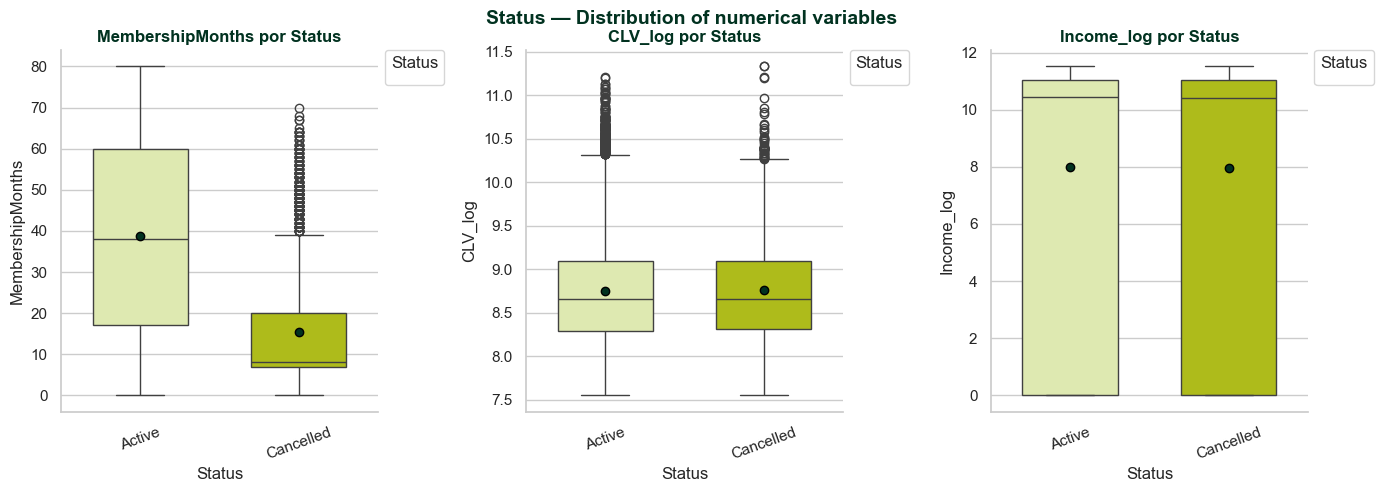

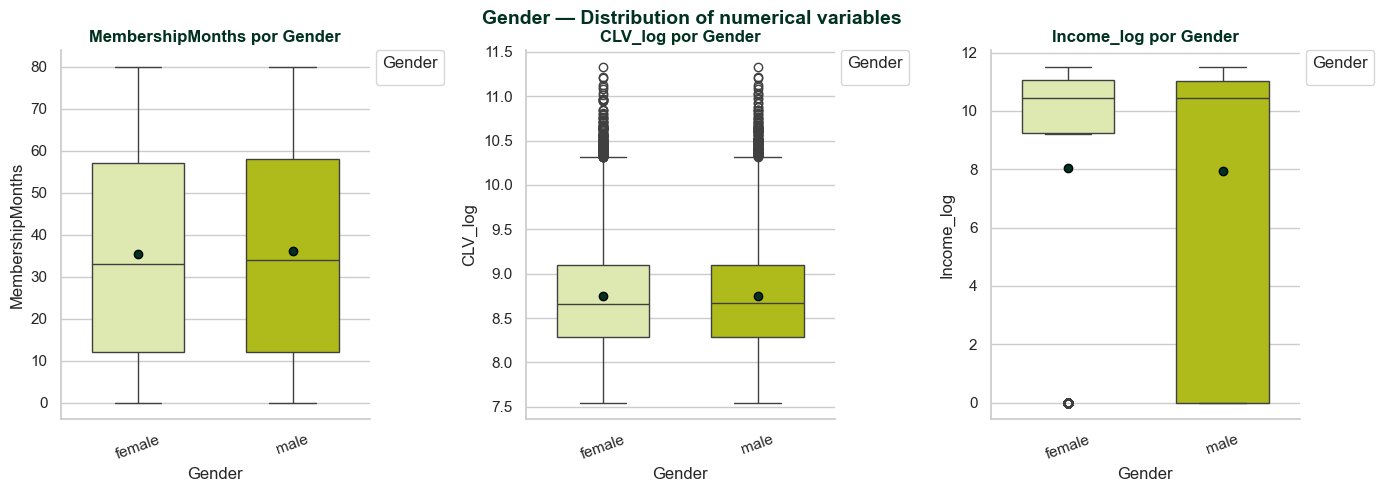

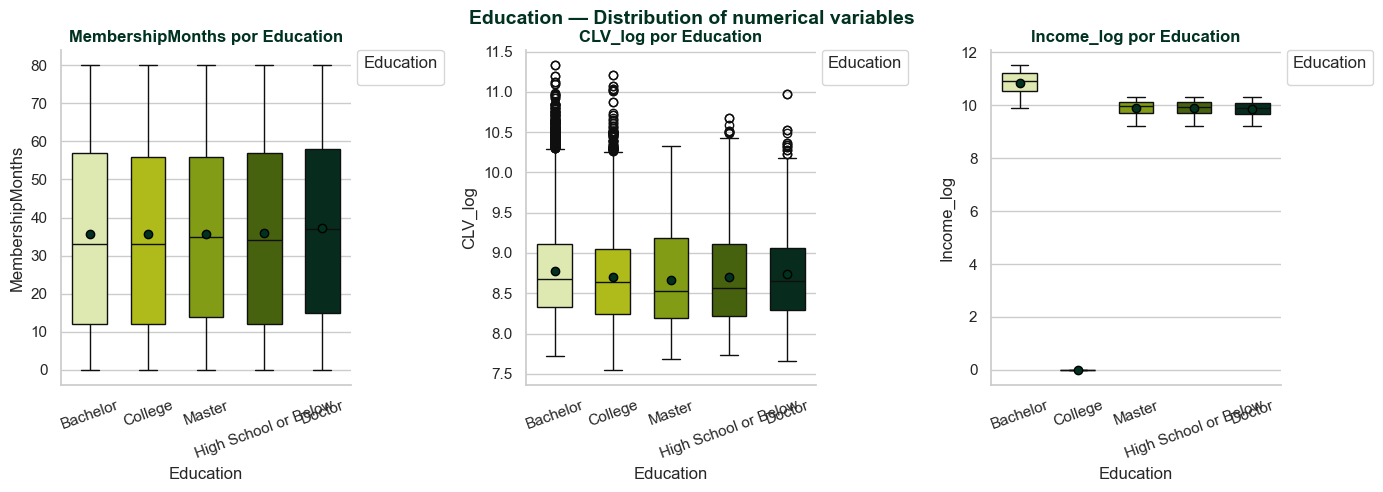

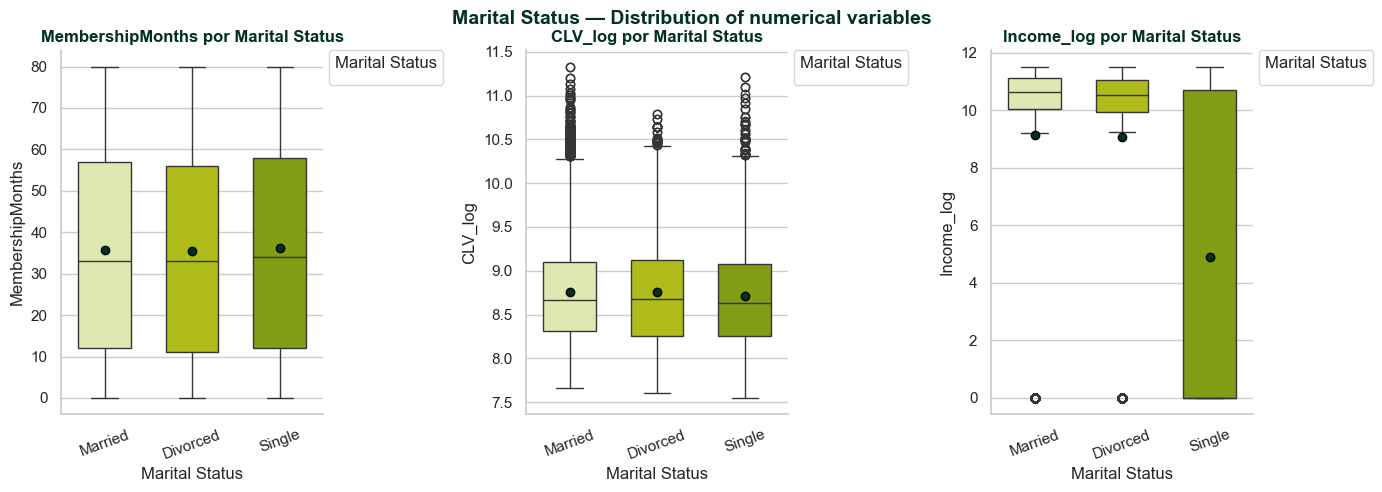

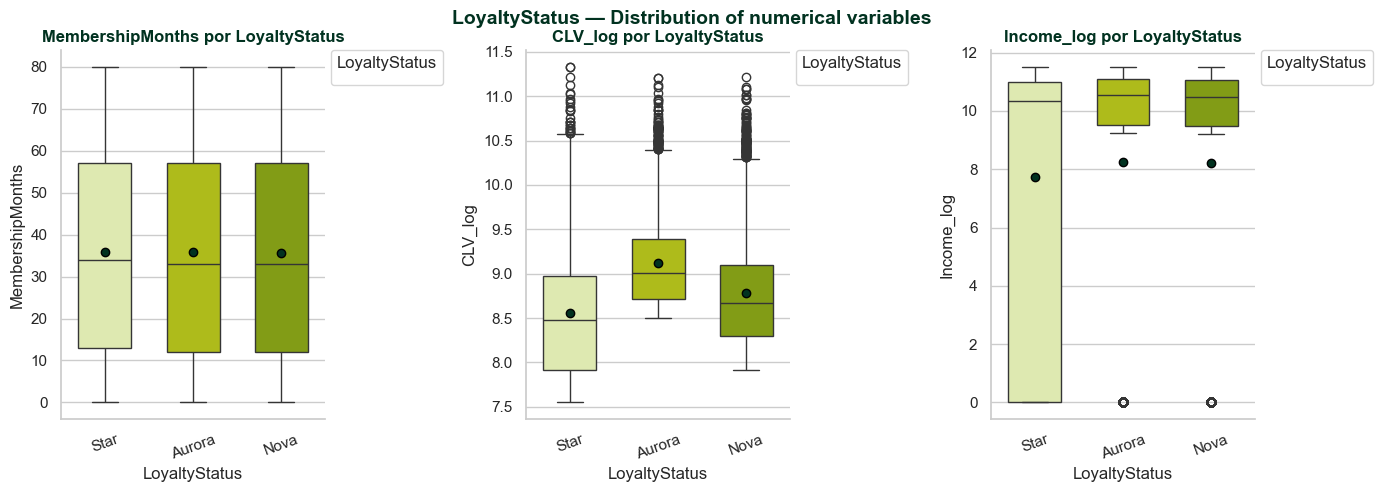

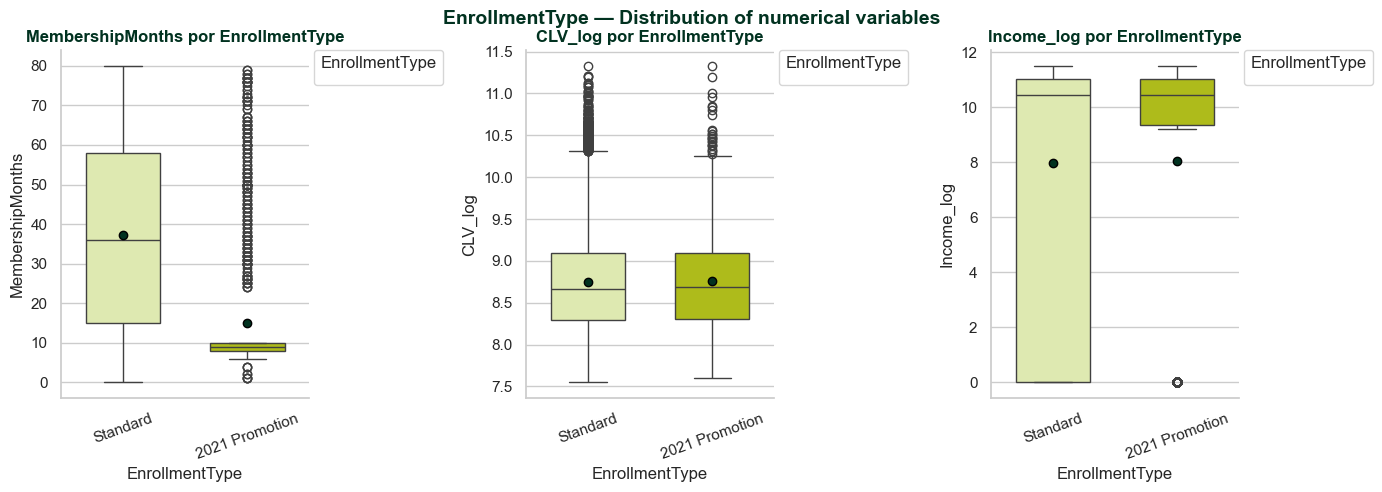

In [2916]:
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

PALETTE = ["#E4F2A8", "#C4D600", "#8FB200", "#4C7000", "#013220"]

for cat in cat_features:
    fig, axes = plt.subplots(1, len(num_features), figsize=(14, 5))
    axes = np.atleast_1d(axes)

    for ax, num in zip(axes, num_features):
        sns.boxplot(
            data=customer_df, x=cat, y=num, palette=PALETTE, ax=ax, width=0.6, showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "#013220", "markeredgecolor": "black"}
        )

        ax.set_title(f"{num} por {cat}", fontsize=12, color="#013220", fontweight="bold")
        ax.set_xlabel(cat)
        ax.set_ylabel(num)
        ax.tick_params(axis="x", rotation=20)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(
            handles, labels, title=f"{cat}",
            bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.,
            frameon=True, facecolor="white"
        )

    plt.suptitle(f"{cat} — Distribution of numerical variables", fontsize=14, color="#013220", fontweight="bold")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

#### MembershipMonths with other numerical variables:

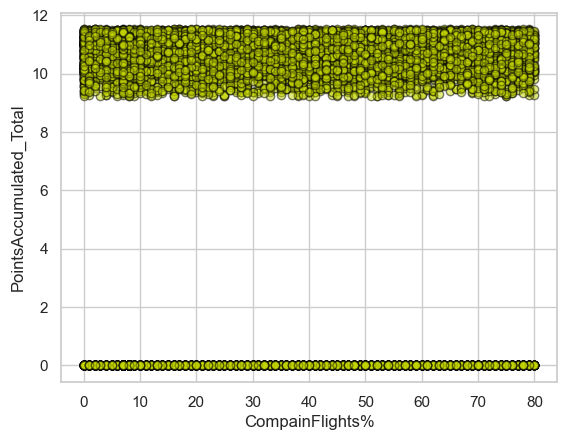

In [2918]:
sns.set(style="whitegrid")
plt.scatter(customer_df["MembershipMonths"], customer_df["Income_log"], 
            edgecolors="black", 
            alpha=.5, 
            color="#C4D600" 
           )

plt.xlabel("CompainFlights%")
plt.ylabel("PointsAccumulated_Total")
plt.show()

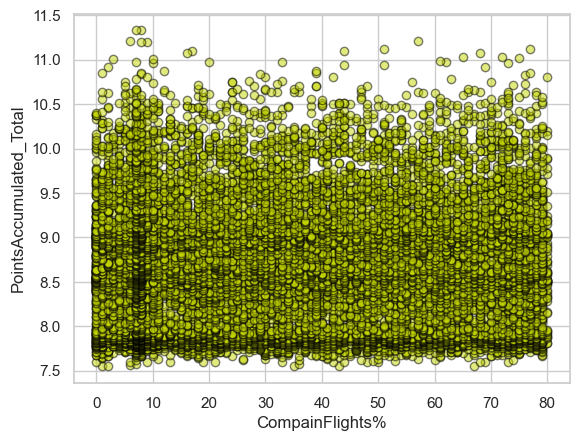

In [2919]:
sns.set(style="whitegrid")
plt.scatter(customer_df["MembershipMonths"], customer_df["CLV_log"], 
            edgecolors="black", 
            alpha=.5, 
            color="#C4D600" 
           )

plt.xlabel("CompainFlights%")
plt.ylabel("PointsAccumulated_Total")
plt.show()

In [2920]:
customer_df.shape

(16373, 17)

<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **2. Flights** <a id="Flights"></a>   
    
</a>
    
</div>

## **<span style="color:#c3d664;">2.1. Data Understanding (Meta Data)</span>**<a id="data-Understanding"></a>

##### Import the dataset containing information on loyalty program customers into a pandas DataFrame.

In [2924]:
flights_df = pd.read_csv("DM_AIAI_FlightsDB.csv")

#### **Flighs Meta Data:**

|                Variables | Description                                                      |
| -----------------------: | ---------------------------------------------------------------- |
|                     Year | Year of flight activity record                                   |
|                    Month | Month of flight activity record (1–12)                           |
|            YearMonthDate | First day of the month for the activity period                   |
|               NumFlights | Total number of flights taken by the customer during the month   |
| NumFlightsWithCompanions | Number of flights where the customer traveled with companions    |
|               DistanceKM | Total distance traveled in kilometers during the month           |
|        PointsAccumulated | Loyalty points earned by the customer during the month           |
|           PointsRedeemed | Loyalty points redeemed by the customer during the month         |
| DollarCostPointsRedeemed | Dollar value of points redeemed during the month                 |

## **<span style="color:#c3d664;">2.2. Data Introduction</span>**<a id="data-Introduction"></a>

Display the first five rows to confirm successful data import and review the dataset’s structure.

In [2929]:
flights_df.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [2930]:
flights_df.describe().T

count           mean            std       min  \
Loyalty#                  608436.0  550037.873084  258935.180575  100018.0   
Year                      608436.0    2020.000000       0.816497    2019.0   
Month                     608436.0       6.500000       3.452055       1.0   
NumFlights                608436.0       3.908107       5.057889       0.0   
NumFlightsWithCompanions  608436.0       0.983944       2.003785       0.0   
DistanceKM                608436.0    7939.341419   10260.421873       0.0   
PointsAccumulated         608436.0     793.777781    1025.918521       0.0   
PointsRedeemed            608436.0     235.251678     983.233374       0.0   
DollarCostPointsRedeemed  608436.0       2.324835       9.725168       0.0   

                                25%         50%          75%       max  
Loyalty#                  326961.00  550834.000  772194.0000  999986.0  
Year                        2019.00    2020.000    2021.0000    2021.0  
Month                          3.75       6.500       9.2500      12.0  
NumFlights                     0.00       0.000       7.2000      21.0  
NumFlightsWithCompanions       0.00       0.000       0.9000      11.0  
DistanceKM                     0.00     856.400   15338.1750   42040.0  
PointsAccumulated              0.00      85.275    1533.7125    4204.0  
PointsRedeemed                 0.00       0.000       0.0000    7496.0  
DollarCostPointsRedeemed       0.00       0.000       0.0000      74.0

Provides a summary of the dataset, including the total number of observations, the data types of each column, and the presence of missing values.

In [2932]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


To find out the number of rows and columns in the DF:

In [2934]:
flights_df.shape

(608436, 10)

In [2935]:
flights_df['Loyalty#'].value_counts()

Loyalty#
678205    108
411734     72
434807     72
783165     72
927026     72
         ... 
836405     36
492158     36
327796     36
793423     36
854855     36
Name: count, Length: 16737, dtype: int64

## **<span style="color:#c3d664;">2.3. Data Exploration</span>**<a id="data-Exploration"></a>

### **<span style="color:#c3d664;">2.3.1. Duplicates</span>**<a id="duplicates"></a>

Check if there are any lines that are exactly the same.

In [3015]:
duplicates_F = flights_df.duplicated().sum()
duplicates_F 

2903

In [3017]:
print(f"The percentage of duplicated observations are {round(100*(duplicates_F/len(flights_df)), 2)}%.")

The percentage of duplicated observations are 0.48%.


Since these duplicates represent only 0.48% of the dataset, they will be eliminated.

In [3020]:
flights_df = flights_df.drop_duplicates()

In [3022]:
flights_df.duplicated().sum()

0

We now see the number of repeated "Loyaltys#", but in this dataframe it makes sense to have them, because each row represents a month for each customer across all the years they have been/are a loyal customer.

In [3024]:
flights_df["Loyalty#"].duplicated().sum()

588796

### **<span style="color:#c3d664;">2.3.2. Missing Values</span>**<a id="missing-values"></a>

In [3027]:
flights_df.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

Verified that there are no missing values!

### **<span style="color:#c3d664;">2.3.3. Strange Values</span>**<a id="strange-values"></a>

#### **Features Type**

Converting the dates to datatype.

In [3033]:
flights_df["YearMonthDate"] = pd.to_datetime(flights_df["YearMonthDate"], errors='coerce')

In [3035]:
flights_df["NumFlights"] = flights_df["NumFlights"].astype(int)

In [3037]:
flights_df["NumFlightsWithCompanions"] = flights_df["NumFlightsWithCompanions"].astype(int)

In [3039]:
flights_df.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12    2021-12-01           2                         2   
1    464105  2021     12    2021-12-01           0                         0   
2    681785  2021     12    2021-12-01          10                         3   
3    185013  2021     12    2021-12-01          16                         4   
4    216596  2021     12    2021-12-01           9                         0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

Taking the example of the first customer to observe the flights they made.

In [3042]:
flights_df[flights_df["Loyalty#"] == 413052]

Loyalty#  Year  Month YearMonthDate  NumFlights  \
0         413052  2021     12    2021-12-01           2   
6628      413052  2020      6    2020-06-01           0   
29655     413052  2020      5    2020-05-01          14   
30297     413052  2020      4    2020-04-01           6   
57358     413052  2020      3    2020-03-01           0   
67837     413052  2020      2    2020-02-01           0   
88790     413052  2020      1    2020-01-01           5   
119769    413052  2021     11    2021-11-01           3   
125606    413052  2021      6    2021-06-01          13   
131375    413052  2021      5    2021-05-01           5   
159133    413052  2021     10    2021-10-01           0   
191092    413052  2021      9    2021-09-01           1   
204965    413052  2021      8    2021-08-01           4   
229465    413052  2021      7    2021-07-01          11   
249047    413052  2021      4    2021-04-01           0   
253570    413052  2021      3    2021-03-01           3   
266443    413052  2021      2    2021-02-01           3   
292432    413052  2021      1    2021-01-01           3   
293591    413052  2020     12    2020-12-01           0   
322598    413052  2020     11    2020-11-01           9   
343952    413052  2020     10    2020-10-01           6   
350175    413052  2020      9    2020-09-01           0   
379298    413052  2020      8    2020-08-01           0   
391626    413052  2020      7    2020-07-01           2   
411461    413052  2019      1    2019-01-01           4   
428362    413052  2019      2    2019-02-01           0   
445263    413052  2019      3    2019-03-01           0   
462164    413052  2019      4    2019-04-01           5   
479065    413052  2019      5    2019-05-01          12   
495966    413052  2019      6    2019-06-01           0   
512867    413052  2019      7    2019-07-01           1   
529768    413052  2019      8    2019-08-01           0   
546669    413052  2019      9    2019-09-01           0   
563570    413052  2019     10    2019-10-01           5   
580471    413052  2019     11    2019-11-01           8   
597372    413052  2019     12    2019-12-01           0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
0                              2      9384.0             938.00   
6628                           0         0.0               0.00   
29655                          3      1032.0             103.00   
30297                          2      1635.0             163.00   
57358                          0         0.0               0.00   
67837                          0         0.0               0.00   
88790                          2       291.0              29.00   
119769                         0      3880.0             388.00   
125606                         0     32323.0            3232.00   
131375                         0     14172.0            1417.00   
159133                         0         0.0               0.00   
191092                         1     28853.0            2885.00   
204965                         0     29622.0            2962.00   
229465                         7     24029.0            2402.00   
249047                         0         0.0               0.00   
253570                         3     13798.0            1379.00   
266443                         3      8887.0             888.00   
292432                         0      1860.0             186.00   
293591                         0         0.0               0.00   
322598                         0     19283.0            1928.00   
343952                         6     11772.0            1177.00   
350175                         0     13859.0            1385.00   
379298                         0         0.0               0.00   
391626                         0     39834.0            3983.00   
411461                         1       261.9              26.19   
428362                         0         0.0               0.00   
445263         

Verifying that are many months where the customer didn't travel, so we're going to delete all those observations in DF.

In [3045]:
flights_df = flights_df[flights_df["NumFlights"] != 0]

In [3047]:
flights_df.shape

(298061, 10)

Since the variables "Year", "Month" and "YearMonthDate" do not add new information to the analysis, they will be removed from the dataset.

In [3049]:
flights_df = flights_df.drop(columns=["Year", "Month", "YearMonthDate"])

In [3051]:
flights_df.columns

Index(['Loyalty#', 'NumFlights', 'NumFlightsWithCompanions', 'DistanceKM',
       'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

### **<span style="color:#c3d664;">2.3.4. Visualization</span>**<a id="visualization"></a>

#### 1 variable

##### Numerical Variable

In [3057]:
numeric_variables = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed" ]

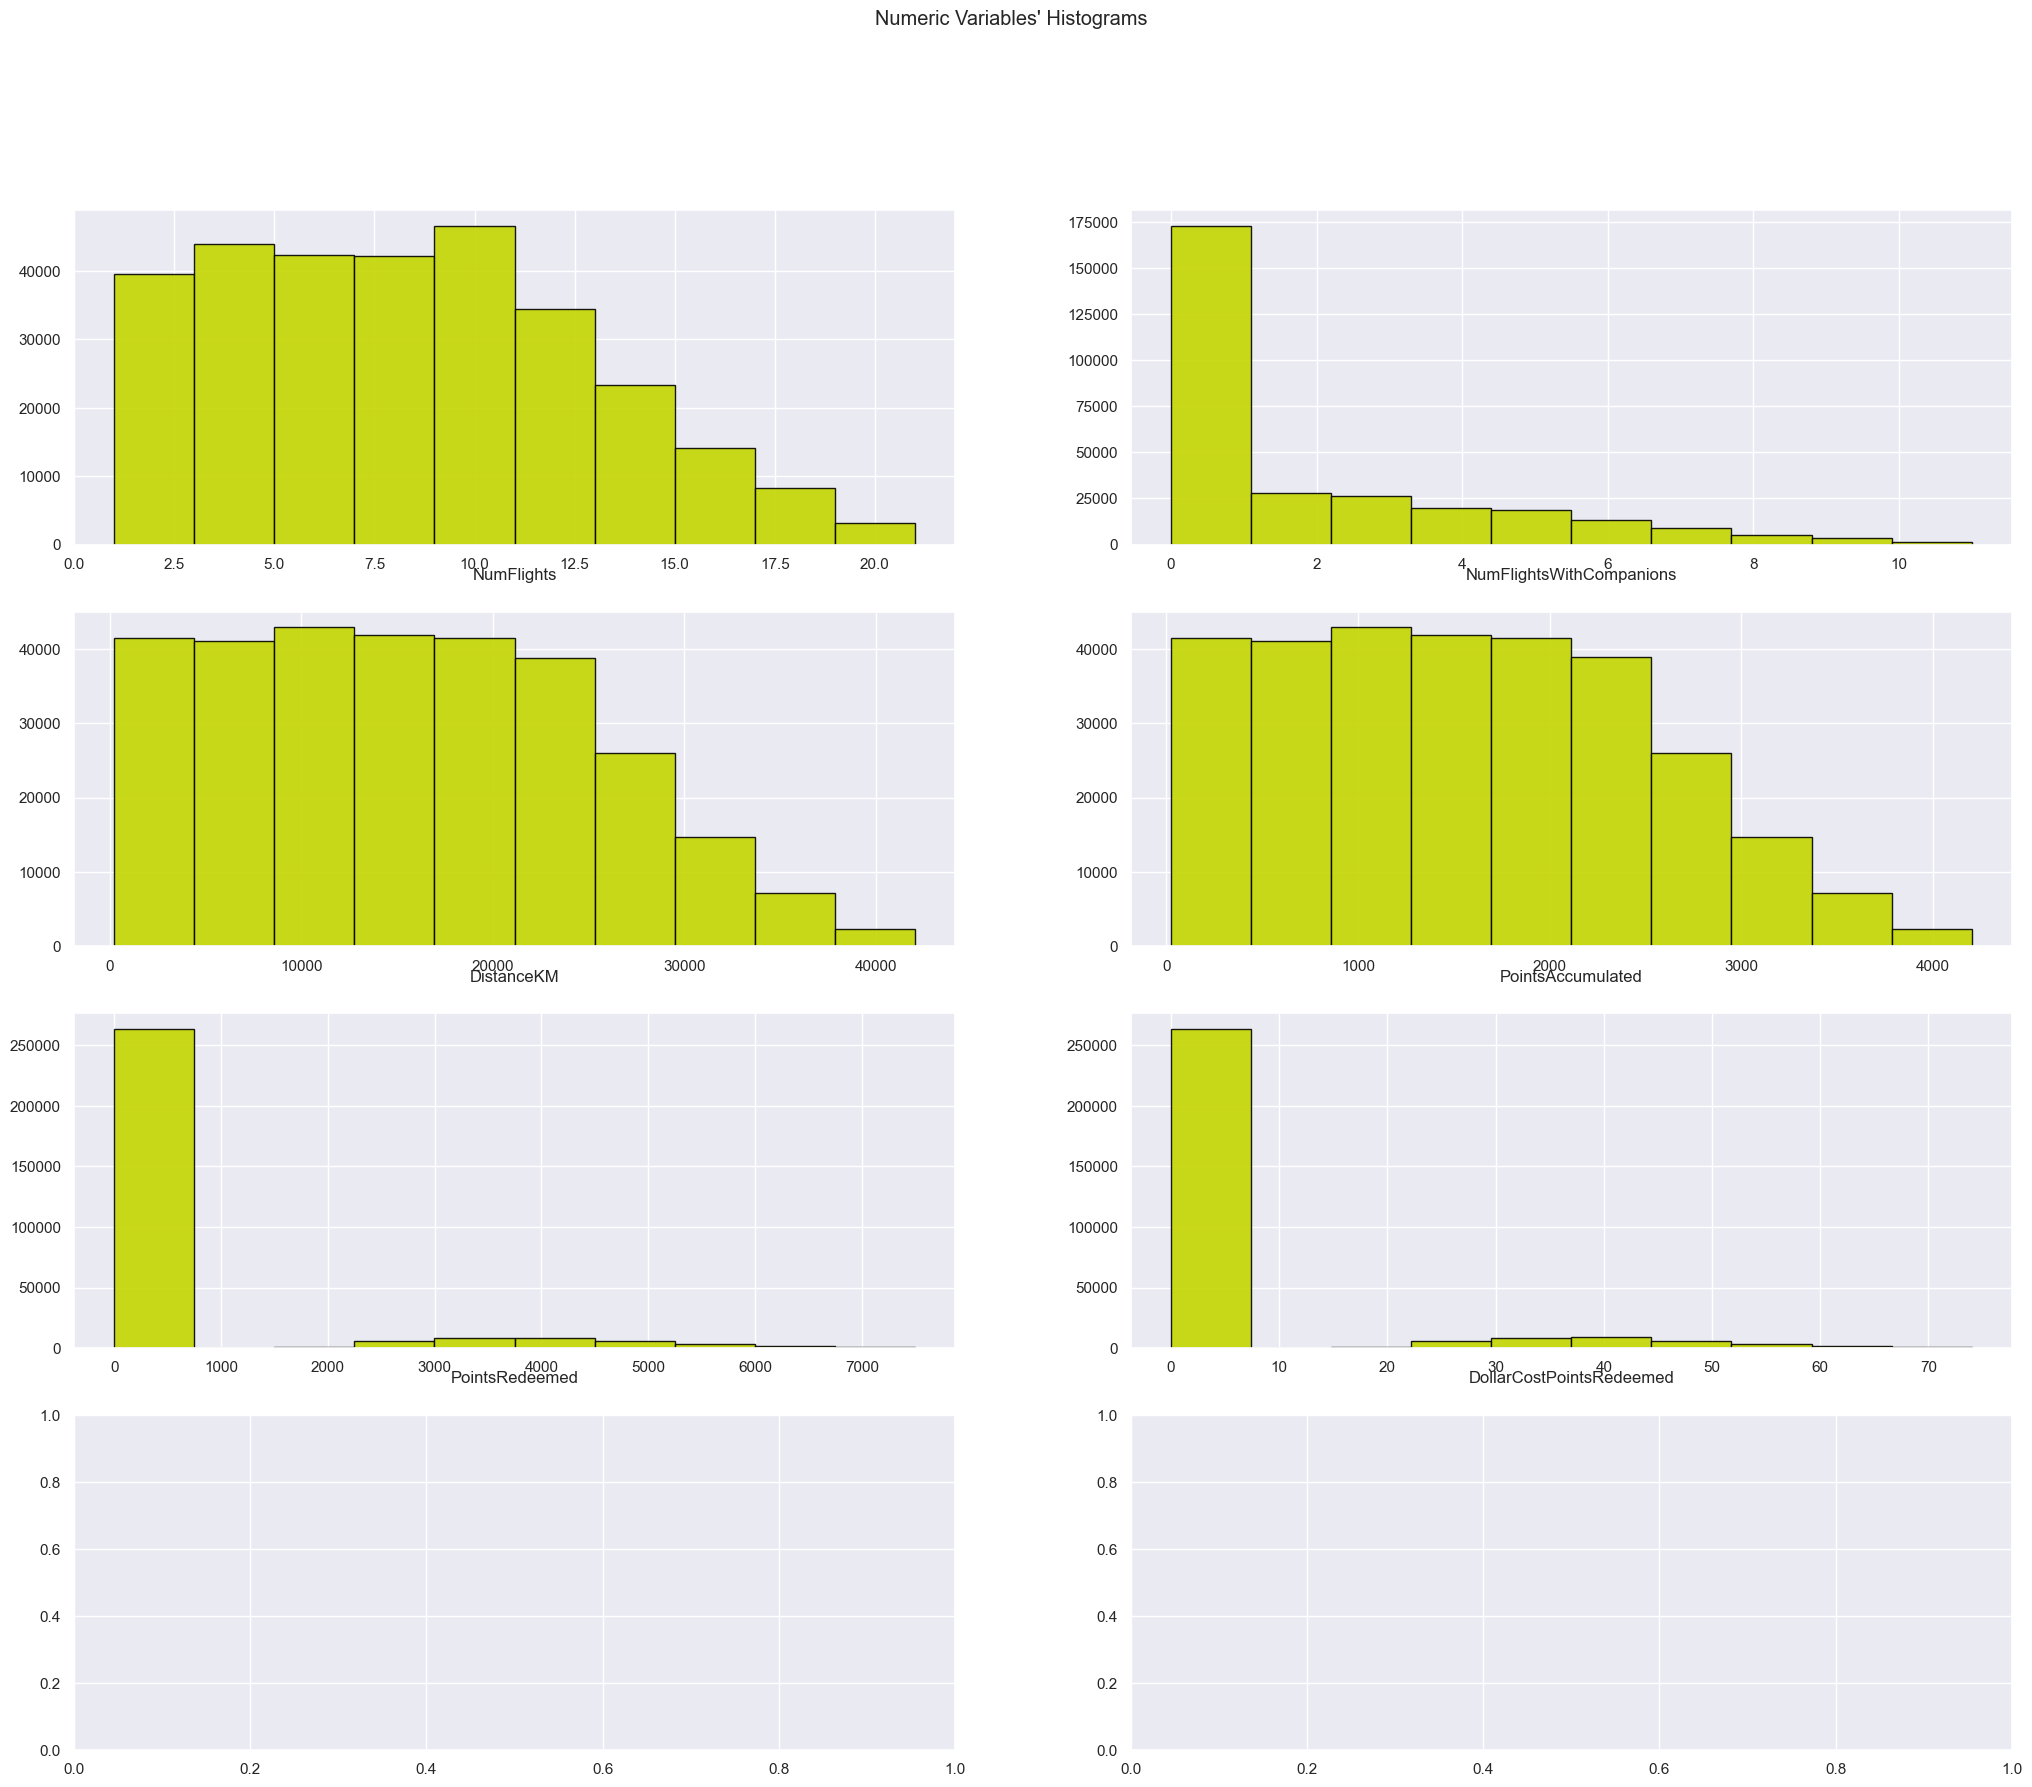

In [3059]:
sns.set()
sp_rows = 4
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(25, 20))
hist_color = "#C4D600"

for ax, feat in zip(axes.flatten(), numeric_variables):
    ax.hist(flights_df[feat], color=hist_color, edgecolor="black", alpha=0.9, bins=10)
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.show()

#### Between 2 Variables:

##### Numerical VS Numerical:

###### NumFlights VS PointsAccumulated

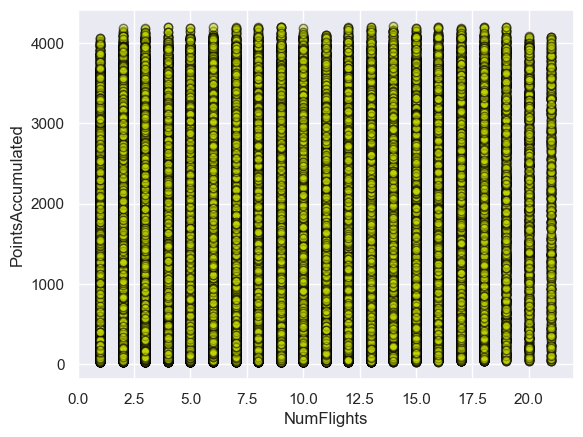

In [3064]:
plt.scatter(flights_df["NumFlights"], flights_df["PointsAccumulated"], 
            edgecolors="black", 
            alpha=.5, 
            color="#C4D600" 
           )


plt.xlabel("NumFlights")
plt.ylabel("PointsAccumulated")

plt.show()

#### HeatMap

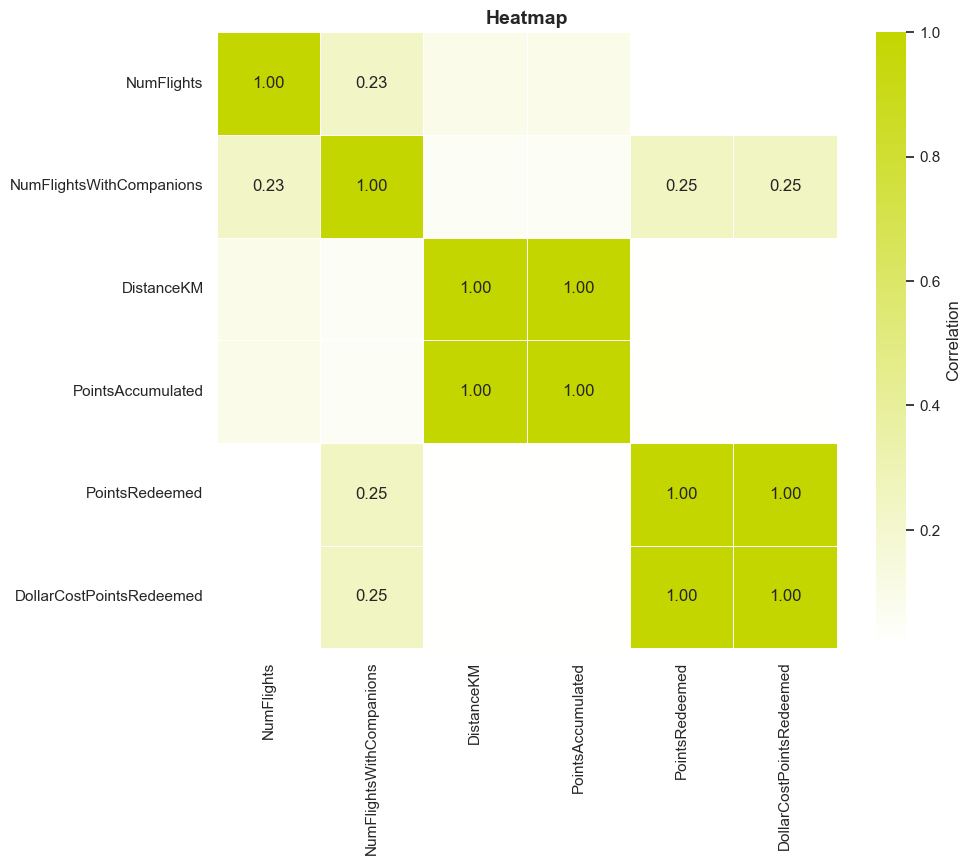

In [3072]:
corr = flights_df[numeric_variables].corr()
mask_annot = corr.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.2 else "")
cmap = mcolors.LinearSegmentedColormap.from_list("custom_green", ["#ffffff", "#C4D600"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=mask_annot,        
    fmt="",                  
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Heatmap", fontsize=14, weight="bold")
plt.show()

##### It is necessary to eliminate important variables; there are two redundancy relationships since two values appear equal to 1.

##### The variables PointsAccumulated and PointsRedeemed will be kept, and the variables DistanceKM and DollarCostPointsRedeemed will be deleted.

In [3076]:
flights_df.head(1)

Loyalty#  NumFlights  NumFlightsWithCompanions  DistanceKM  \
0    413052           2                         2      9384.0   

   PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0              938.0             0.0                       0.0

### **<span style="color:#c3d664;">2.3.5. Outliers</span>**<a id="outliers"></a>

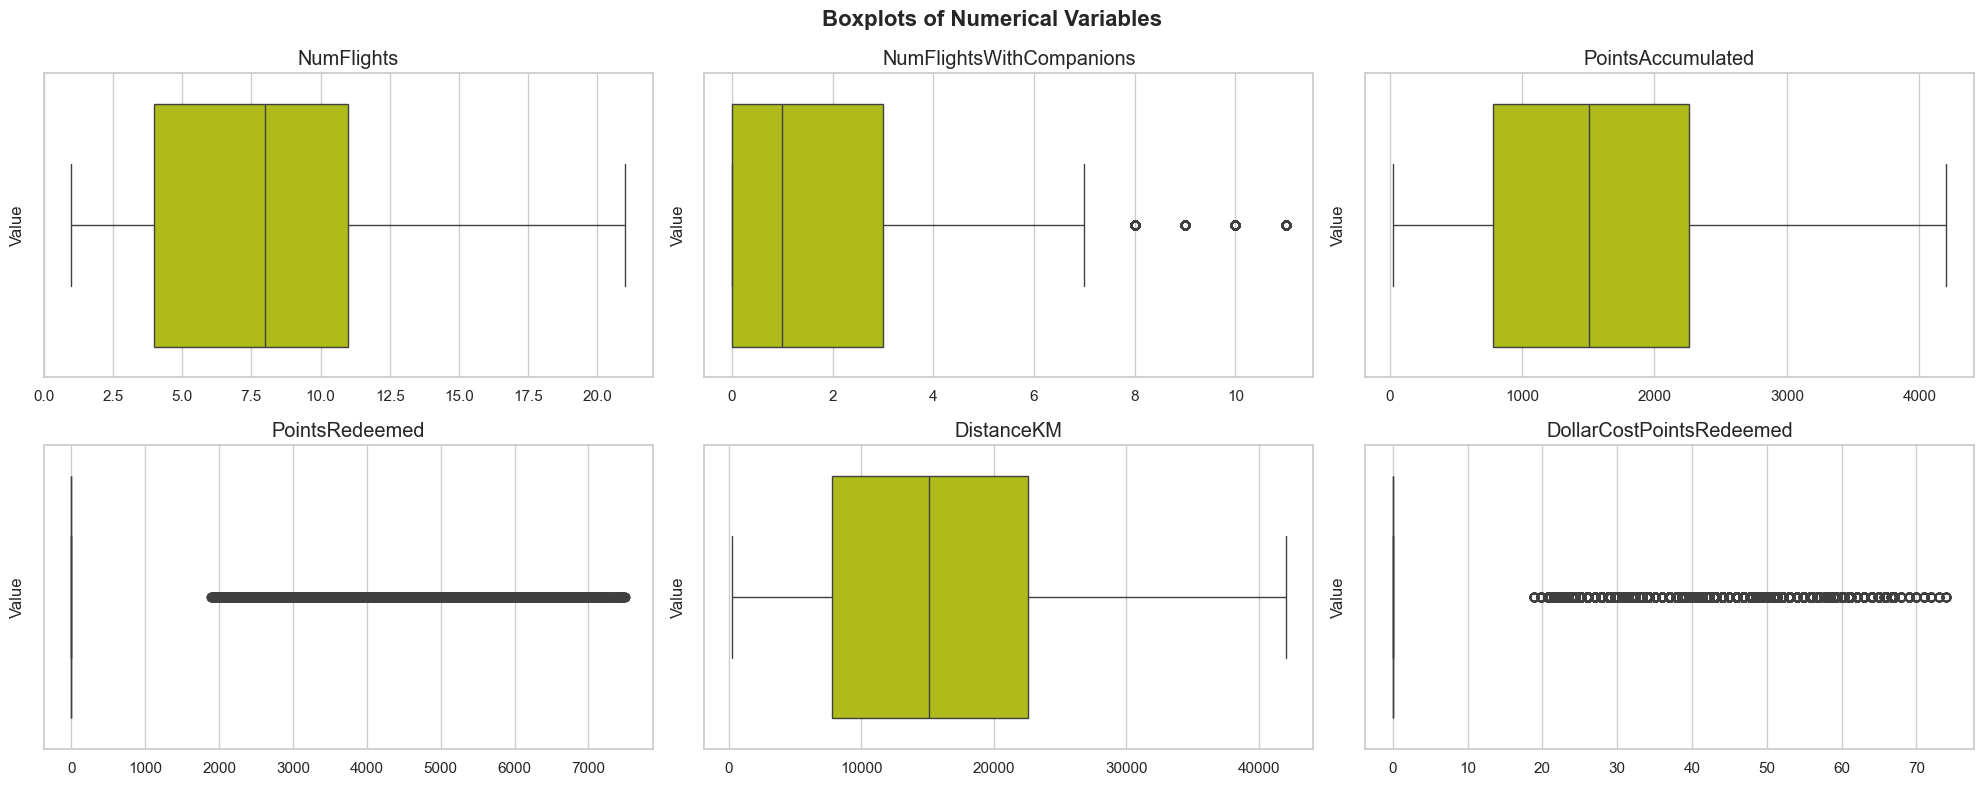

In [3080]:
numeric_variables = ["NumFlights", "NumFlightsWithCompanions", "PointsAccumulated", "PointsRedeemed", "DistanceKM", "DollarCostPointsRedeemed" ]

sns.set_style('whitegrid')

# Creates a figure with multiple subfigures (1 boxplot per variable)
fig, axes = plt.subplots(
    2, 
    ceil(len(numeric_variables) / 2),
    figsize=(20, 8)
)

axes = axes.flatten()  # 1D

for ax, feat in zip(axes, numeric_variables):
    sns.boxplot(x=flights_df[feat], ax=ax, color="#C4D600")
    ax.set_title(feat, fontsize='large')
    ax.set_xlabel("")
    ax.set_ylabel("Value")

# Removing empty axes if the number of variables is odd.
for i in range(len(numeric_variables), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle("Boxplots of Numerical Variables", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

## **<span style="color:#c3d664;">2.4. Feature Engineering</span>**<a id="feature-Engineering"></a>

### **<span style="color:#c3d664;">2.4.1. Creation of new variables</span>**<a id="missing-values-of-new-variables"></a>

In [3084]:
flights_df.head()

Loyalty#  NumFlights  NumFlightsWithCompanions  DistanceKM  \
0    413052           2                         2      9384.0   
2    681785          10                         3     14745.0   
3    185013          16                         4     26311.0   
4    216596           9                         0     19275.0   
5    486956          12                         7     23967.0   

   PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0              938.0             0.0                       0.0  
2             1474.0             0.0                       0.0  
3             2631.0          3213.0                      32.0  
4             1927.0             0.0                       0.0  
5             2396.0             0.0                       0.0

In [3086]:
flights_df[flights_df["Loyalty#"] == 681785]

Loyalty#  NumFlights  NumFlightsWithCompanions  DistanceKM  \
2         681785          10                         3     14745.0   
6630      681785           1                         1     26686.0   
29657     681785          11                         5     28545.0   
30299     681785          12                         0     21615.0   
67839     681785          10                         5      8953.0   
119771    681785           1                         1      1855.0   
125608    681785          13                         2     13940.0   
131377    681785          11                         6     12667.0   
159135    681785           1                         0     25830.0   
191094    681785           2                         0     16742.0   
204967    681785          14                         9     34467.0   
253572    681785          10                         6     25854.0   
266445    681785           6                         0      7699.0   
292434    681785           7                         0     15869.0   
293593    681785           5                         5     17889.0   
322600    681785          10                         2      5200.0   
350177    681785          15                         6     28746.0   
433453    681785           9                         4      8057.7   
467255    681785          10                         0     19453.5   
484156    681785           9                         4     25690.5   
551760    681785          13                         5     25871.4   
585562    681785           9                         1      4680.0   
602463    681785           4                         4     16100.1   

        PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
2                 1474.00             0.0                       0.0  
6630              2668.00             0.0                       0.0  
29657             2854.00             0.0                       0.0  
30299             2161.00             0.0                       0.0  
67839              895.00             0.0                       0.0  
119771             185.00             0.0                       0.0  
125608            1394.00             0.0                       0.0  
131377            1266.00             0.0                       0.0  
159135            2583.00             0.0                       0.0  
191094            1674.00             0.0                       0.0  
204967            3446.00             0.0                       0.0  
253572            2585.00             0.0                       0.0  
266445             769.00             0.0                       0.0  
292434            1586.00             0.0                       0.0  
293593            1788.00             0.0                       0.0  
322600             520.00             0.0                       0.0  
350177            2874.00             0.0                       0.0  
433453             805.77             0.0                       0.0  
467255            1945.35             0.0                       0.0  
484156            2569.05             0.0                       0.0  
551760            2587.14             0.0                       0.0  
585562             468.00             0.0                       0.0  
602463            1610.01             0.0                       0.0

In [3088]:
flights_df_sum = flights_df.copy()

cols = [
    "NumFlights",
    "NumFlightsWithCompanions",
    "DistanceKM",
    "PointsAccumulated",
    "PointsRedeemed",
    "DollarCostPointsRedeemed"
    
]

# ensure numeric and NaN=0
#flights_df_sum[cols] = flights_df_sum[cols].apply(pd.to_numeric, errors="coerce").fillna(0)

# One line per Loyalty#, total sums
totals = (
    flights_df_sum.groupby("Loyalty#", as_index=False)[cols]
      .sum()
      .rename(columns={
          "NumFlights": "NumFlights_Total",
          "NumFlightsWithCompanions": "NumFlightsWithCompanions_Total",
          "PointsAccumulated": "PointsAccumulated_Total",
          "PointsRedeemed": "PointsRedeemed_Total",
          "DistanceKM": "DistanceKM_Total",
          "DollarCostPointsRedeemed": "DollarCostPointsRedeemed_Total"
      })
)

In [3090]:
# percentage of people who fly with someone else
totals["CompainFlights%"] = ((totals["NumFlightsWithCompanions_Total"] / totals["NumFlights_Total"])* 100).round(1)

In [3092]:
totals["CompainFlights%"].isna().sum()

0

In [3094]:
totals.head()

Loyalty#  NumFlights_Total  NumFlightsWithCompanions_Total  \
0    100018               225                              45   
1    100102               245                              55   
2    100140               211                              51   
3    100214               108                              17   
4    100272               181                              50   

   DistanceKM_Total  PointsAccumulated_Total  PointsRedeemed_Total  \
0          530230.0                 53014.30               20562.8   
1          339114.6                 33903.96               18760.6   
2          424627.4                 42452.24                4896.0   
3          316464.3                 31640.03                9613.7   
4          380387.9                 38028.99               10891.4   

   DollarCostPointsRedeemed_Total  CompainFlights%  
0                           201.9             20.0  
1                           186.2             22.4  
2                            48.0             24.2  
3                            94.9             15.7  
4                           107.0             27.6

In [3096]:
totals.shape

(15236, 8)

In [3098]:
totals = totals.drop(['DistanceKM_Total', 'DollarCostPointsRedeemed_Total'], axis=1)

### **<span style="color:#c3d664;">2.4.2. Missing values of new variables</span>**<a id="missing-values-of-new-variables"></a>

In [3101]:
totals.isna().sum()

Loyalty#                          0
NumFlights_Total                  0
NumFlightsWithCompanions_Total    0
PointsAccumulated_Total           0
PointsRedeemed_Total              0
CompainFlights%                   0
dtype: int64

In [3103]:
numeric_variables_sum = ["NumFlights_Total", "NumFlightsWithCompanions_Total",  
                         "PointsAccumulated_Total", "PointsRedeemed_Total", "CompainFlights%" ]

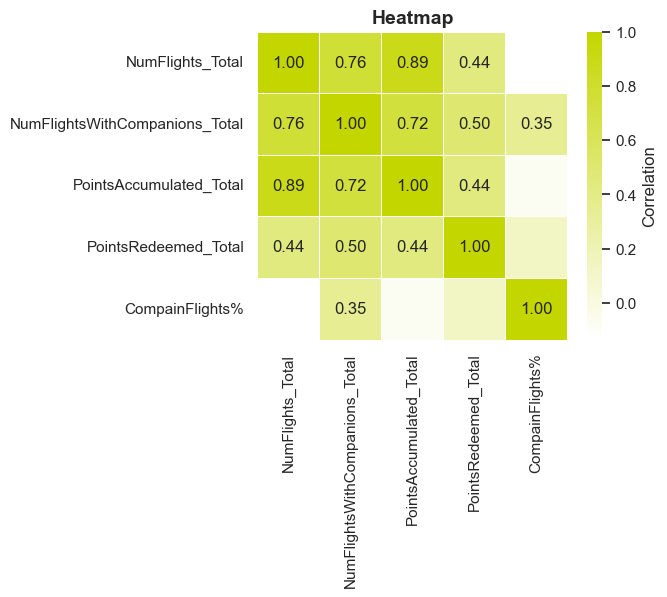

In [3105]:
corr = totals[numeric_variables_sum].corr()
mask_annot = corr.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.2 else "")
cmap = mcolors.LinearSegmentedColormap.from_list("custom_green", ["#ffffff", "#C4D600"])

plt.figure(figsize=(5, 4))
sns.heatmap(
    corr,
    annot=mask_annot,        
    fmt="",                  
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Heatmap", fontsize=14, weight="bold")
plt.show()

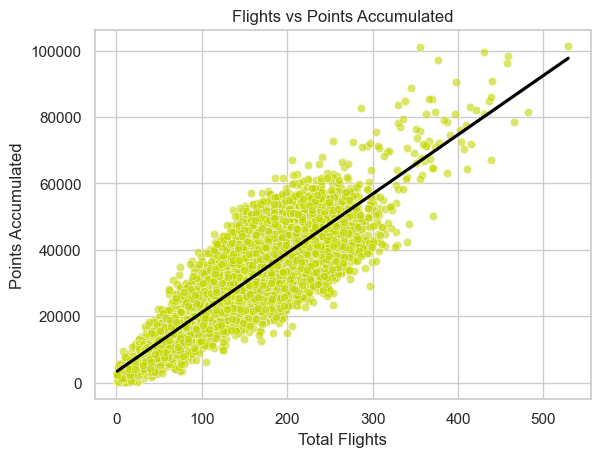

In [3107]:
sns.scatterplot(
    data=totals, 
    x="NumFlights_Total", 
    y="PointsAccumulated_Total",
    color="#C4D600", 
    alpha=0.6
)

sns.regplot(
    data=totals, 
    x="NumFlights_Total", 
    y="PointsAccumulated_Total",
    scatter=False,           
    line_kws={"color": "black"}
)

plt.title("Flights vs Points Accumulated")
plt.xlabel("Total Flights")
plt.ylabel("Points Accumulated")
plt.show()

### **<span style="color:#c3d664;">2.4.3. Outliers of new variables</span>**<a id="outliers-of-new-variables"></a>

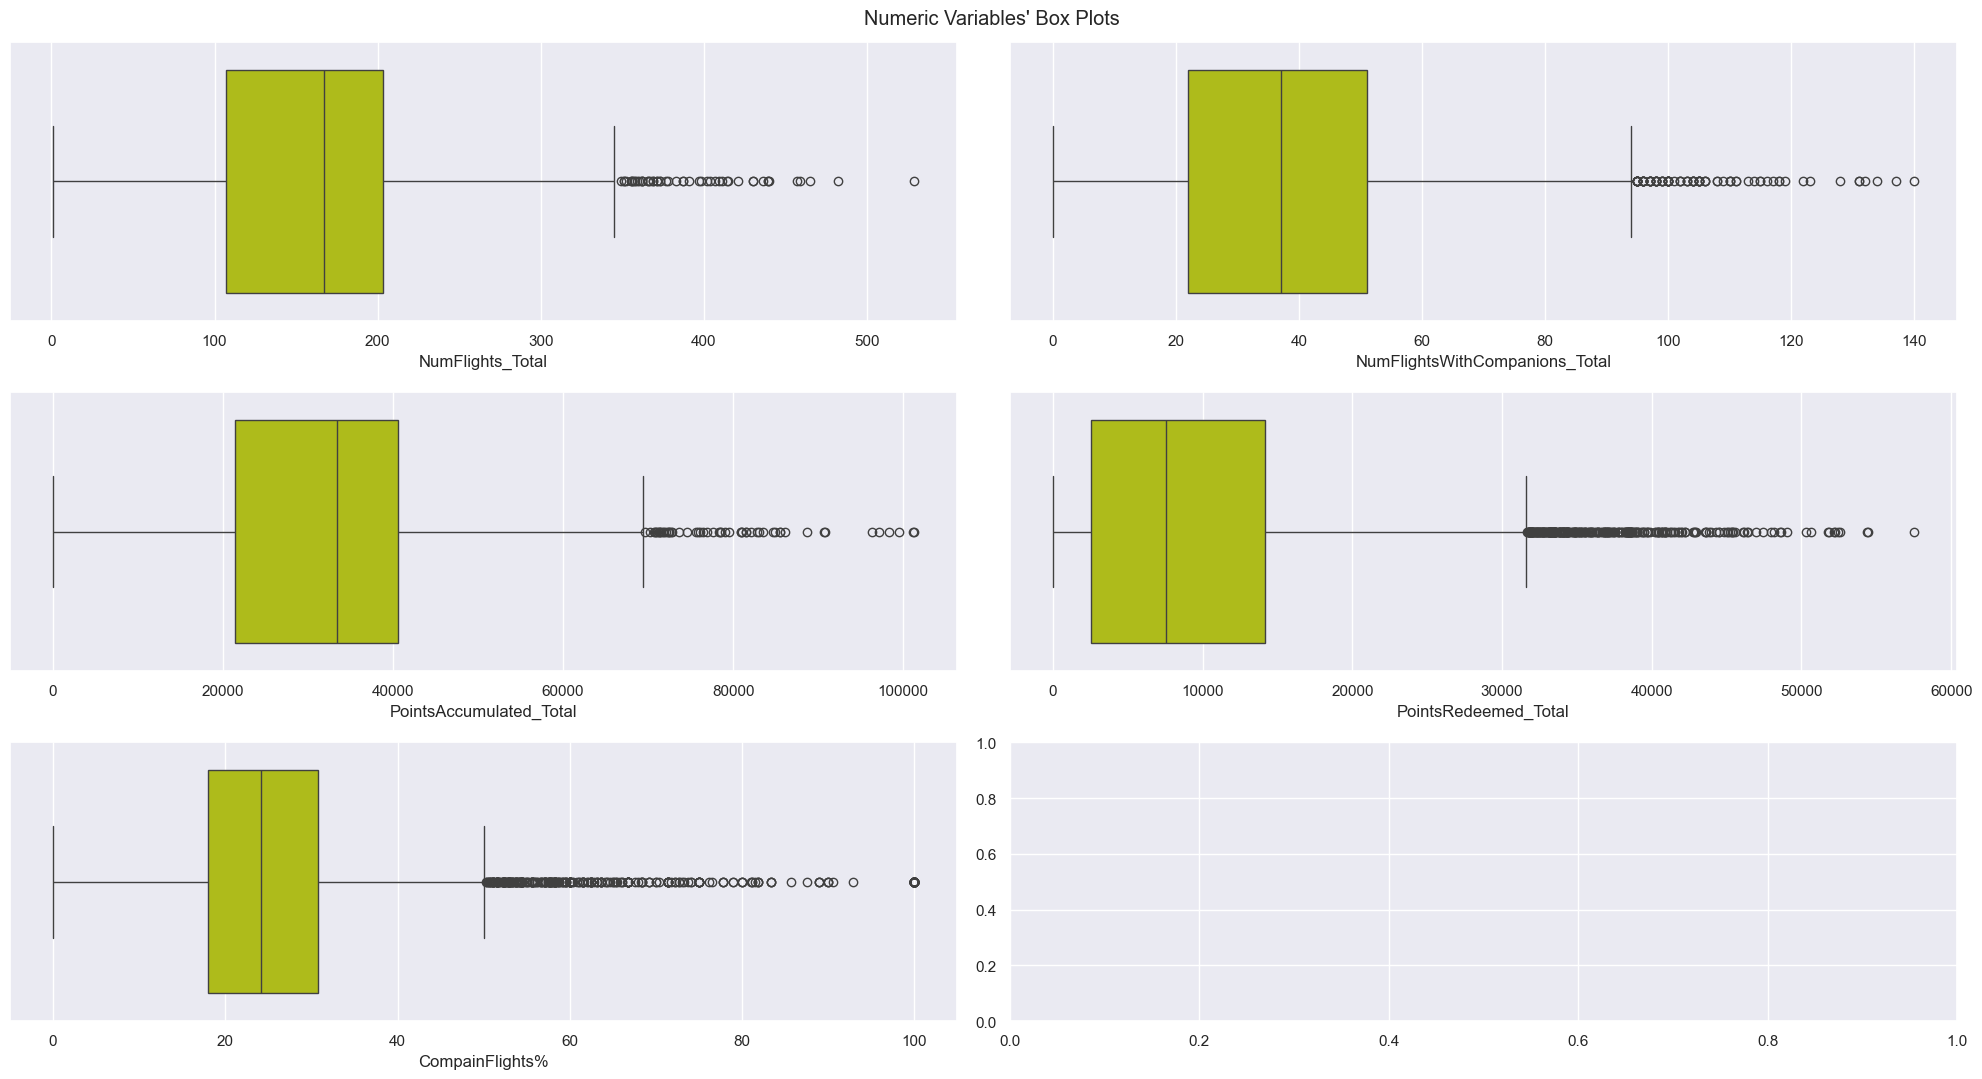

In [3111]:
sns.set()
#sns.set(style="whitegrid")

sp_rows = 3
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

for ax, feat in zip(axes.flatten(), numeric_variables_sum):
    sns.boxplot(
        x=totals[feat],
        ax=ax,
        color="#C4D600"
    )

title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.show()

### **<span style="color:#c3d664;">2.4.4. Visualization of new variables</span>**<a id="visualization-of-new-variables"></a>

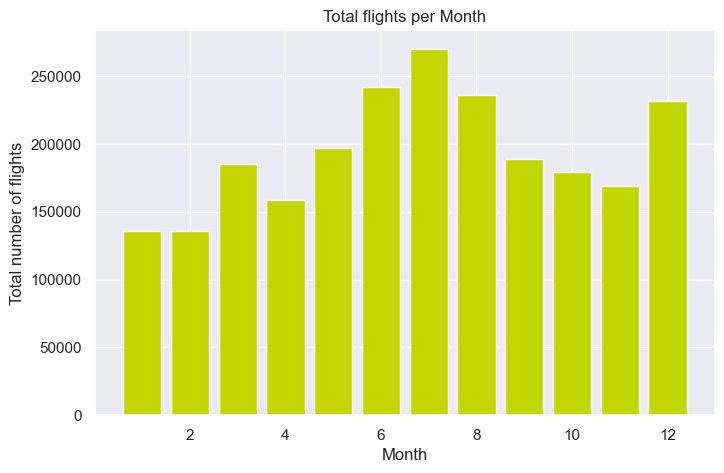

In [3117]:
# sum of the flights per month (columns)
month_totals = flights_by_month.drop(columns="Loyalty#", errors="ignore").sum()

plt.figure(figsize=(8,5))
plt.bar(month_totals.index, month_totals.values, color="#C4D600")
plt.title("Total flights per Month")
plt.xlabel("Month")
plt.ylabel("Total number of flights")
plt.show()

#### Compain Flights

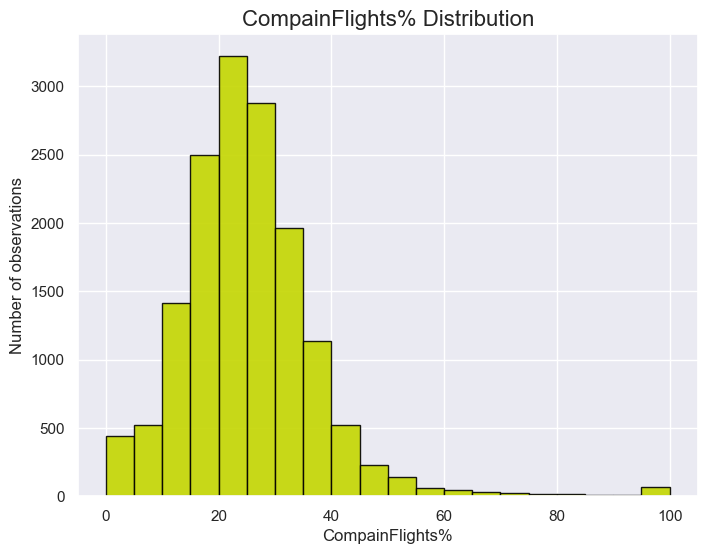

In [3120]:
# Defining the color
hist_color = "#C4D600"

# Creating the graph
plt.figure(figsize=(8, 6))
plt.hist(
    totals["CompainFlights%"], 
    color=hist_color, 
    edgecolor="black", 
    alpha=0.9, 
    bins=20
)
plt.title("CompainFlights% Distribution", fontsize=16)
plt.xlabel("CompainFlights%")
plt.ylabel("Number of observations")
plt.show()

In [3122]:
totals.describe().T

count           mean            std  \
Loyalty#                        15236.0  549586.361578  258605.514233   
NumFlights_Total                15236.0     152.836834      70.699233   
NumFlightsWithCompanions_Total  15236.0      37.226109      20.963296   
PointsAccumulated_Total         15236.0   30552.091335   14208.962385   
PointsRedeemed_Total            15236.0    9237.113757    8598.449080   
CompainFlights%                 15236.0      25.099541      11.961842   

                                     min         25%        50%         75%  \
Loyalty#                        100018.0  327078.250  549490.50  772268.250   
NumFlights_Total                     1.0     107.000     167.00     203.000   
NumFlightsWithCompanions_Total       0.0      22.000      37.00      51.000   
PointsAccumulated_Total             47.0   21417.055   33378.52   40648.485   
PointsRedeemed_Total                 0.0    2549.000    7572.70   14195.150   
CompainFlights%                      0.0      18.000      24.20      30.800   

                                      max  
Loyalty#                        999986.00  
NumFlights_Total                   529.00  
NumFlightsWithCompanions_Total     140.00  
PointsAccumulated_Total         101296.74  
PointsRedeemed_Total             57527.80  
CompainFlights%                    100.00

Seeing the customers that only flight with companion

In [3125]:
totals[totals["CompainFlights%"] == 100]

Loyalty#  NumFlights_Total  NumFlightsWithCompanions_Total  \
37       101768                 6                               6   
342      119690                 4                               4   
430      125606                 2                               2   
963      157902                 8                               8   
1307     178081                 8                               8   
...         ...               ...                             ...   
14751    969719                 5                               5   
14786    971608                10                              10   
14820    973609                 5                               5   
14867    976330                 1                               1   
15231    999891                 1                               1   

       PointsAccumulated_Total  PointsRedeemed_Total  CompainFlights%  
37                     1265.00                   0.0            100.0  
342                    3894.00                   0.0            100.0  
430                    1421.00                   0.0            100.0  
963                    1481.00                4571.0            100.0  
1307                    556.00                4514.0            100.0  
...                        ...                   ...              ...  
14751                  1176.46                8295.4            100.0  
14786                  6416.75                   0.0            100.0  
14820                   736.00                   0.0            100.0  
14867                  2643.00                   0.0            100.0  
15231                  2211.00                3246.0            100.0  

[68 rows x 6 columns]

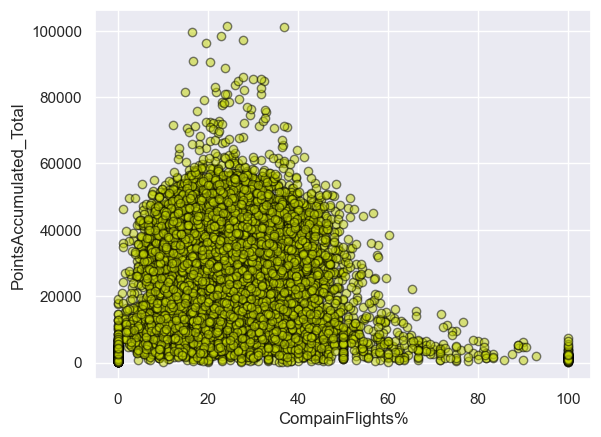

In [3127]:
plt.scatter(totals["CompainFlights%"], totals["PointsAccumulated_Total"], 
            edgecolors="black", 
            alpha=.5, 
            color="#C4D600" 
           )


plt.xlabel("CompainFlights%")
plt.ylabel("PointsAccumulated_Total")

plt.show()

<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **3. Merge** <a id="Flights"></a>   
    
</a>
    
</div>

## **<span style="color:#c3d664;">3.1. Merging</span>**<a id="merging"></a>

In [3131]:
# Merge the totals and customer_df datasets using the 'Loyalty#' variable.
merge_CF = pd.merge(customer_df, totals, on='Loyalty#', how='inner')

In [3133]:
merge_CF.head(1)

Loyalty#        Customer Name Province or State     City   Latitude  \
0    480934  Cecilia Householder           Ontario  Toronto  43.653225   

   Longitude  Gender Education Location Code Marital Status  ...  \
0 -79.383186  female  Bachelor         Urban        Married  ...   

  EnrollmentType  Status MembershipMonths   CLV_log  Income_log  \
0       Standard  Active               34  8.253264   11.158348   

   NumFlights_Total  NumFlightsWithCompanions_Total  PointsAccumulated_Total  \
0               184                              53                 47617.38   

   PointsRedeemed_Total  CompainFlights%  
0               13517.9             28.8  

[1 rows x 22 columns]

Seing the loyalty of individuals in both datasets and with travel records.

In [3136]:
merge_CF.shape

(14923, 22)

### **<span style="color:#c3d664;">3.1.1. Missing Values - Merge</span>**<a id="missing-values-merge"></a>

In [3139]:
merge_CF.isna().sum()

Loyalty#                          0
Customer Name                     0
Province or State                 0
City                              0
Latitude                          0
Longitude                         0
Gender                            0
Education                         0
Location Code                     0
Marital Status                    0
LoyaltyStatus                     0
EnrollmentDateOpening             0
EnrollmentType                    0
Status                            0
MembershipMonths                  0
CLV_log                           0
Income_log                        0
NumFlights_Total                  0
NumFlightsWithCompanions_Total    0
PointsAccumulated_Total           0
PointsRedeemed_Total              0
CompainFlights%                   0
dtype: int64

In [3141]:
merge_CF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14923 entries, 0 to 14922
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Loyalty#                        14923 non-null  int64         
 1   Customer Name                   14923 non-null  object        
 2   Province or State               14923 non-null  object        
 3   City                            14923 non-null  object        
 4   Latitude                        14923 non-null  float64       
 5   Longitude                       14923 non-null  float64       
 6   Gender                          14923 non-null  object        
 7   Education                       14923 non-null  object        
 8   Location Code                   14923 non-null  object        
 9   Marital Status                  14923 non-null  object        
 10  LoyaltyStatus                   14923 non-null  object        
 11  En

### **<span style="color:#c3d664;">3.1.2. Outliers - Merge</span>**<a id="outliers-merge"></a>

In [3144]:
numeric_features = ["Latitude", "Longitude", 
                   "MembershipMonths", "CLV_log", "Income_log", "NumFlights_Total", 
                   "NumFlightsWithCompanions_Total", "PointsAccumulated_Total", 
                   "PointsRedeemed_Total", "CompainFlights%"]

#### **<span style="color:#c3d664;">3.1.2.1. IQR Method</span>**<a id="iqr-method"></a>

In [3147]:
lower_lim = {}
upper_lim = {}

for col in numeric_features:
    Q1 = merge_CF[col].quantile(0.25)
    Q3 = merge_CF[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_lim[col] = Q1 - 1.5 * IQR
    upper_lim[col] = Q3 + 1.5 * IQR


In [3149]:
filters_iqr = []
for col in numeric_features:
    filters_iqr.append(
        merge_CF[col].between(lower_lim[col], upper_lim[col], inclusive="neither")
    )

filters_iqr_all = pd.Series(np.all(filters_iqr, axis=0), index=merge_CF.index)

In [3151]:
df_iqr = merge_CF[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(df_iqr.shape[0] / merge_CF.shape[0], 4)))


Percentage of data kept after removing outliers: 93.13


#### **<span style="color:#c3d664;">3.1.2.2. Manual Method</span>**<a id="manual-method"></a>

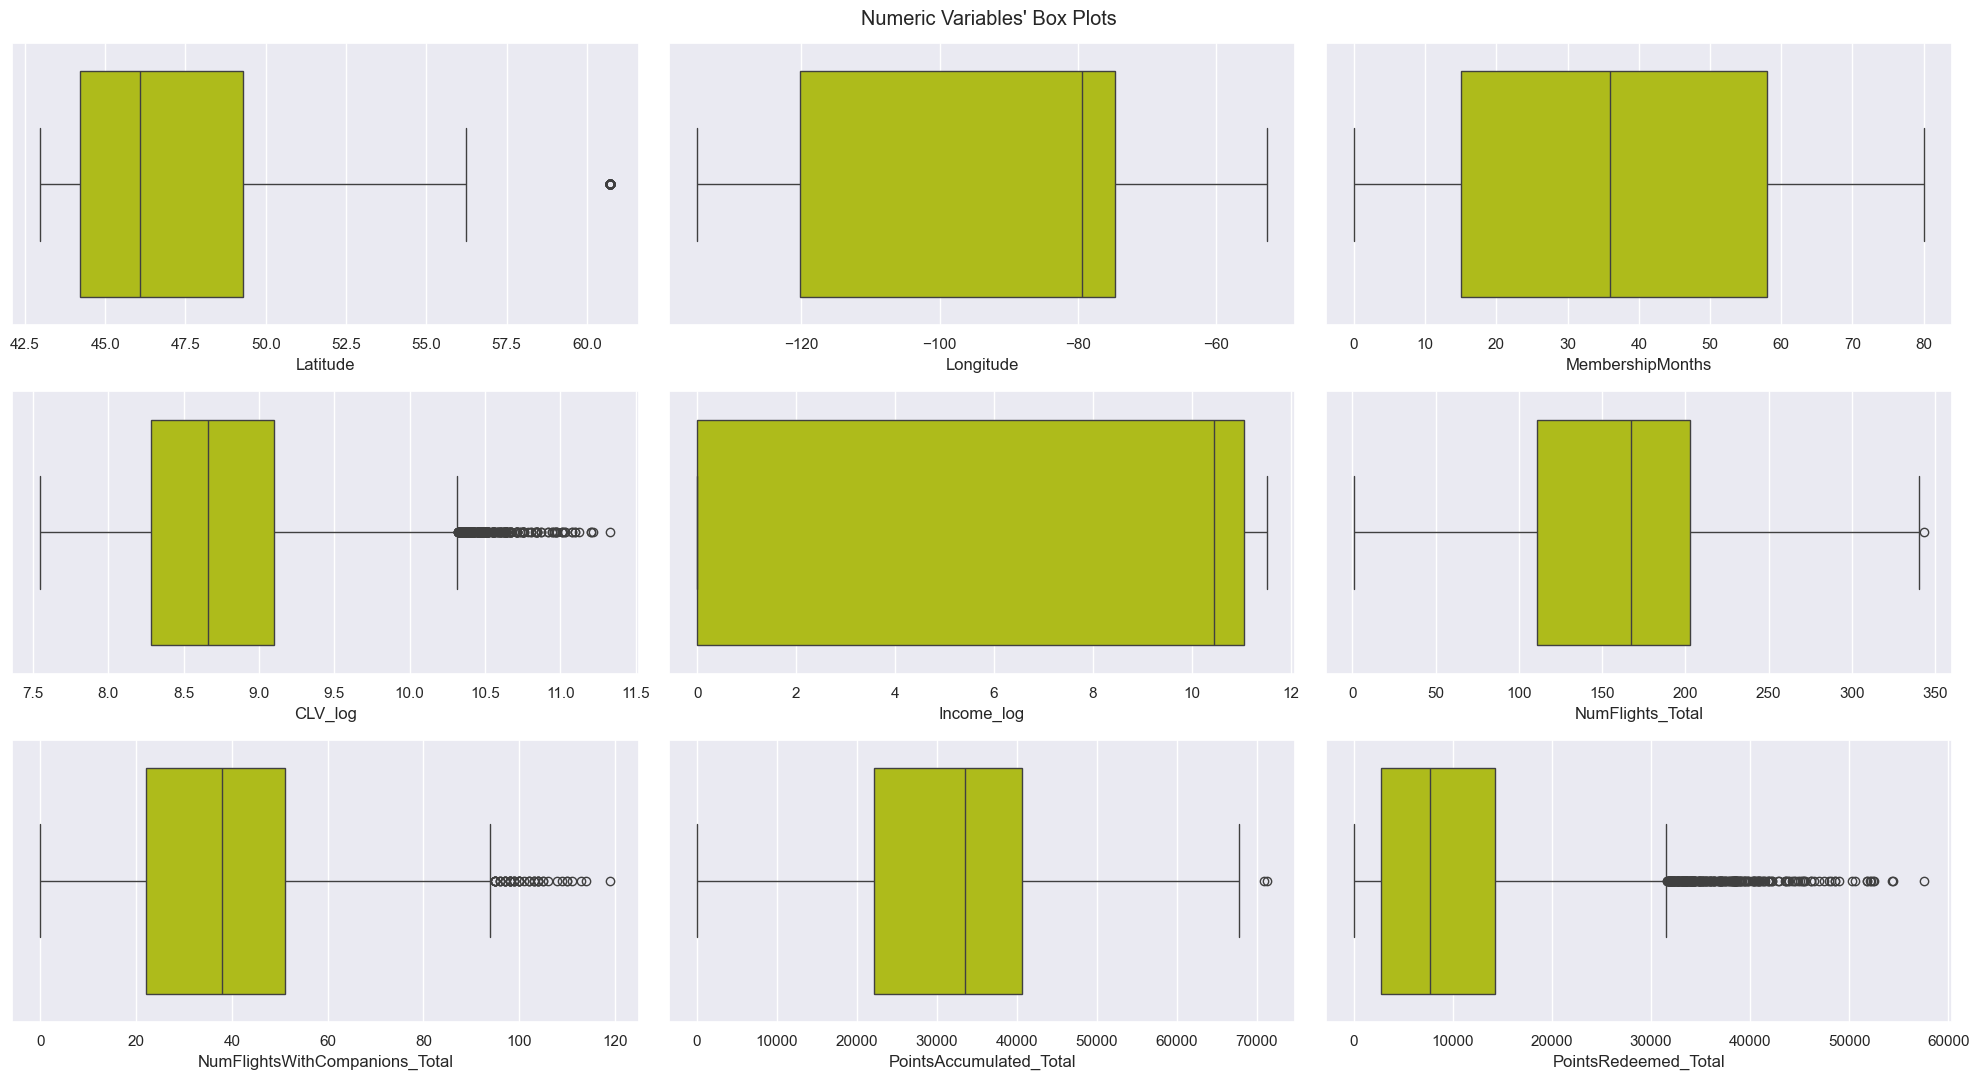

In [3154]:
sns.set()
#sns.set(style="whitegrid")

sp_rows = 3
sp_cols = 3

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(
        x=merge_CF[feat],
        ax=ax,
        color="#C4D600"
    )

title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.show()

In [3156]:
filters = (
    (merge_CF['CLV_log']<=10.6)
    &
    (merge_CF['NumFlightsWithCompanions_Total']<=100)
    &
    (merge_CF['PointsRedeemed_Total']<=40000)
    &
    (merge_CF['CompainFlights%']<=65)
)

merge_CF_f = merge_CF[filters]

In [3158]:
print('Percentage of data kept after removing outliers:', 100*np.round(merge_CF_f.shape[0] / merge_CF.shape[0], 4))

Percentage of data kept after removing outliers: 97.95


#### **<span style="color:#c3d664;">3.1.2.3. Combined Method</span>**<a id="combined-method"></a>

In [3161]:
merge_comb = merge_CF[(filters_iqr_all | filters)] 


print('Percentage of data kept after removing outliers:', 100*np.round(merge_comb.shape[0] / merge_CF.shape[0], 4))

Percentage of data kept after removing outliers: 97.95


#### **<span style="color:#c3d664;">3.1.2.4. Comclusion and Comparison</span>**<a id="conclusion-and-comparison"></a>

It is normal for the manual and combined approaches to retain the same percentage of observations. This happens because all observations that satisfy the manual thresholds are already included within the IQR-based filter. As a result, combining both criteria does not add any new observations, leading to the same proportion of data being kept.

We used the combined approach because it keeps the high retention of the manual method (97.95%) while still leveraging the robust, data-driven nature of the IQR rule. The IQR-only method was more aggressive (93.77% retained), which suggests it may be removing a non-trivial amount of potentially valid observations. By combining both criteria, we avoid over-filtering while still controlling extreme values: any observation that looks reasonable under either the IQR bounds or the manual business thresholds is preserved. In our case, the combined retention matches the manual one (97.95%), meaning the manual thresholds were not stricter than the IQR bounds for the selected variables, but the combined rule still provides a defensible hybrid strategy.

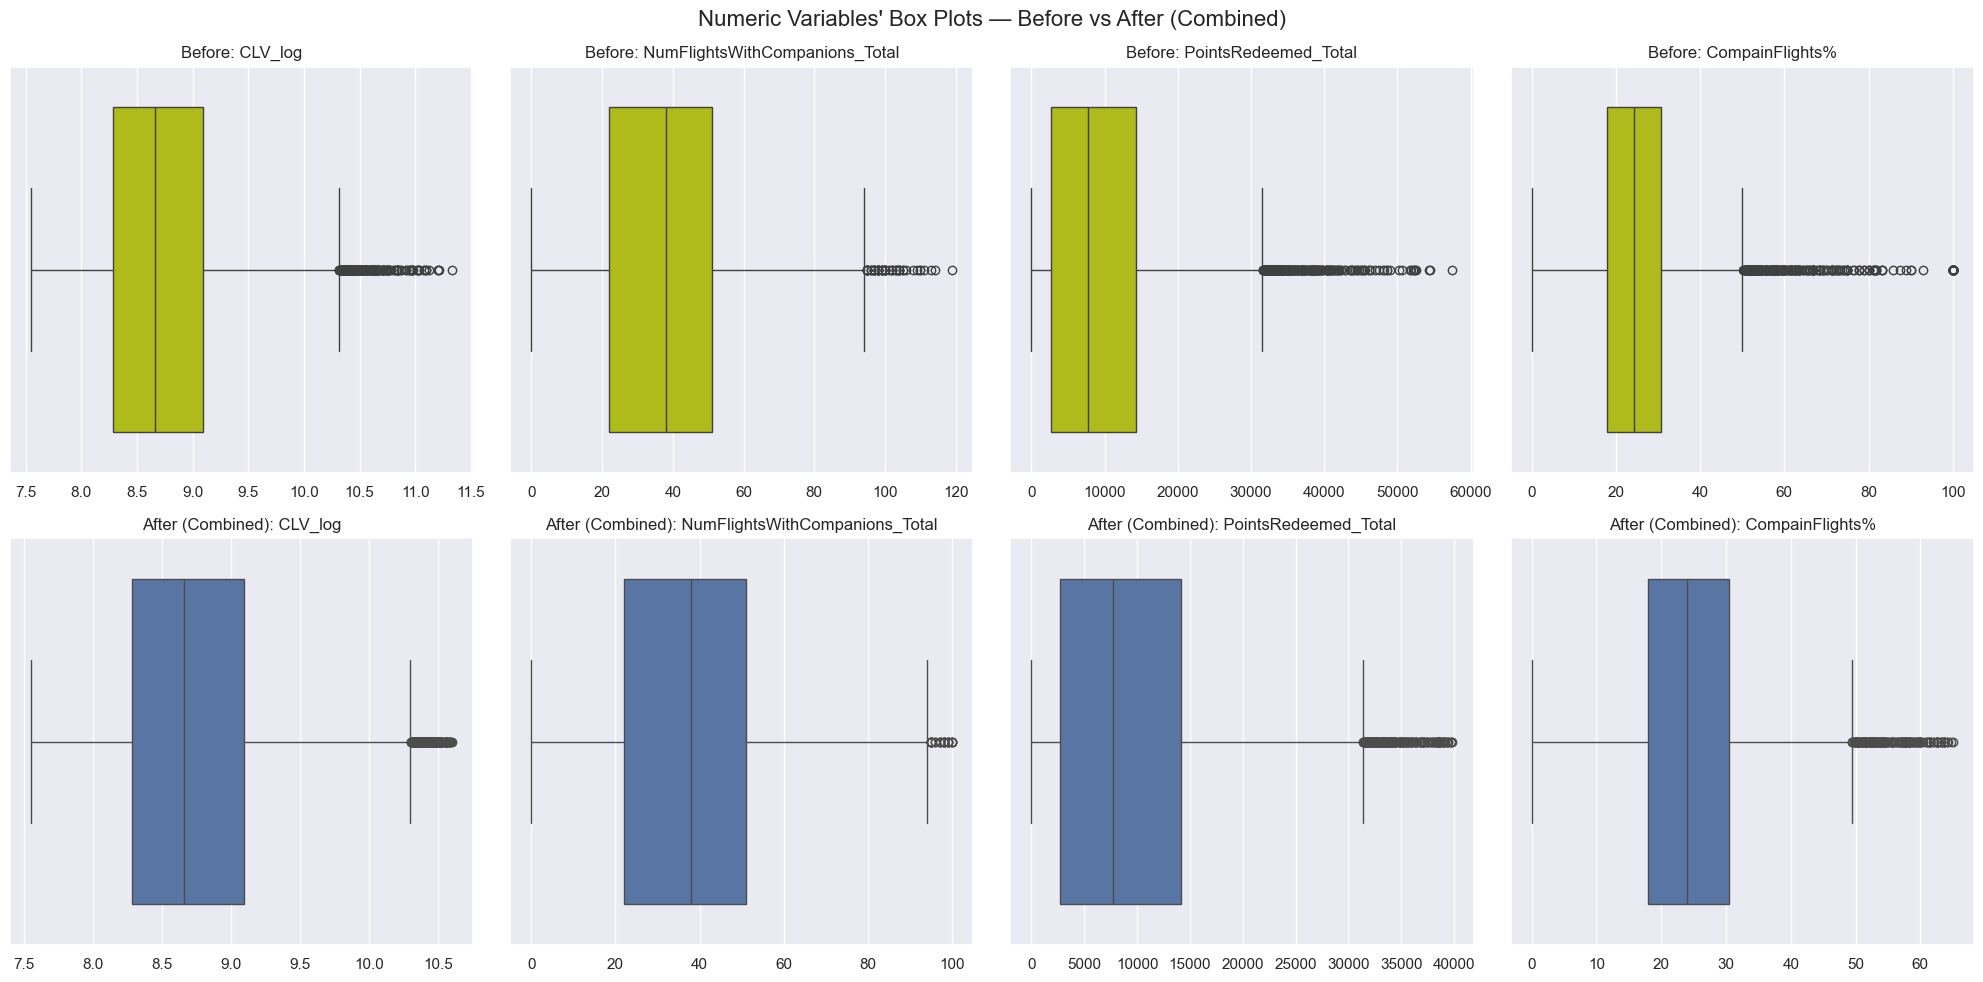

In [3166]:
features_to_plot = [
    'CLV_log',
    'NumFlightsWithCompanions_Total',
    'PointsRedeemed_Total',
    'CompainFlights%'
]

sp_rows = 2   # Before / After
sp_cols = len(features_to_plot)

fig, axes = plt.subplots(
    sp_rows,
    sp_cols,
    figsize=(5 * sp_cols, 10),
    tight_layout=True
)

for j, feat in enumerate(features_to_plot):
    # BEFORE
    sns.boxplot(
        x=merge_CF[feat],
        ax=axes[0, j],
        color="#C4D600"
    )
    axes[0, j].set_title(f"Before: {feat}")
    axes[0, j].set_xlabel("")

    # AFTER (Combined)
    sns.boxplot(
        x=merge_comb[feat],
        ax=axes[1, j],
        color="#4C72B0"
    )
    axes[1, j].set_title(f"After (Combined): {feat}")
    axes[1, j].set_xlabel("")

plt.suptitle("Numeric Variables' Box Plots — Before vs After (Combined)", fontsize=16)
plt.show()

In [3168]:
# Dataset com outliers (registos eliminados)
df_out = merge_CF[~filters]

print('Number of outliers removed:', df_out.shape[0])
print('Percentage of outliers removed:', 100 * np.round(df_out.shape[0] / merge_CF.shape[0], 4))


Number of outliers removed: 306
Percentage of outliers removed: 2.0500000000000003


In [3170]:
merge_CF = merge_CF[filters_iqr_all | filters].copy()

## **<span style="color:#c3d664;">3.2. Feature Selection - Redundancy</span>**<a id="feature-Engineering"></a>

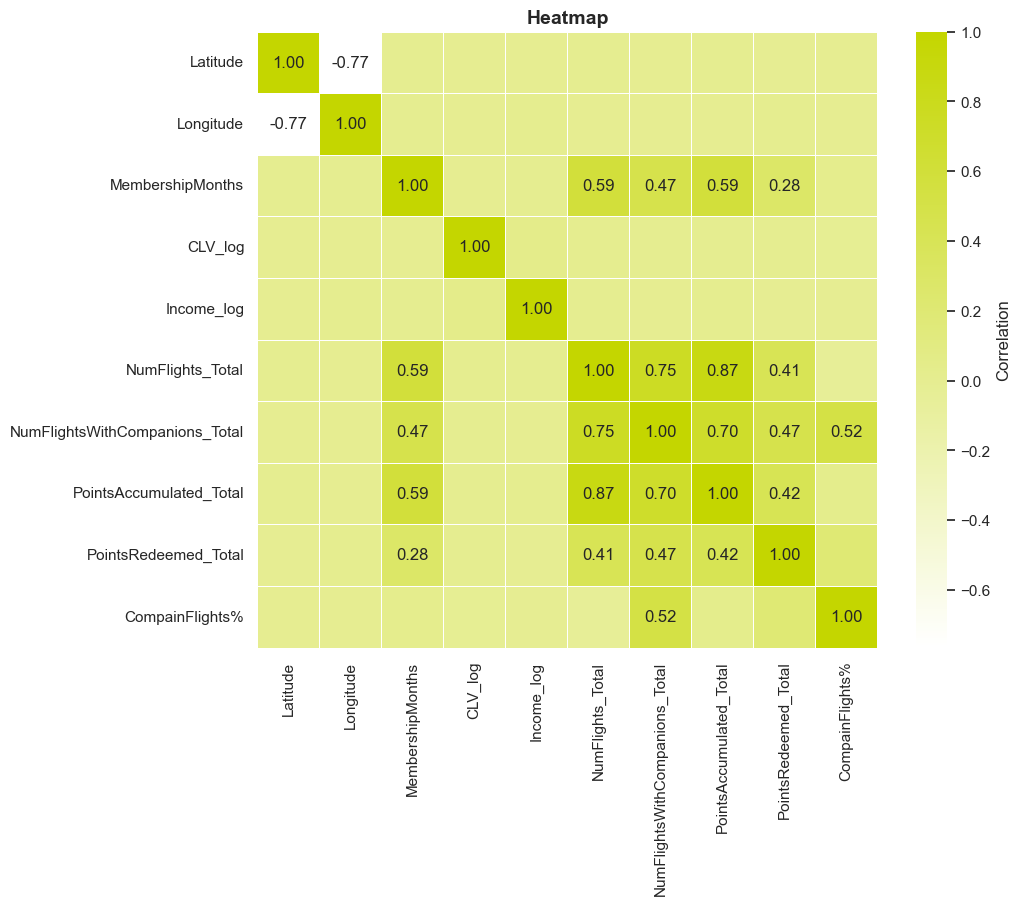

In [3173]:
corr = merge_CF[numeric_features].corr()
mask_annot = corr.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.2 else "")
cmap = mcolors.LinearSegmentedColormap.from_list("custom_green", ["#ffffff", "#C4D600"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=mask_annot,        
    fmt="",                  
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Heatmap", fontsize=14, weight="bold")
plt.show()

## **<span style="color:#c3d664;">3.3. Scaling</span>**<a id="scaling"></a>

In [3176]:
# Copy dataset
df_minmax = merge_CF.copy()

# Initialize scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling only to numeric metric features
df_minmax[numeric_features] = scaler.fit_transform(
    df_minmax[numeric_features]
)

# Check result
df_minmax.head()

Loyalty#        Customer Name Province or State       City  Latitude  \
0    480934  Cecilia Householder           Ontario    Toronto  0.037680   
1    549612          Dayle Menez           Alberta   Edmonton  0.595360   
2    429460        Necole Hannon  British Columbia  Vancouver  0.355081   
3    608370          Queen Hagee           Ontario    Toronto  0.037680   
4    530508       Claire Latting            Quebec       Hull  0.137786   

   Longitude  Gender Education Location Code Marital Status  ...  \
0   0.676108  female  Bachelor         Urban        Married  ...   
1   0.261899    male   College         Rural       Divorced  ...   
2   0.144954    male   College         Urban         Single  ...   
3   0.676108    male   College      Suburban         Single  ...   
4   0.720675    male  Bachelor      Suburban        Married  ...   

   EnrollmentType     Status MembershipMonths   CLV_log  Income_log  \
0        Standard     Active           0.4250  0.230812    0.969217   
1        Standard     Active           0.4125  0.230852    0.000000   
2        Standard  Cancelled           0.5125  0.230864    0.000000   
3        Standard     Active           0.8750  0.230864    0.000000   
4  2021 Promotion     Active           0.6250  0.231123    0.998113   

   NumFlights_Total  NumFlightsWithCompanions_Total  PointsAccumulated_Total  \
0          0.535088                            0.53                 0.667960   
1          0.801170                            0.30                 0.546737   
2          0.336257                            0.37                 0.291539   
3          0.555556                            0.55                 0.521832   
4          0.485380                            0.59                 0.482316   

   PointsRedeemed_Total  CompainFlights%  
0              0.339150         0.443077  
1              0.563442         0.167692  
2              0.137477         0.490769  
3              0.409740         0.443077  
4              0.000000         0.543077  

[5 rows x 22 columns]

In [3178]:
merge_CF.to_csv("merge_CF.csv", index=False)

In [3182]:
#MULTIVARIATE OUTLIERS W DBSCAN

In [3184]:
#numeric_features = df_minmax.select_dtypes(include=['int64', 'float64']).columns
#df_numeric_scaled = df_minmax[numeric_features]

# DBSCAN para detetar outliers
#dbscan = DBSCAN(eps=0.8, min_samples=10)
#labels_db = dbscan.fit_predict(df_numeric_scaled)

# Percentagem de outliers multivariados
#outlier_pct = (labels_db == -1).mean() * 100
#print(f"Multivariate outliers (DBSCAN): {outlier_pct:.2f}%")

<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **4. Perspectives** <a id="Flights"></a>   
    
</a>
    
</div>

In [3187]:
df_minmax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14617 entries, 0 to 14900
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Loyalty#                        14617 non-null  int64         
 1   Customer Name                   14617 non-null  object        
 2   Province or State               14617 non-null  object        
 3   City                            14617 non-null  object        
 4   Latitude                        14617 non-null  float64       
 5   Longitude                       14617 non-null  float64       
 6   Gender                          14617 non-null  object        
 7   Education                       14617 non-null  object        
 8   Location Code                   14617 non-null  object        
 9   Marital Status                  14617 non-null  object        
 10  LoyaltyStatus                   14617 non-null  object        
 11  Enrollm

## **<span style="color:#c3d664;">4.1. Value Based Perspective</span>**<a id="value-based-perspective"></a>

It uses variables that measure "how much the service is worth / how much it uses".

In [3191]:
X_value = df_minmax[[
    'CLV_log',           # Customer Lifetime Value (log) 
    'Income_log',        # Income (log) 
    'PointsAccumulated_Total',  
    'MembershipMonths'   
]].copy()

X_value.head()

CLV_log  Income_log  PointsAccumulated_Total  MembershipMonths
0  0.230812    0.969217                 0.667960            0.4250
1  0.230852    0.000000                 0.546737            0.4125
2  0.230864    0.000000                 0.291539            0.5125
3  0.230864    0.000000                 0.521832            0.8750
4  0.231123    0.998113                 0.482316            0.6250

### **<span style="color:#c3d664;">4.1.1. Exploration of the number of clusters (K)</span>**<a id="exploration-of-the-number-of-clusters-(k)"></a>

The goal of this step is to explore the intrinsic cluster structure of the value-based feature space in order to identify a plausible range for the number of clusters (K). This analysis is exploratory and aims to support, rather than determine in isolation, the final clustering decisions.

#### **<span style="color:#c3d664;">4.1.1.1. K-Means</span>**<a id="k-means"></a>

**Metrics used:**
- Elbow (Inertia) → Compactness
- Silhouette Score → Separation

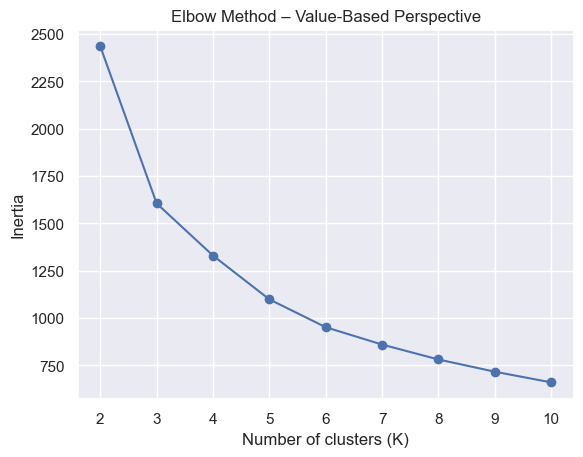

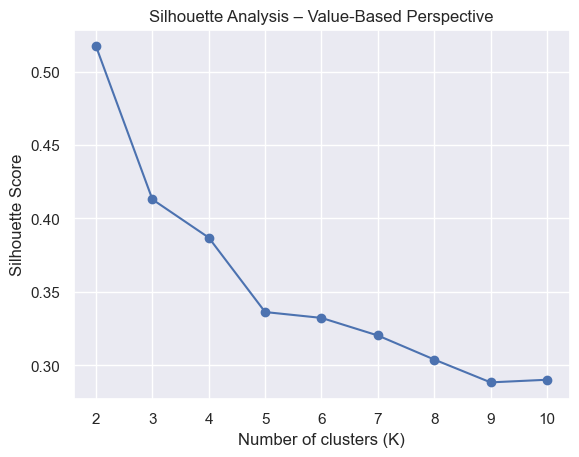

In [3197]:
# Range of K values to test
k_range = range(2, 11)

inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_value)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_value, labels))

# Plot Elbow Method
plt.figure()
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method – Value-Based Perspective")
plt.show()

# Plot Silhouette Scores
plt.figure()
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis – Value-Based Perspective")
plt.show()

Can be: 2, 3 e 5 clusters. 

#### **<span style="color:#c3d664;">4.1.1.2. Hierarchical (Ward)</span>**<a id="hierarchical-(ward)"></a>

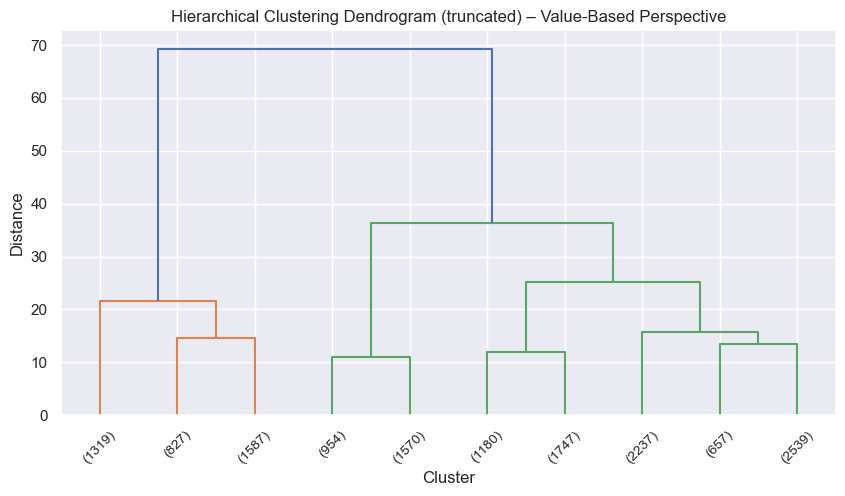

In [3200]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering using Ward linkage
Z = linkage(X_value, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=45.,
    leaf_font_size=10.
)
plt.title("Hierarchical Clustering Dendrogram (truncated) – Value-Based Perspective")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()

Hierarchical clustering suggests a natural separation around K = 3

The combination of inertia reduction, silhouette scores, and hierarchical structure suggests that the value-based perspective exhibits meaningful segmentation within a limited range of cluster solutions. Based on this exploratory analysis, subsequent clustering will focus on a small set of plausible K values for further validation and interpretation.

### **<span style="color:#c3d664;">4.1.2. Metrics Analysis</span>**<a id="metrics-analysis"></a>

#### **<span style="color:#c3d664;">4.1.2.1. K-Means (K=2,3,5)</span>**<a id="k-means"></a>

In [3205]:
k_values = [2, 3, 5]
results = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    
    labels = kmeans.fit_predict(X_value)
    
    results.append({
        'K': k,
        'Silhouette': silhouette_score(X_value, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_value, labels),
        'Davies-Bouldin': davies_bouldin_score(X_value, labels)
    })

kmeans_results_df = pd.DataFrame(results)
kmeans_results_df

K  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  2    0.517127       14414.796162        0.819250
1  3    0.412911       14707.448558        0.905142
2  5    0.336207       12429.450015        1.105215

#### **<span style="color:#c3d664;">4.1.2.2. Hierarchical (K=2,3,5)</span>**<a id="hierarchical-(k=2,3,5)"></a>

As shown in the linkage comparison, Ward linkage consistently explains the highest proportion of variance across different numbers of clusters, demonstrating its ability to form compact and well-separated clusters. Complete and Average linkages perform slightly worse, while Single linkage shows poor cluster quality.

In this sense, hierarchical clustering was performed using Ward's linkage, as it minimizes variance within the cluster and produces compact and interpretable clusters, making it directly comparable to K-means for value-based segmentation.

In [3209]:
results = []

for k in [2, 3, 5]:
    hierarchical = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )
    
    labels_hier = hierarchical.fit_predict(X_value)
    
    results.append({
        'Method': 'Hierarchical (Ward)',
        'K': k,
        'Silhouette': silhouette_score(X_value, labels_hier),
        'Calinski-Harabasz': calinski_harabasz_score(X_value, labels_hier),
        'Davies-Bouldin': davies_bouldin_score(X_value, labels_hier)
    })

hierarchical_results = pd.DataFrame(results)
hierarchical_results

Method  K  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  Hierarchical (Ward)  2    0.517127       14414.796162        0.819250
1  Hierarchical (Ward)  3    0.391995       12637.808093        0.864810
2  Hierarchical (Ward)  5    0.287142       10852.841428        1.140061

#### **<span style="color:#c3d664;">4.1.2.3. K-Means VS Hierarquical</span>**<a id="k-means-vs-hierarquical"></a>

**K = 2**

Both methods produce very similar results:

High Silhouette score (≈ 0.50) → excellent cluster separation

Clusters are compact and stable

**Limitation:**

The segmentation is overly coarse

It mainly distinguishes low-value vs. high-value customers, offering limited granularity for differentiated marketing actions

**K = 3**

- K-Means

Highest Calinski–Harabasz value (≈ 14,707) → strong global separation
Silhouette score remains acceptable (≈ 0.41)
Clusters are well balanced and easy to interpret

- Hierarchical

Slightly lower Silhouette score
Weaker global separation
Clusters are less distinct in terms of economic value

- Clear advantage of K-Means for this value of K

**K = 5**

Both methods show:

A significant decrease in the Silhouette score
An increase in the Davies–Bouldin index
Clear signs of over-segmentation

As a result, clusters become:
Small
Redundant
Difficult to interpret

Not recommended for this perspective

**Which method performs better?**


K-Means maintains a more consistent behavior as K increases

Hierarchical clustering degrades more rapidly


**Interpretability**

K-Means (K = 3) produces:

Progressive value-based segments
Clear differences in CLV, Income, and Points-related variables
Hierarchical clustering tends to generate less balanced clusters


**Overall metrics**

K-Means outperforms Hierarchical in:

Calinski–Harabasz index
Silhouette score (except for the tie at K = 2)

**Business Interpretation (K-Means, K = 3)**
Low-value customers → activation-focused strategies
Mid-value customers → growth and upselling potential
High-value loyal customers → retention and premium benefits



In [3213]:
def cluster_profiling(X, labels):
    """
    Generates cluster profiles including mean values and cluster sizes.
    
    Parameters:
    X (DataFrame): Feature dataset used for clustering
    labels (array-like): Cluster labels
    
    Returns:
    DataFrame: Cluster profiling table
    """
    profile = X.copy()
    profile['Cluster'] = labels
    
    summary = profile.groupby('Cluster').agg(['mean', 'count'])
    
    cluster_sizes = profile['Cluster'].value_counts().sort_index()
    cluster_percentages = (cluster_sizes / len(profile)) * 100
    
    summary['Cluster_Size'] = cluster_sizes
    summary['Cluster_%'] = cluster_percentages.round(2)
    
    return summary

#### **<span style="color:#c3d664;">4.1.3.1. Profiling for K-Means</span>**<a id="profiling-for-k-means"></a>

In [3220]:
kmeans_final = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

labels_kmeans = kmeans_final.fit_predict(X_value)

profile_kmeans = cluster_profiling(X_value, labels_kmeans)
profile_kmeans

CLV_log       Income_log       PointsAccumulated_Total        \
             mean count       mean count                    mean count   
Cluster                                                                  
0        0.391794  6079   0.929371  6079                0.535386  6079   
1        0.371703  3733   0.000000  3733                0.429906  3733   
2        0.394293  4805   0.928942  4805                0.303787  4805   

        MembershipMonths       Cluster_Size Cluster_%  
                    mean count                         
Cluster                                                
0               0.694500  6079         6079     41.59  
1               0.466779  3733         3733     25.54  
2               0.189095  4805         4805     32.87

**Cluster 0 — “High-Value, Highly Engaged Loyalists”**

41.59% of the customer base

**Profile:**
High income
Highest accumulation and redemption of loyalty points
Longest membership duration
Consistent and high CLV

**Business interpretation:**

This is the most valuable and strategic segment.
Customers are highly engaged, exhibit consistent behavior, and generate strong long-term returns.

**Recommended actions:**

Premium loyalty programs
Exclusive benefits
Proactive retention strategies


**Cluster 1 — “Low Income, Long-Term Loyal Members”**

25.5% of the customer base

**Profile:**

Lower income
Medium CLV
Long tenure in the loyalty program
Moderate engagement with points

**Business interpretation:**

These customers demonstrate long-term loyalty but have limited purchasing power.
Their strategic value lies more in stability and retention than in high spending.

**Recommended actions:**

Low-cost retention strategies
Symbolic benefits (status, recognition)
Frequent and personalized communication


**Cluster 2 — “Moderate Value, Affluent but Low Engagement”**

32.87% of the customer base

**Profile:**

High income (high Income_log)
Medium CLV
Low accumulation and redemption of points
Relatively short membership duration

**Business interpretation:**

These customers have strong financial capacity but remain weakly engaged with the loyalty program.
They represent a clear activation opportunity, as their value potential is not yet fully exploited.

**Recommended actions:**

Onboarding campaigns and early incentives
Offers designed to stimulate points usage and engagement

#### **<span style="color:#c3d664;">4.1.3.2. Profiling for Hierarchical</span>**<a id="profiling-for-hierachical"></a>

In [3224]:
# Hierarchical final (exemplo com k = 3)
hierarchical_final = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

labels_hier = hierarchical_final.fit_predict(X_value)

profile_hierarchical = cluster_profiling(X_value, labels_hier)
profile_hierarchical

CLV_log       Income_log       PointsAccumulated_Total        \
             mean count       mean count                    mean count   
Cluster                                                                  
0        0.384689  8360   0.928822  8360                0.516574  8360   
1        0.371703  3733   0.000000  3733                0.429906  3733   
2        0.420084  2524   0.930371  2524                0.156795  2524   

        MembershipMonths       Cluster_Size Cluster_%  
                    mean count                         
Cluster                                                
0               0.577962  8360         8360     57.19  
1               0.466779  3733         3733     25.54  
2               0.118344  2524         2524     17.27

**Cluster 0 — “Mainstream Engaged Customers”**

57.19 of the customer base

**Profile:**
High income
High engagement with loyalty points
Long membership duration
Medium CLV

**Business interpretation:**

This segment is overly broad, aggregating customers with heterogeneous behaviors.
Despite representing the majority of the customer base, it offers limited strategic differentiation.

**Risk:**

Limits the effectiveness of targeted campaigns
Mixes customers with substantially different value profiles


**Cluster 1 — “Low Income, Stable Members”**

25.5% of the customer base

**Profile:**

Identical to Cluster 1 in the K-Means solution
Well-defined and stable customer profile

**Business interpretation:**

This segment is clearly identified but does not represent a distinctive advantage of the hierarchical approach, as it also emerges under K-Means.


**Cluster 2 — “High Income, Low Engagement Newcomers”**

17.27% of the customer base

**Profile:**

Higher average CLV
High income
Low engagement with the loyalty program
Shorter membership duration

**Business interpretation:**

These customers are financially valuable but still at an early stage of their relationship with the brand.
They represent future potential, although they do not yet generate full returns.

**K-Means produces:**

More balanced clusters
Progressive value-based profiles
Marketing-actionable segments

**Hierarchical clustering:**

Concentrates excessive value into a single cluster
Reduces strategic granularity

**Final decision**

K-Means clustering with k = 3 was selected as the final solution for the value-based perspective, as it provides clearer differentiation between customer value levels and generates more actionable business segments.

Business translation (one-liner):
Value-based segmentation identifies high-value customers to retain, customers with growth potential to activate, and loyal low-cost customers to maintain.

## **<span style="color:#c3d664;">4.2. Behavior Perspective</span>**<a id="behavior-perspective"></a>

Here the focus is on: whether the passenger is active or not, short or long flights, and the tendency to travel accompanied.

In [3228]:
X_behavior = df_minmax[[
    'NumFlights_Total',                 
    'NumFlightsWithCompanions_Total',  
    'CompainFlights%',                 
    'PointsRedeemed_Total'            
]].copy()

X_behavior.head()

NumFlights_Total  NumFlightsWithCompanions_Total  CompainFlights%  \
0          0.535088                            0.53         0.443077   
1          0.801170                            0.30         0.167692   
2          0.336257                            0.37         0.490769   
3          0.555556                            0.55         0.443077   
4          0.485380                            0.59         0.543077   

   PointsRedeemed_Total  
0              0.339150  
1              0.563442  
2              0.137477  
3              0.409740  
4              0.000000

### **<span style="color:#c3d664;">4.2.1. Exploration of the number of clusters (K)</span>**<a id="exploration-of-the-number-of-clusters-(k)"></a>

The goal of this step is to explore the intrinsic cluster structure of the value-based feature space in order to identify a plausible range for the number of clusters (K). This analysis is exploratory and aims to support, rather than determine in isolation, the final clustering decisions.

#### **<span style="color:#c3d664;">4.2.1.1. K-Means</span>**<a id="k-means"></a>

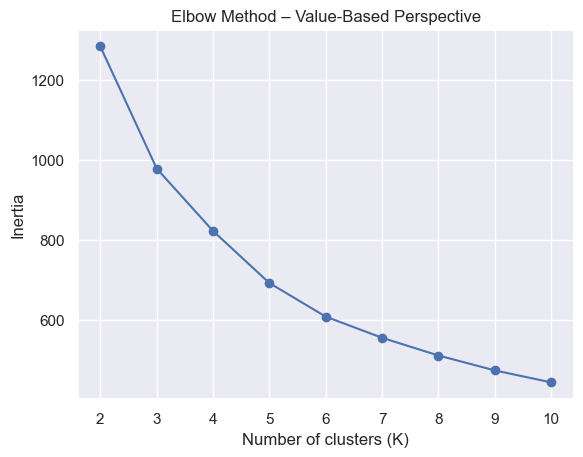

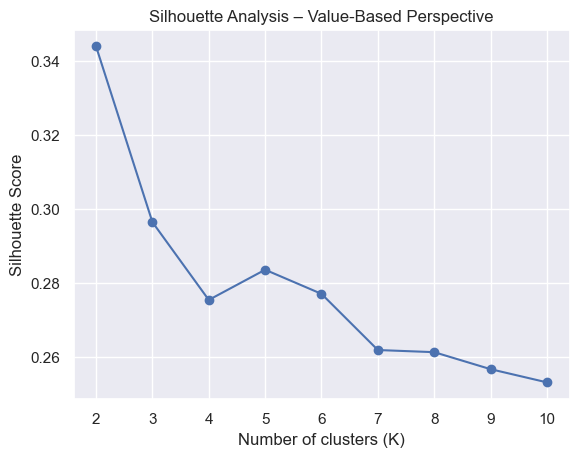

In [3233]:
# Range of K values to test
k_range = range(2, 11)

inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_behavior)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_behavior, labels))

# Plot Elbow Method
plt.figure()
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method – Value-Based Perspective")
plt.show()

# Plot Silhouette Scores
plt.figure()
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis – Value-Based Perspective")
plt.show()

can be: 2 and 3

#### **<span style="color:#c3d664;">4.2.1.2. Hierarchical (Ward)</span>**<a id="hierarchical-(ward)"></a>

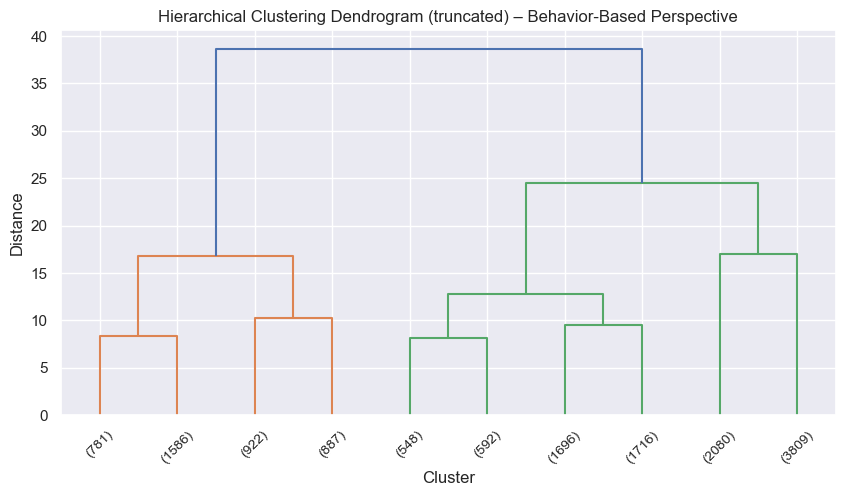

In [3239]:
# Hierarchical clustering using Ward linkage
Z = linkage(X_behavior, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=45.,
    leaf_font_size=10.
)
plt.title("Hierarchical Clustering Dendrogram (truncated) – Behavior-Based Perspective")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()

Can be 3.

### **<span style="color:#c3d664;">4.2.2. Metrics Analysis</span>**<a id="metrics-analysis"></a>

#### **<span style="color:#c3d664;">4.2.2.1. K-Means (K=2,3)</span>**<a id="k-means-(k=2,3)"></a>

In [3245]:
k_values = [2, 3]
results = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        random_state=42
    )
    
    labels = kmeans.fit_predict(X_behavior)
    
    results.append({
        'K': k,
        'Silhouette': silhouette_score(X_behavior, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_behavior, labels),
        'Davies-Bouldin': davies_bouldin_score(X_behavior, labels)
    })

kmeans_results_df = pd.DataFrame(results)
kmeans_results_df

K  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  2    0.343947        9643.991632         1.11075
1  3    0.296432        8609.394160         1.19670

#### **<span style="color:#c3d664;">4.2.2.2. Hierarchical (K=2,3)</span>**<a id="hierarchical-(k=2,3)"></a>

In [3247]:
results = []

for k in [2, 3]:
    hierarchical = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )
    
    labels_hier = hierarchical.fit_predict(X_behavior)
    
    results.append({
        'Method': 'Hierarchical (Ward)',
        'K': k,
        'Silhouette': silhouette_score(X_behavior, labels_hier),
        'Calinski-Harabasz': calinski_harabasz_score(X_behavior, labels_hier),
        'Davies-Bouldin': davies_bouldin_score(X_behavior, labels_hier)
    })

hierarchical_results = pd.DataFrame(results)
hierarchical_results

Method  K  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  Hierarchical (Ward)  2    0.340572        7899.760674        1.113512
1  Hierarchical (Ward)  3    0.244684        7078.515890        1.328989

#### **<span style="color:#c3d664;">4.2.2.3. K-Means VS Hierarquical</span>**<a id="k-means-vs-hierarquical"></a>

**K-Means (K = 2)**

Silhouette: 0.3439
Calinski–Harabasz: 9643.99
Davies–Bouldin: 1.1107

**Hierarchical Ward (K = 2)**

Silhouette: 0.3405
Calinski–Harabasz: 7899.76
Davies–Bouldin: 1.1135

**Comparison**

K-Means outperforms in Silhouette (slightly higher) and Calinski–Harabasz (significantly higher), indicating better global separation and more structured clusters.

Hierarchical clustering performs better in terms of Davies–Bouldin, suggesting slightly more compact clusters on average.

Overall, K-Means is preferred for K = 2, as it dominates the two most commonly used metrics for global cluster separation (Silhouette and Calinski–Harabasz), while still maintaining an acceptable Davies–Bouldin value.

**K-Means (K = 3)**

Silhouette: 0.2964
Calinski–Harabasz: 8609.394160
Davies–Bouldin: 1.1967

**Hierarchical Ward (K = 3)**

Silhouette: 0.2446
Calinski–Harabasz: 7078.515890
Davies–Bouldin: 1.3289

**Comparison**

For K = 3, K-Means clearly outperforms Hierarchical clustering across all three metrics, achieving a higher Silhouette score, a higher Calinski–Harabasz index, and a lower Davies–Bouldin index.

Best method for K = 3: K-Means (unambiguous superiority).

**Final Conclusion:**
The **k-means** method is better for both possible values of k. Between k = 2 and k = 3, k-means for **k = 2** is significantly better across all three metrics evaluated, as we can see.

In [2414]:
kmeans_final = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    random_state=42
)

labels_kmeans = kmeans_final.fit_predict(X_behavior)

profile_kmeans = cluster_profiling(X_behavior, labels_kmeans)
profile_kmeans

NumFlights_Total       NumFlightsWithCompanions_Total        \
                    mean count                           mean count   
Cluster                                                               
0               0.562415  8810                       0.498035  8810   
1               0.275293  5807                       0.185118  5807   

        CompainFlights%       PointsRedeemed_Total       Cluster_Size  \
                   mean count                 mean count                
Cluster                                                                 
0              0.406263  8810             0.323695  8810         8810   
1              0.328482  5807             0.088164  5807         5807   

        Cluster_%  
                   
Cluster            
0           60.27  
1           39.73

**Cluster 0 — “High Activity and High Redemption Users”**

- 60.27% of the base (n = 8,810)

**Profile (compared to Cluster 1):**
- More total flights (NumFlights_Total: 0.562 vs 0.275)
- More flights with companions (NumFlightsWithCompanions_Total: 0.498 vs 0.185)
- Higher % of flights with companions (CompainFlights%: 0.406 vs 0.328)
- Redeems significantly more points (PointsRedeemed_Total: 0.324 vs 0.088)

**Business Interpretation:**
This is the most active and engaged segment with the program. Besides flying more, they effectively use the benefits, indicating high engagement and a greater chance of retention.

**Suggested Action:**

- Loyalty/premium programs and exclusive benefits
- Incentives for upselling/cross-selling (e.g., upgrades, partnerships, bundles)
- Proactive retention strategies (avoid churn of "best" customers)

**Cluster 1 — "Low Activity and Low Redemption Users"**

- 39.73% of the base (n = 5,807)

**Profile:**
- Fewer flights (NumFlights_Total: 0.275)
- Few flights with companions (0.185)
- Lower % of companions (0.328)

- Hardly redeems points (0.088)

**Business Interpretation:**
Segment with low engagement: travels less and is not capturing value from the program (low use of points). This may include occasional customers, those poorly informed about benefits, or those with low motivation to use the rewards system.

**Suggested action:**
- Activation and education campaigns (“how to use points”, clear benefits)
- Simple short-term incentives (e.g., bonus points on the next flight, targeted discounts)
- Personalized communication to increase frequency and first redemption (first “win” in the program)

In [2417]:
# Hierarchical final (exemplo com k = 2)
hierarchical_final = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

labels_hier = hierarchical_final.fit_predict(X_behavior)

profile_hierarchical = cluster_profiling(X_behavior, labels_hier)
profile_hierarchical

NumFlights_Total        NumFlightsWithCompanions_Total         \
                    mean  count                           mean  count   
Cluster                                                                 
0               0.550609  10441                       0.460572  10441   
1               0.192672   4176                       0.156571   4176   

        CompainFlights%        PointsRedeemed_Total        Cluster_Size  \
                   mean  count                 mean  count                
Cluster                                                                   
0              0.379789  10441             0.279371  10441        10441   
1              0.364294   4176             0.106993   4176         4176   

        Cluster_%  
                   
Cluster            
0           71.43  
1           28.57

**Cluster 0 — “High Activity and High Redemption Users”**

71.43% of the base (n = 10,441)

**Profile (compared to Cluster 1):**

More total flights (NumFlights_Total: 0.55 vs 0.192)
More flights with companions (NumFlightsWithCompanions_Total: 0.461 vs 0.157)
Higher % of flights with companions (CompainFlights%: 0.380 vs 0.364)
Redeems more points (PointsRedeemed_Total: 0.279 vs 0.107)

**Business interpretation:**
Dominant and clearly more active segment: travels more, often accompanied, and uses the points program frequently. Represents the program's "engaged base" — customers with consistent behavior and a higher probability of retention.

**Suggested Action:**
Premium retention strategies and exclusive benefits
Encourage upselling (e.g., upgrades, packages, lounge access, partners)
Rewards for frequency and "group travel" (companions)


**Cluster 1 — "Low Activity and Low Redemption Users"**

28.57% of the base (n = 4,176)

**Profile:**
Fewer flights (NumFlights_Total: 0.193)
Few flights with companions (0.157)
Slightly lower percentage of companions (0.364)
Low point redemption (0.107)

**Business Interpretation:**
Low-engagement customers: travel less and have limited use of the points program. They may be occasional customers or customers who do not yet perceive/value the benefit of the program.

**Suggested action:**
Activation campaigns (incentive for first redemption)
Simple communication about benefits and "how to use points"
Short-term offers to increase frequency (bonus/discount on the next flight)

**Conclusion**

Both models produce consistent and interpretable segments, with the same business logic (“high engagement” x “low engagement”). However, K-Means tends to generate a more balanced and differentiated separation between the groups, while Hierarchical (Ward) groups more observations in the “High Activity” cluster, reducing the size of the “Low Activity” segment.

Recommended final conclusion: K-Means (k = 2) is the best choice for this case because it maintains clear profiles, creates a more informative division of the database, and (based on the metrics you showed earlier) also presents better overall performance.

<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **5. Merge of two perspectives** <a id="Flights"></a>   
    
</a>
    
</div>

In [3255]:
kmeans_behavior = KMeans(
    n_clusters=2,
    init="k-means++",
    n_init=10,
    random_state=42
)

df_minmax["behavior_cluster"] = kmeans_behavior.fit_predict(X_behavior)
df_minmax["behavior_cluster"].value_counts()

behavior_cluster
0    8810
1    5807
Name: count, dtype: int64

In [3257]:
kmeans_value = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=10,
    random_state=42
)

df_minmax["value_cluster"] = kmeans_value.fit_predict(X_value)
df_minmax["value_cluster"].value_counts()

value_cluster
0    6079
2    4805
1    3733
Name: count, dtype: int64

In [3259]:
df_minmax[["behavior_cluster", "value_cluster"]].head()

behavior_cluster  value_cluster
0                 0              0
1                 0              1
2                 1              1
3                 0              1
4                 0              0

In [3261]:
df_minmax["behavior_cluster"].nunique(), df_minmax["value_cluster"].nunique()

(2, 3)

In [3263]:
crosstab = pd.crosstab(df_minmax["behavior_cluster"], df_minmax["value_cluster"])
crosstab

value_cluster        0     1     2
behavior_cluster                  
0                 4925  2238  1647
1                 1154  1495  3158

In [3265]:
metric_features = [
    # value
    'CLV_log',           # Customer Lifetime Value (log) → Valor económico
    'Income_log',        # Renda (log) → Potencial de gasto
    'PointsAccumulated_Total',  # Total de pontos acumulados → Engajamento
    'MembershipMonths',  # Tempo como membro → Longevidade
    # behavior
    'NumFlights_Total',                 # Volume total de voos → Frequência
    'NumFlightsWithCompanions_Total',   # Voos com acompanhantes → Social/negócios   ----VER
    'CompainFlights%',                  # % de voos com acompanhantes → Padrão de viagem     
    'PointsRedeemed_Total' 
]


In [3267]:
df_centroids = df_minmax.groupby(
    ["behavior_cluster", "value_cluster"]
)[metric_features].mean()

print("Centroids shape:", df_centroids.shape)
df_centroids.head()


Centroids shape: (6, 8)


CLV_log  Income_log  PointsAccumulated_Total  \
behavior_cluster value_cluster                                                  
0                0              0.390916    0.929222                 0.553580   
                 1              0.376744    0.000000                 0.530990   
                 2              0.397878    0.927686                 0.482672   
1                0              0.395539    0.930005                 0.457741   
                 1              0.364157    0.000000                 0.278585   

                                MembershipMonths  NumFlights_Total  \
behavior_cluster value_cluster                                       
0                0                      0.690431          0.573967   
                 1                      0.575793          0.562612   
                 2                      0.263153          0.527603   
1                0                      0.711861          0.444612   
                 1                      0.303587          0.276503   

                                NumFlightsWithCompanions_Total  \
behavior_cluster value_cluster                                   
0                0                                    0.502969   
                 1                                    0.500581   
                 2                                    0.479824   
1                0                                    0.260104   
                 1                                    0.185679   

                                CompainFlights%  PointsRedeemed_Total  
behavior_cluster value_cluster                                         
0                0                     0.400529              0.321216  
                 1                     0.409086              0.330454  
                 2                     0.419571              0.321924  
1                0                     0.276205              0.102325  
                 1                     0.331971              0.087686

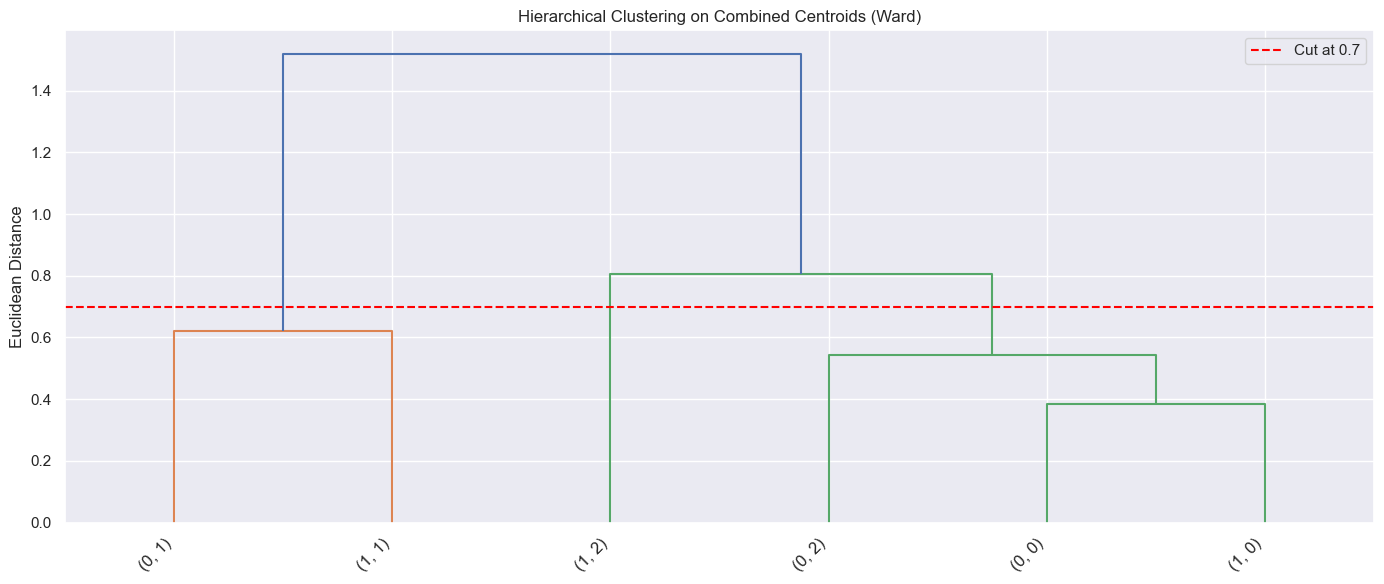

In [3269]:
hclust = AgglomerativeClustering(
    linkage="ward",
    metric="euclidean",
    distance_threshold=0,
    n_clusters=None
)
hclust.fit(df_centroids)

counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, labels=df_centroids.index.tolist())
plt.axhline(y=0.7, color="red", linestyle="--", label="Cut at 0.7")  
plt.legend()
plt.title("Hierarchical Clustering on Combined Centroids (Ward)")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


We have 6 possible cluster combinations and 8 variables.
There's a large jump at 0.7, so we cut it off there.

So we stay with 3 clusters.

In [3271]:
hclust_final = AgglomerativeClustering(
    linkage="ward",
    metric="euclidean",
    distance_threshold=0.7,
    n_clusters=None
)

df_centroids["merged_label"] = hclust_final.fit_predict(df_centroids)
df_centroids["merged_label"].value_counts()

merged_label
1    3
0    2
2    1
Name: count, dtype: int64

- Final Cluster 1 combines 3 combinations (it is the most "heterogeneous")
- Final Cluster 0 combines 2 combinations
- Final Cluster 2 corresponds to 1 very specific combination

In [3274]:
df_centroids.reset_index()[
    ["behavior_cluster", "value_cluster", "merged_label"]
].sort_values("merged_label")

behavior_cluster  value_cluster  merged_label
1                 0              1             0
4                 1              1             0
0                 0              0             1
2                 0              2             1
3                 1              0             1
5                 1              2             2

In [3276]:
cluster_mapper = df_centroids["merged_label"].to_dict()

df_minmax["final_cluster"] = df_minmax.apply(
    lambda row: cluster_mapper[(row["behavior_cluster"], row["value_cluster"])],
    axis=1
)

In [3278]:
df_minmax["final_cluster"].value_counts()

final_cluster
1    7726
0    3733
2    3158
Name: count, dtype: int64

## **<span style="color:#c3d664;">5.1. Profiling</span>**<a id="behavior-perspective"></a>

### **<span style="color:#c3d664;">5.1.1. Metric features</span>**<a id="profiling"></a>

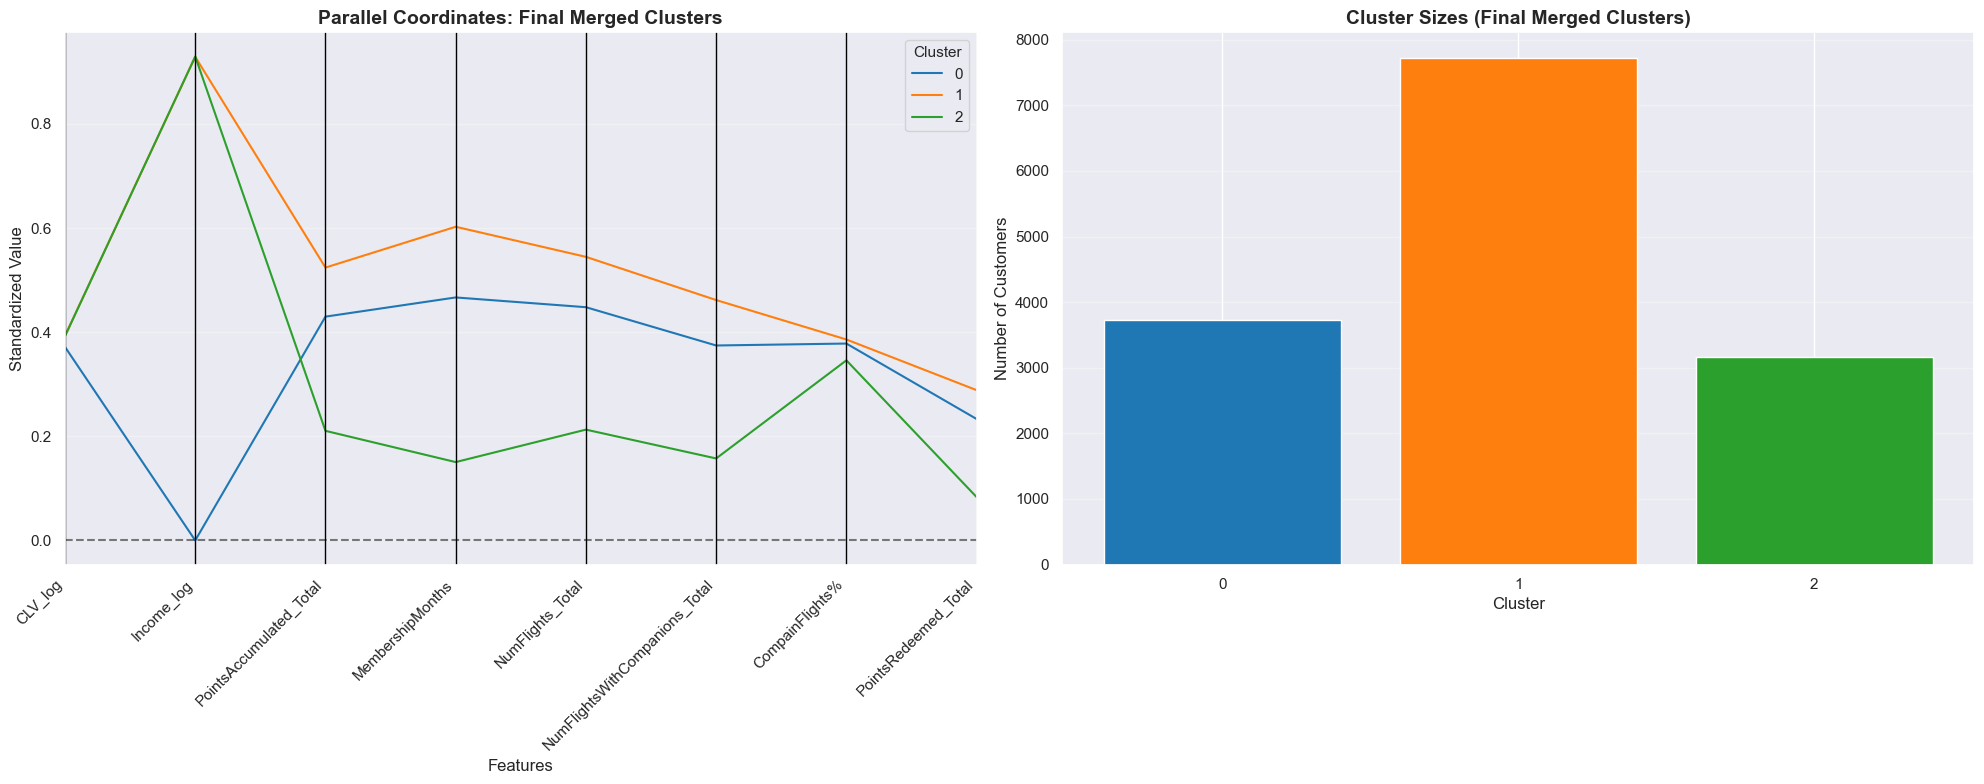

In [3282]:
cluster_col = "final_cluster"

all_segments = sorted(df_minmax[cluster_col].unique())

df_all_centroids = (
    df_minmax
    .groupby(cluster_col)[metric_features]
    .mean()
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# LEFT PLOT: Parallel coordinates (centróides)
pd.plotting.parallel_coordinates(
    df_all_centroids.reset_index(),
    class_column=cluster_col,
    color=sns.color_palette("tab10", n_colors=len(all_segments)),
    ax=ax1
)

ax1.axhline(y=0, color="black", linestyle="--", alpha=0.5, linewidth=1.5)
ax1.set_title("Parallel Coordinates: Final Merged Clusters", fontsize=14, fontweight="bold")
ax1.set_ylabel("Standardized Value", fontsize=12)
ax1.set_xlabel("Features", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax1.legend(title="Cluster", loc="best", title_fontsize=11)
ax1.grid(True, alpha=0.3)

# RIGHT PLOT: Cluster sizes
cluster_sizes = df_minmax[cluster_col].value_counts().sort_index()
colors = sns.color_palette("tab10", n_colors=len(all_segments))

ax2.bar(
    cluster_sizes.index.astype(str),
    cluster_sizes.values,
    color=colors
)
ax2.set_xlabel("Cluster", fontsize=12)
ax2.set_ylabel("Number of Customers", fontsize=12)
ax2.set_title("Cluster Sizes (Final Merged Clusters)", fontsize=14, fontweight="bold")
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

**Cluster 1 — High Value & High Engagement Core (orange)**

Size: ~7,700 customers (largest cluster)

**Profile**

Income_log: well above average
CLV_log: above average
PointsAccumulated & PointsRedeemed: high
MembershipMonths: high (long-standing customers)
NumFlights (total and with companions): high
CompanionFlights%: high

**Interpretation**

This is the core segment of the business:

Frequent customers
Financially strong
Highly engaged with the loyalty program
They consistently extract and generate value

**Strategy**

Prioritized retention
Premium and exclusive benefits
Targeted upselling and cross-selling
Active churn management (customers “too valuable to lose”)

**Cluster 0 — Moderate Value & Engaged Travelers (blue)**

Size: ~3,700 customers

**Profile**

Income_log: below average
CLV_log: slightly above average
Flight activity: moderate
Points usage: moderate
MembershipMonths: medium-high
Interpretation

**Customers:**

Loyal and active
Consistent engagement, but lower purchasing power
Good balance between frequency and program usage
Strategy
Advancement incentives (status tiers)
Rewards for increased frequency
Engagement campaigns to scale value over time

**Cluster 2 — Low-value and low-engagement users (green)**

Size: ~3,100 customers (smallest cluster)

**Profile**

Income_log: above average
CLV_log: below average
NumFlights & MembershipMonths: low
PointsRedeemed: very low
Overall engagement: reduced

**Interpretation**

This cluster Represents untapped potential:

Financial capacity exists
But there is low utilization of the program. May include occasional or poorly informed clients.

**Strategy**

Activation and onboarding campaigns. Education about program benefits. Simple incentives for first redemption. Personalized and low-cost communication.

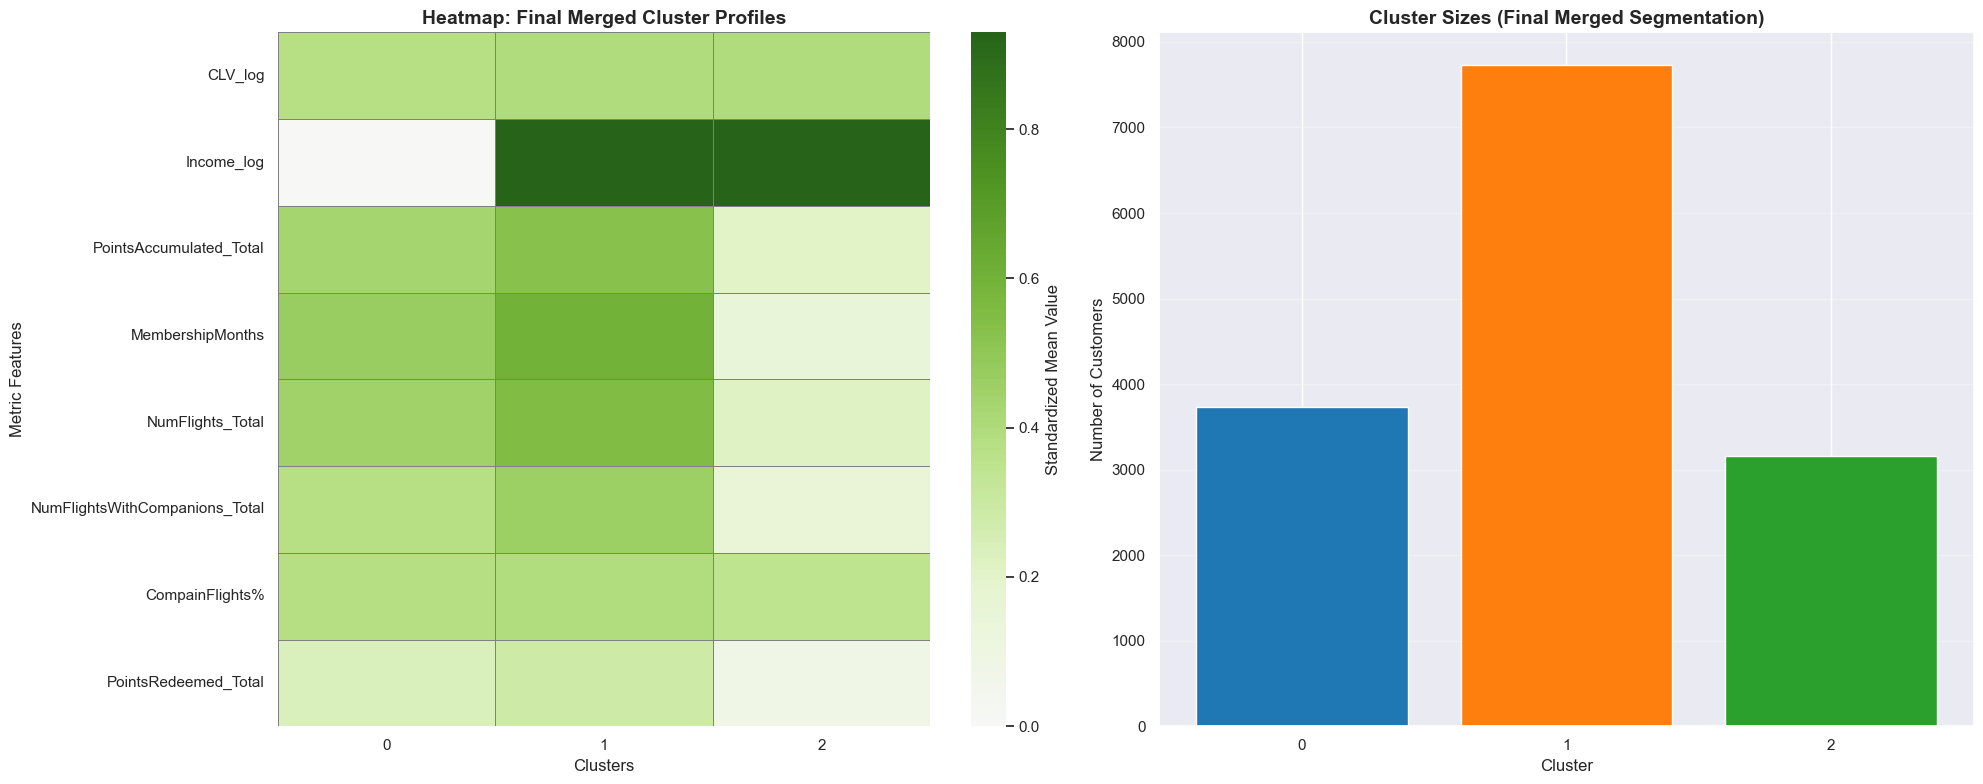

In [3289]:
cluster_col = "final_cluster"

all_segments = sorted(df_minmax[cluster_col].unique())

df_all_centroids = (
    df_minmax
    .groupby(cluster_col)[metric_features]
    .mean()
    .T  # transpose → features nas linhas
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ---------------------------------------
# LEFT PLOT: Heatmap of centróides
# ---------------------------------------
sns.heatmap(
    df_all_centroids,
    cmap="PiYG",
    center=0,
    linewidths=0.5,
    linecolor="gray",
    ax=ax1,
    cbar_kws={"label": "Standardized Mean Value"}
)

ax1.set_title(
    "Heatmap: Final Merged Cluster Profiles",
    fontsize=14,
    fontweight="bold"
)
ax1.set_ylabel("Metric Features", fontsize=12)
ax1.set_xlabel("Clusters", fontsize=12)
ax1.tick_params(axis="x", rotation=0)
ax1.tick_params(axis="y", rotation=0)
ax1.grid(False)

# ---------------------------------------
# RIGHT PLOT: Size of clusters
# ---------------------------------------
cluster_sizes = df_minmax[cluster_col].value_counts().sort_index()
colors = sns.color_palette("tab10", n_colors=len(all_segments))

ax2.bar(
    cluster_sizes.index.astype(str),
    cluster_sizes.values,
    color=colors
)

ax2.set_xlabel("Cluster", fontsize=12)
ax2.set_ylabel("Number of Customers", fontsize=12)
ax2.set_title(
    "Cluster Sizes (Final Merged Segmentation)",
    fontsize=14,
    fontweight="bold"
)
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

### **<span style="color:#c3d664;">5.1.2. Non Metric features</span>**<a id="profiling"></a>

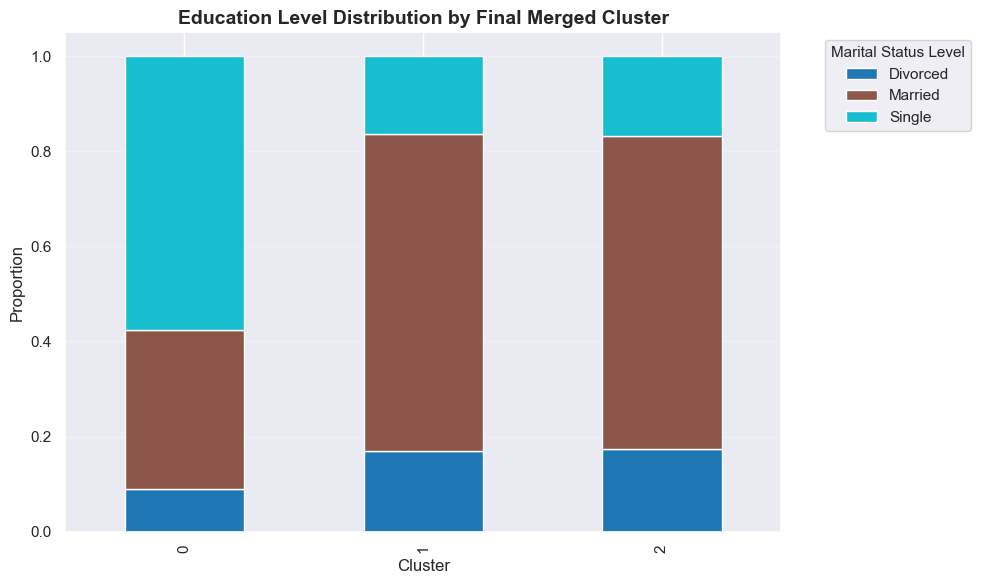

In [3291]:
cluster_col = "final_cluster"
education_col = "Marital Status"

# ---------------------------------------
# Crosstab normalized by cluster
# ---------------------------------------
education_dist = pd.crosstab(
    df_minmax[cluster_col],
    df_minmax[education_col],
    normalize="index"
)

# ---------------------------------------
# Plot: stacked bar chart
# ---------------------------------------
ax = education_dist.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab10"
)

ax.set_title(
    "Education Level Distribution by Final Merged Cluster",
    fontsize=14,
    fontweight="bold"
)
ax.set_xlabel("Cluster", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

ax.legend(
    title="Marital Status Level",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title_fontsize=11
)

ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

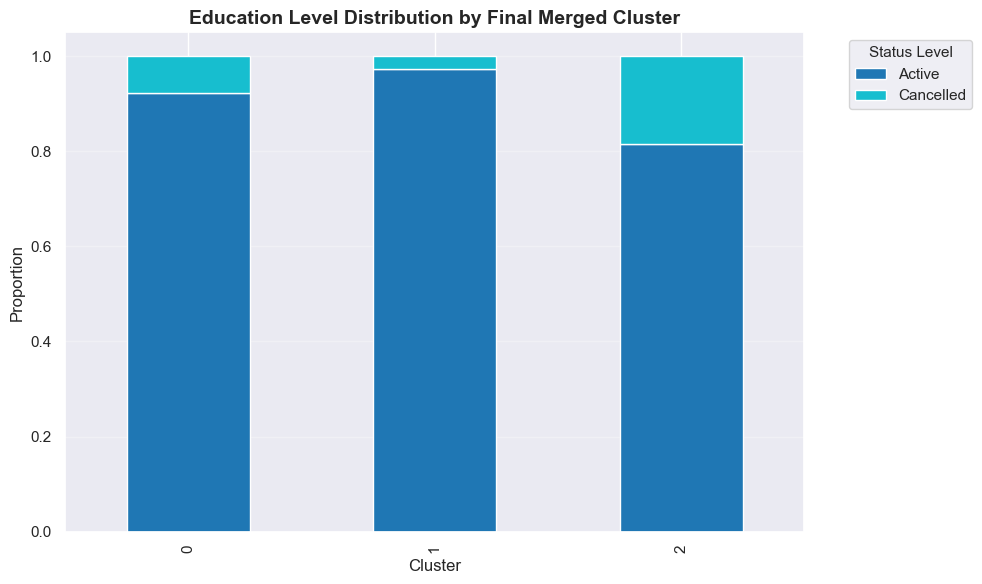

In [3293]:
cluster_col = "final_cluster"
education_col = "Status"

education_dist = pd.crosstab(
    df_minmax[cluster_col],
    df_minmax[education_col],
    normalize="index"
)

ax = education_dist.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab10"
)

ax.set_title(
    "Education Level Distribution by Final Merged Cluster",
    fontsize=14,
    fontweight="bold"
)
ax.set_xlabel("Cluster", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

ax.legend(
    title="Status Level",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title_fontsize=11
)

ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

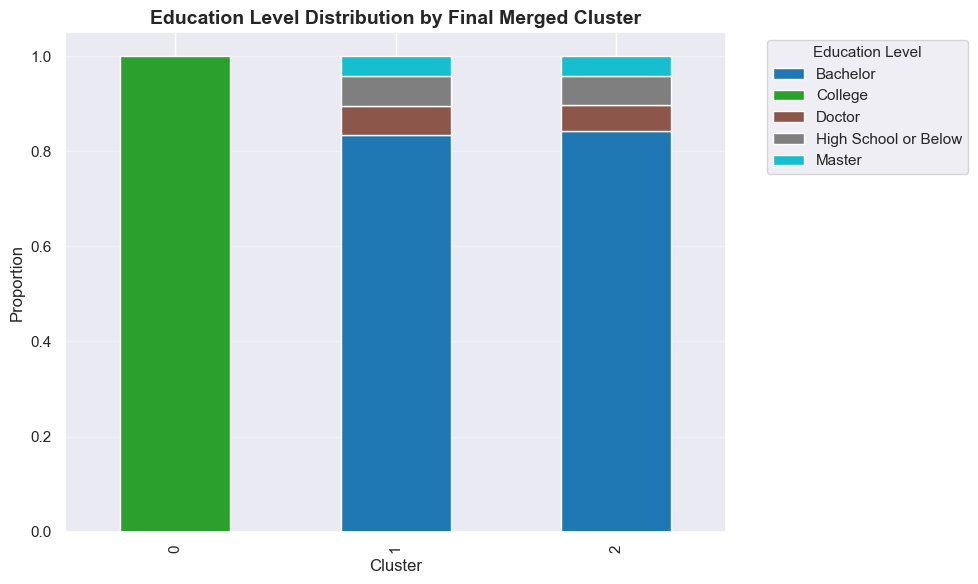

In [3295]:
cluster_col = "final_cluster"
education_col = "Education"

education_dist = pd.crosstab(
    df_minmax[cluster_col],
    df_minmax[education_col],
    normalize="index"
)

ax = education_dist.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab10"
)

ax.set_title(
    "Education Level Distribution by Final Merged Cluster",
    fontsize=14,
    fontweight="bold"
)
ax.set_xlabel("Cluster", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

ax.legend(
    title="Education Level",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title_fontsize=11
)

ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **6. Feature Importance** <a id="Flights"></a>   
    
</a>
    
</div>

To assess the contribution of each metric feature to the final merged segmentation, R² values were computed to quantify the proportion of variance explained by the clustering solution. Features with higher R² values exhibit greater discriminatory power across customer segments, indicating their relevance in defining the final segmentation.

In [3299]:
def get_ss_variables(df):
    """
    Computes the Sum of Squares (SS) for each variable.
    """
    return df.var() * (df.count() - 1)

def r2_variables(df, cluster_col):
    """
    Computes R² (variance explained) for each variable
    with respect to the clustering solution.
    """
    sst_vars = get_ss_variables(df.drop(columns=[cluster_col]))
    
    ssw_vars = (
        df
        .groupby(cluster_col)
        .apply(lambda x: get_ss_variables(x.drop(columns=[cluster_col])))
        .sum()
    )
    
    return 1 - (ssw_vars / sst_vars)

In [3301]:
r2_feats = r2_variables(
    df_minmax[metric_features + ['final_cluster']],
    cluster_col='final_cluster'
)

r2_feats

CLV_log                           0.001996
Income_log                        0.989960
PointsAccumulated_Total           0.423050
MembershipMonths                  0.362498
NumFlights_Total                  0.441191
NumFlightsWithCompanions_Total    0.351053
CompainFlights%                   0.010261
PointsRedeemed_Total              0.151856
dtype: float64

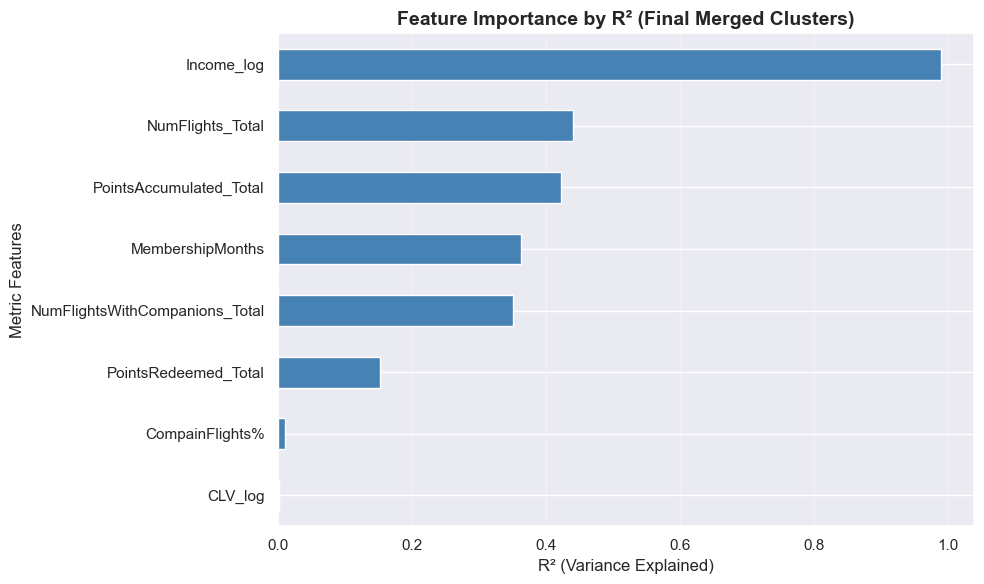

In [3303]:
r2_feats.sort_values().plot.barh(figsize=(10, 6), color="steelblue")

plt.title(
    "Feature Importance by R² (Final Merged Clusters)",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel("R² (Variance Explained)", fontsize=12)
plt.ylabel("Metric Features", fontsize=12)
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">   
<a class="anchor" id="5th-bullet">  

# **7. Cluster Visualization** <a id="Flights"></a>   
    
</a>
    
</div>

## **<span style="color:#c3d664;">7.1 PCA</span>**<a id="behavior-perspective"></a>

In [3307]:
from sklearn.decomposition import PCA

cluster_col = "final_cluster"

# ---------------------------------------
# 1) Apply PCA (2 components)
# ---------------------------------------

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_minmax[metric_features])

# add PCA to dataframe
df_minmax["pca_1"] = X_pca[:, 0]
df_minmax["pca_2"] = X_pca[:, 1]

var_explained = pca.explained_variance_ratio_

print("PCA Variance Explained:")
print(f"  PC1:   {var_explained[0]:.1%}")
print(f"  PC2:   {var_explained[1]:.1%}")
print(f"  Total: {var_explained.sum():.1%}")

PCA Variance Explained:
  PC1:   34.8%
  PC2:   33.0%
  Total: 67.9%


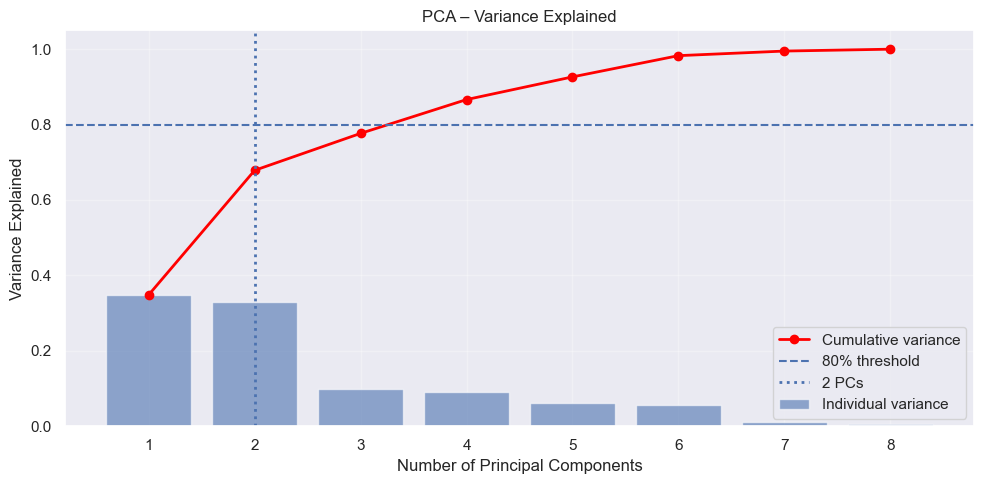

In [3309]:
pca_full = PCA(n_components=len(metric_features), random_state=42)
pca_full.fit(df_minmax[metric_features])

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    range(1, len(metric_features) + 1),
    pca_full.explained_variance_ratio_,
    alpha=0.6,
    label="Individual variance"
)

ax.plot(
    range(1, len(metric_features) + 1),
    cumulative_variance,
    marker="o",
    color='red',
    linewidth=2,
    label="Cumulative variance"
)

ax.axhline(0.80, linestyle="--", linewidth=1.5, label="80% threshold")
ax.axvline(2, linestyle=":", linewidth=2, label="2 PCs")

ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Variance Explained")
ax.set_title("PCA – Variance Explained")
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

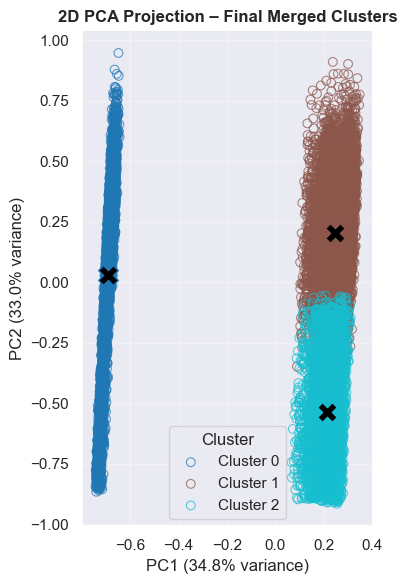

In [3311]:
# ---------------------------------------
# 3) project PCA 2D with final clusters 
# ---------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

clusters = sorted(df_minmax[cluster_col].unique())
colors = cm.tab10(np.linspace(0, 1, len(clusters)))

for label, color in zip(clusters, colors):
    cluster_data = df_minmax[df_minmax[cluster_col] == label]

    ax.scatter(
    cluster_data["pca_1"],
    cluster_data["pca_2"],
    c="none",
    edgecolors=[color],
    s=40,
    linewidths=0.8,
    alpha=0.7,
    label=f"Cluster {label}"
)

    # Centróide
    ax.scatter(
        cluster_data["pca_1"].mean(),
        cluster_data["pca_2"].mean(),
        marker="X",
        s=200,
        color="black",
        edgecolors=color,
        linewidths=1,
        zorder=10
    )

ax.set_xlabel(f"PC1 ({var_explained[0]:.1%} variance)")
ax.set_ylabel(f"PC2 ({var_explained[1]:.1%} variance)")
ax.set_title("2D PCA Projection – Final Merged Clusters", fontweight="bold")
ax.legend(title="Cluster")
ax.grid(alpha=0.3)
ax.set_aspect("equal")

plt.tight_layout()
plt.show()

In [3313]:
pc_corr = df_minmax[metric_features+['pca_1', 'pca_2']].corr().round(3)
pc_corr = pc_corr.loc[metric_features, ['pca_1', 'pca_2']]
pc_corr

pca_1  pca_2
CLV_log                         0.062 -0.000
Income_log                      0.999 -0.047
PointsAccumulated_Total         0.048  0.861
MembershipMonths                0.049  0.844
NumFlights_Total                0.041  0.869
NumFlightsWithCompanions_Total  0.033  0.806
CompainFlights%                -0.006  0.171
PointsRedeemed_Total            0.013  0.554

In [3315]:
#  Interpret PCA components (feature loadings)
# What do PC1 and PC2 represent?

loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=metric_features
)

print("PCA Component Loadings (Feature Contributions):\n")
print(loadings.round(3))

PCA Component Loadings (Feature Contributions):

                                  PC1    PC2
CLV_log                         0.031 -0.000
Income_log                      0.998 -0.048
PointsAccumulated_Total         0.022  0.410
MembershipMonths                0.035  0.625
NumFlights_Total                0.020  0.429
NumFlightsWithCompanions_Total  0.016  0.409
CompainFlights%                -0.002  0.067
PointsRedeemed_Total            0.007  0.288


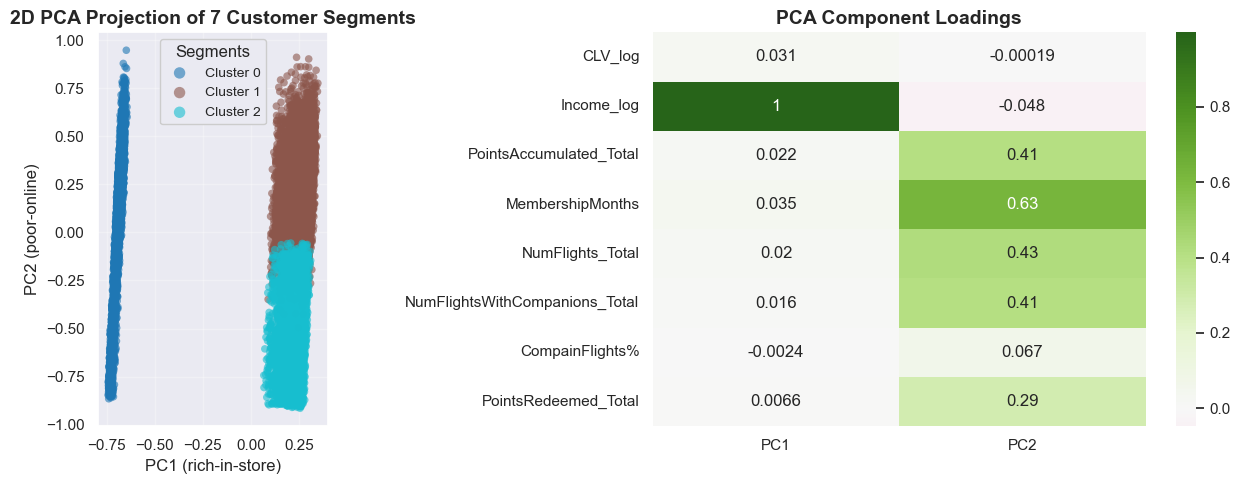

In [3319]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cluster_col = "final_cluster"
# PCA Projection
ax = axes[0]
for label in sorted(df_minmax[cluster_col].unique()):
    cluster_data = df_minmax[df_minmax[cluster_col] == label]
    ax.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        c=[colors[label]],
        alpha=0.6,
        s=30,
        edgecolors='none',
        label=f'Cluster {label}'
    )
ax.set_xlabel(f'PC1 (rich-in-store)', fontsize=12)
ax.set_ylabel(f'PC2 (poor-online)', fontsize=12)
ax.legend(loc='best', framealpha=1, title='Segments', fontsize=10, markerscale=1.5)
ax.set_title('2D PCA Projection of 7 Customer Segments', fontsize=14, weight='bold')
ax.grid(True, alpha=0.3)
ax.set_aspect(1)

# Loadings Heatmap
ax = axes[1]
sns.heatmap(loadings, annot=True, cmap='PiYG', center=0, ax=ax)
ax.set_title('PCA Component Loadings', fontsize=14, weight='bold')  
plt.tight_layout()
plt.show()

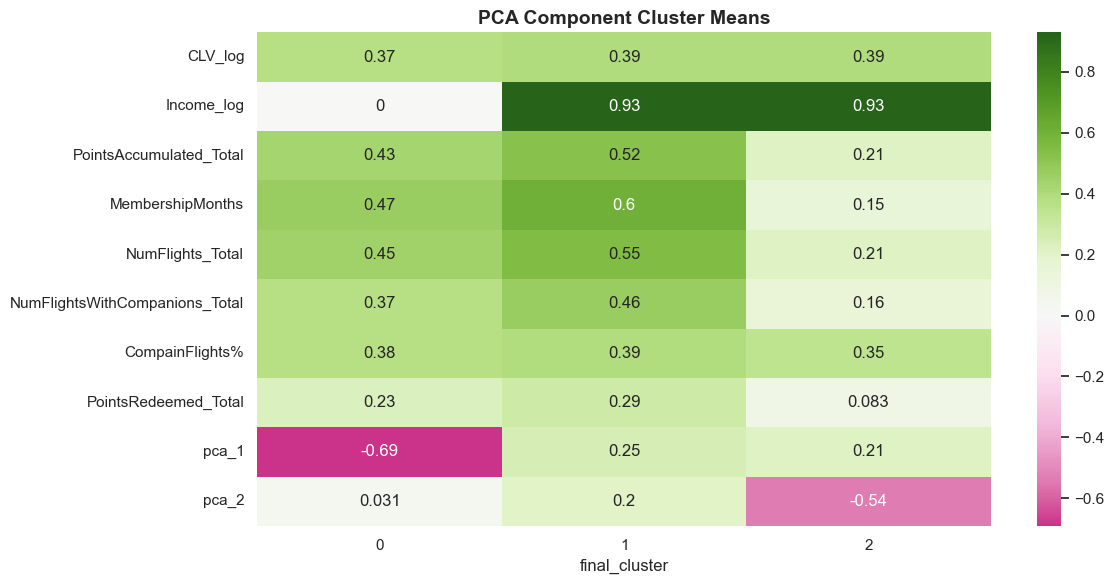

In [3321]:
pc_cluster = df_minmax[metric_features+[cluster_col, 'pca_1', 'pca_2']].groupby(cluster_col).mean().round(3).T

fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(pc_cluster, annot=True, cmap='PiYG', center=0, ax=ax)
ax.set_title('PCA Component Cluster Means', fontsize=14, weight='bold')  

plt.tight_layout()
plt.show()

## **<span style="color:#c3d664;">7.2 t-SNE</span>**<a id="behavior-perspective"></a>

In [3324]:
from sklearn.manifold import TSNE

perplexity_values = [2, 30, 50]
tsne_results = {}

for perp in perplexity_values:
    print(f"Computing t-SNE with perplexity={perp}...")
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        random_state=42,
        max_iter=1000,
        learning_rate='auto',
        init='random'
    )
    X_tsne = tsne.fit_transform(df_minmax[metric_features])
    tsne_results[perp] = X_tsne

Computing t-SNE with perplexity=2...
Computing t-SNE with perplexity=30...
Computing t-SNE with perplexity=50...


In [3325]:
tsne_results[2].shape

(14617, 2)

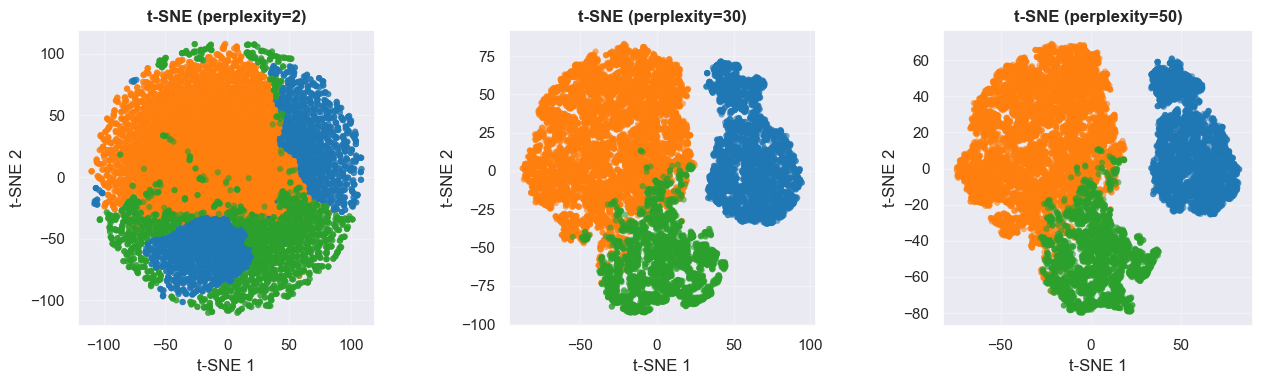

In [3326]:
# Visualize perplexity comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Get number of unique clusters
n_clusters = df_minmax[cluster_col].nunique()

# Create color map
colors = cm.tab10(np.linspace(0, 1, 10))

for idx, perp in enumerate(perplexity_values):
    ax = axes[idx]
    X_tsne = tsne_results[perp]
    
    # Plot each cluster separately for legend
    for label in sorted(df_minmax[cluster_col].unique()):
        mask = df_minmax[cluster_col] == label
        ax.scatter(
            X_tsne[mask, 0],
            X_tsne[mask, 1],
            c=[colors[label]],
            alpha=0.6,
            s=20,
            edgecolors='none',
            label=f'Cluster {label}' if idx == 0 else ''  # Only label first subplot
        )
    
    ax.set_title(f't-SNE (perplexity={perp})', fontsize=12, weight='bold')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_aspect(1)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Make room for legend
plt.show()

In [3327]:
#  Stability test - multiple runs with same perplexity
perp_test = 5
random_seeds = [42, 3970266, 109726]
stability_results = {}

print(f"Testing stability with perplexity={perp_test}\n")
for seed in random_seeds:
    print(f"Run with random_state={seed}")
    tsne = TSNE(
        n_components=2,
        perplexity=perp_test,
        random_state=seed,
        max_iter=1000,
        learning_rate='auto',
        init='random'
    )
    X_tsne = tsne.fit_transform(df_minmax[metric_features])
    stability_results[seed] = X_tsne

Testing stability with perplexity=5

Run with random_state=42
Run with random_state=3970266
Run with random_state=109726


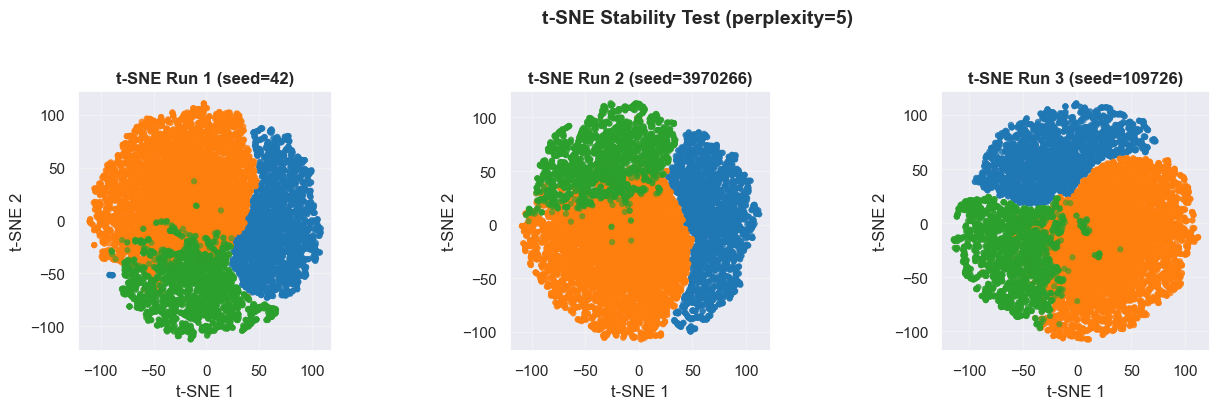

In [3328]:
# Visualize stability comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Get number of unique clusters
n_clusters = df_minmax[cluster_col].nunique()

# Create color map
colors = cm.tab10(np.linspace(0, 1, 10))

for idx, seed in enumerate(random_seeds):
    ax = axes[idx]
    X_tsne = stability_results[seed]
    
    # Plot each cluster separately for legend
    for label in sorted(df_minmax[cluster_col].unique()):
        mask = df_minmax[cluster_col] == label
        ax.scatter(
            X_tsne[mask, 0],
            X_tsne[mask, 1],
            c=[colors[label]],
            alpha=0.6,
            s=20,
            edgecolors='none',
            label=f'Cluster {label}' if idx == 0 else ''  # Only label first subplot
        )
    
    ax.set_title(f't-SNE Run {idx+1} (seed={seed})', fontsize=12, weight='bold')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_aspect(1)
    ax.grid(True, alpha=0.3)

plt.suptitle(f't-SNE Stability Test (perplexity={perp_test})', 
             fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Make room for legend
plt.savefig('tsne_stability_test.png', bbox_inches='tight')

plt.show()

In [3329]:
tsne_results[30] = TSNE(
    n_components=2,
    perplexity=30,
    random_state=109726,
    max_iter=1000,
    learning_rate='auto',
    init='pca'  # Changed from 'random' to 'pca'
).fit_transform(df_minmax[metric_features])

## **<span style="color:#c3d664;">7.3 UMAP</span>**<a id="behavior-perspective"></a>

In [3331]:
#!pip install umap-learn

In [3332]:
import umap

#  UMAP with different n_neighbors
n_neighbors_values = [2, 15, 100]
umap_results = {}

print("Running UMAP with different n_neighbors values\n")

for n_neigh in n_neighbors_values:
    print(f"Computing UMAP with n_neighbors={n_neigh}")
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neigh,
        min_dist=0.1,
        random_state=42,
        n_jobs=1
    )
    X_umap = reducer.fit_transform(df_minmax[metric_features])
    umap_results[n_neigh] = X_umap

Running UMAP with different n_neighbors values

Computing UMAP with n_neighbors=2
Computing UMAP with n_neighbors=15
Computing UMAP with n_neighbors=100


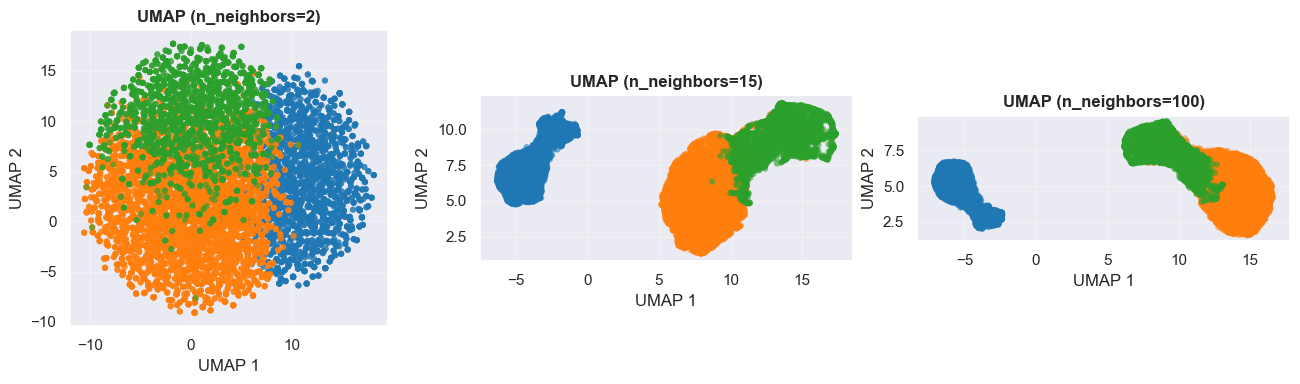

In [3333]:
# Visualize n_neighbors comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

titles = [
    'UMAP (n_neighbors=2)',
    'UMAP (n_neighbors=15)',
    'UMAP (n_neighbors=100)'
]

# Get number of unique clusters
n_clusters = df_minmax[cluster_col].nunique()

# Create color map
colors = cm.tab10(np.linspace(0, 1, 10))

for idx, n_neigh in enumerate(n_neighbors_values):
    ax = axes[idx]
    X_umap = umap_results[n_neigh]
    
    # Plot each cluster separately for legend
    for label in sorted(df_minmax[cluster_col].unique()):
        mask = df_minmax[cluster_col] == label
        ax.scatter(
            X_umap[mask, 0],
            X_umap[mask, 1],
            c=[colors[label]],
            alpha=0.6,
            s=20,
            edgecolors='none',
            label=f'Cluster {label}' if idx == 0 else ''  # Only label first subplot
        )
    
    ax.set_title(titles[idx], fontsize=12, weight='bold')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_aspect(1)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Make room for legend

plt.show()

In [3334]:
#UMAP with different min_dist
min_dist_values = [0.0, 0.1, 0.99]
umap_mindist_results = {}

print("Running UMAP with different min_dist values...\n")

for min_d in min_dist_values:
    print(f"Computing UMAP with min_dist={min_d}")
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=15,
        min_dist=min_d,
        random_state=42,
        n_jobs=1
    )
    X_umap = reducer.fit_transform(df_minmax[metric_features])
    umap_mindist_results[min_d] = X_umap

Running UMAP with different min_dist values...

Computing UMAP with min_dist=0.0
Computing UMAP with min_dist=0.1
Computing UMAP with min_dist=0.99


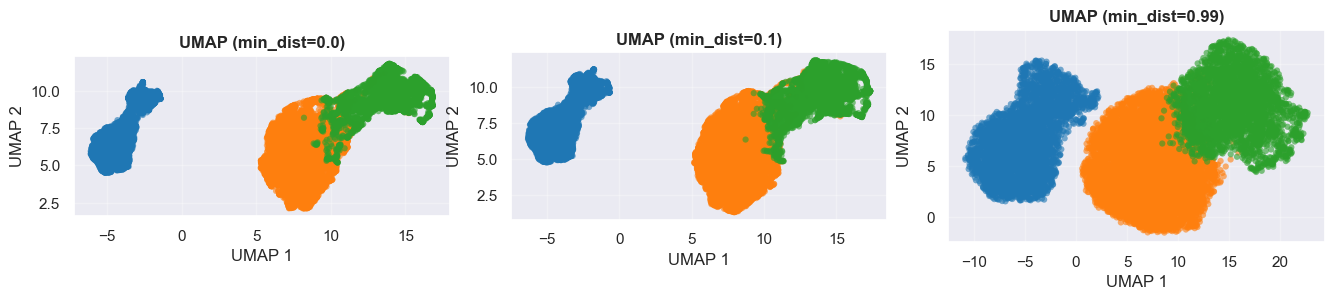

In [3335]:
#Visualize min_dist comparison WITH LEGEND
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

titles = [
    'UMAP (min_dist=0.0)',
    'UMAP (min_dist=0.1)',
    'UMAP (min_dist=0.99)'
]

# Get number of unique clusters
n_clusters = df_minmax[cluster_col].nunique()

# Create color map
colors = cm.tab10(np.linspace(0, 1, 10))

# Plot UMAP visualizations
for idx, min_d in enumerate(min_dist_values):
    ax = axes[idx]
    X_umap = umap_mindist_results[min_d]
    
    # Plot each cluster separately for legend
    for label in sorted(df_minmax[cluster_col].unique()):
        mask = df_minmax[cluster_col] == label
        ax.scatter(
            X_umap[mask, 0],
            X_umap[mask, 1],
            c=[colors[label]],
            alpha=0.6,
            s=20,
            edgecolors='none',
            label=f'Cluster {label}' if idx == 0 else ''  # Only label first subplot
        )
    
    ax.set_title(titles[idx], fontsize=12, weight='bold')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_aspect(1)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Make room for legend

plt.show()

## **<span style="color:#c3d664;">7.4 Multi-method Comparison</span>**<a id="behavior-perspective"></a>

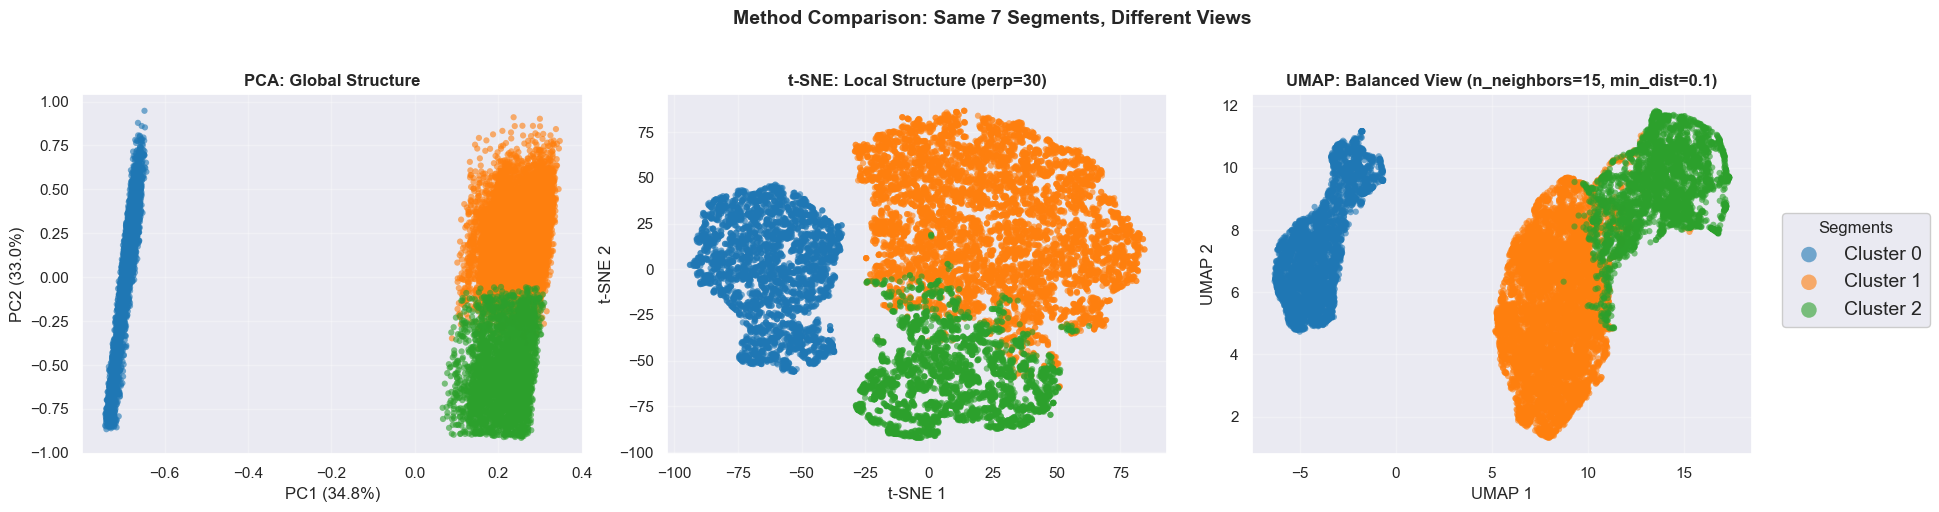

In [3336]:
# Side-by-side method comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get number of unique clusters
n_clusters = df_minmax[cluster_col].nunique()

# Create color map
colors = cm.tab10(np.linspace(0, 1, 10))

# PCA
for label in sorted(df_minmax[cluster_col].unique()):
    mask = df_minmax[cluster_col] == label
    axes[0].scatter(
        df_minmax.loc[mask, 'pca_1'], 
        df_minmax.loc[mask, 'pca_2'], 
        c=[colors[label]], 
        alpha=0.6, 
        s=20, 
        edgecolors='none',
        label=f'Cluster {label}'
    )
axes[0].set_title('PCA: Global Structure', fontsize=12, weight='bold')
axes[0].set_xlabel(f'PC1 ({var_explained[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({var_explained[1]:.1%})')
axes[0].grid(True, alpha=0.3)

# t-SNE (perplexity=30)
X_tsne_30 = tsne_results[30]
for label in sorted(df_minmax[cluster_col].unique()):
    mask = df_minmax[cluster_col] == label
    axes[1].scatter(
        X_tsne_30[mask, 0], 
        X_tsne_30[mask, 1], 
        c=[colors[label]], 
        alpha=0.6, 
        s=20, 
        edgecolors='none'
    )
axes[1].set_title('t-SNE: Local Structure (perp=30)', fontsize=12, weight='bold')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

# UMAP (n_neighbors=15, min_dist=0.1)
X_umap_balanced = umap_results[15]
for label in sorted(df_minmax[cluster_col].unique()):
    mask = df_minmax[cluster_col] == label
    axes[2].scatter(
        X_umap_balanced[mask, 0], 
        X_umap_balanced[mask, 1], 
        c=[colors[label]], 
        alpha=0.6, 
        s=20, 
        edgecolors='none'
    )
axes[2].set_title('UMAP: Balanced View (n_neighbors=15, min_dist=0.1)', fontsize=12, weight='bold')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True, alpha=0.3)

# Add legend to the right of all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.89, 0.5), 
           framealpha=1, title='Segments', fontsize=14, markerscale=2.5)

plt.suptitle('Method Comparison: Same 7 Segments, Different Views', 
             fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Make room for legend
plt.show()

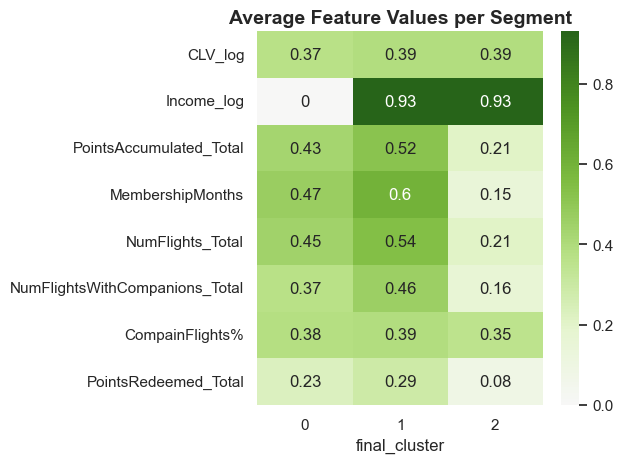

In [3337]:
corr = df_minmax.groupby(cluster_col)[metric_features].mean().round(2)
corr = corr.T

sns.heatmap(corr, annot=True, cmap='PiYG', center=0)
plt.title('Average Feature Values per Segment', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Comprehensive Method Comparison:

| Aspect | PCA | t-SNE | UMAP |
|--------|-----|--------|------|
| **Interpretability** | High (linear combos) | Low (abstract axes) | Medium (global context) |
| **Stability** | Perfect | Low | High |
| **Detail Level** | Global overview | Local micro-structure | Balanced |
| **Stakeholder Trust** | High (explainable) | Medium (requires explanation) | High (reproducible) |
| **New Data** | Easy projection | Requires recomputation | Can transform |
| **Computation Speed** | Fast | Slow | Fast |
| **Global Structure** | Excellent | Poor | Good |
| **Local Structure** | Poor | Excellent | Good |

## **<span style="color:#c3d664;">7.5 Decision Tree Classifier</span>**<a id="behavior-perspective"></a>

- Train a Decision Tree Classifier model over the cluster labels
- Estimate the respective feature importance (Gini importance)
- Apply the trained model to classify multivariate outliers

In [3340]:
# Preparing the data
X = df_minmax[metric_features]
y = df_minmax[cluster_col]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 94.90% of the customers correctly


In [3341]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Income_log                        0.572776
NumFlights_Total                  0.363164
MembershipMonths                  0.064059
CLV_log                           0.000000
PointsAccumulated_Total           0.000000
NumFlightsWithCompanions_Total    0.000000
CompainFlights%                   0.000000
PointsRedeemed_Total              0.000000
dtype: float64

In [3342]:
# Predicting the cluster labels of the outliers
df_out[cluster_col] = dt.predict(df_out[metric_features])
df_out.head()

Loyalty#      Customer Name Province or State      City   Latitude  \
31     543918         Penni Gess            Quebec  Montreal  45.501690   
70     501704      Jadwiga Howry            Quebec      Hull  45.428730   
224    780631  Josephina Conales           Ontario   Toronto  43.653225   
344    313837        Rudy Hoblit           Ontario   Toronto  43.653225   
488    119408  Cassondra Brannan  British Columbia  Whistler  50.116322   

      Longitude  Gender             Education Location Code Marital Status  \
31   -73.567253    male  High School or Below         Urban        Married   
70   -75.713364    male               College      Suburban       Divorced   
224  -79.383186  female              Bachelor         Rural        Married   
344  -79.383186    male               College         Urban         Single   
488 -122.957360  female               College         Rural         Single   

     ...     Status MembershipMonths   CLV_log Income_log  NumFlights_Total  \
31   ...     Active               73  8.268109   9.292289               261   
70   ...     Active               67  8.287996   0.000000               182   
224  ...     Active                1  8.373891  11.318163                11   
344  ...  Cancelled                8  8.424549   0.000000                41   
488  ...     Active                1  8.468410   0.000000                12   

     NumFlightsWithCompanions_Total  PointsAccumulated_Total  \
31                              100                 44664.93   
70                               50                 36855.85   
224                               9                  1459.00   
344                              28                  6534.00   
488                               9                  2530.00   

     PointsRedeemed_Total  CompainFlights%  final_cluster  
31                42811.3             38.3              1  
70                45023.5             27.5              0  
224                   0.0             81.8              1  
344                   0.0             68.3              0  
488                   0.0             75.0              0  

[5 rows x 23 columns]

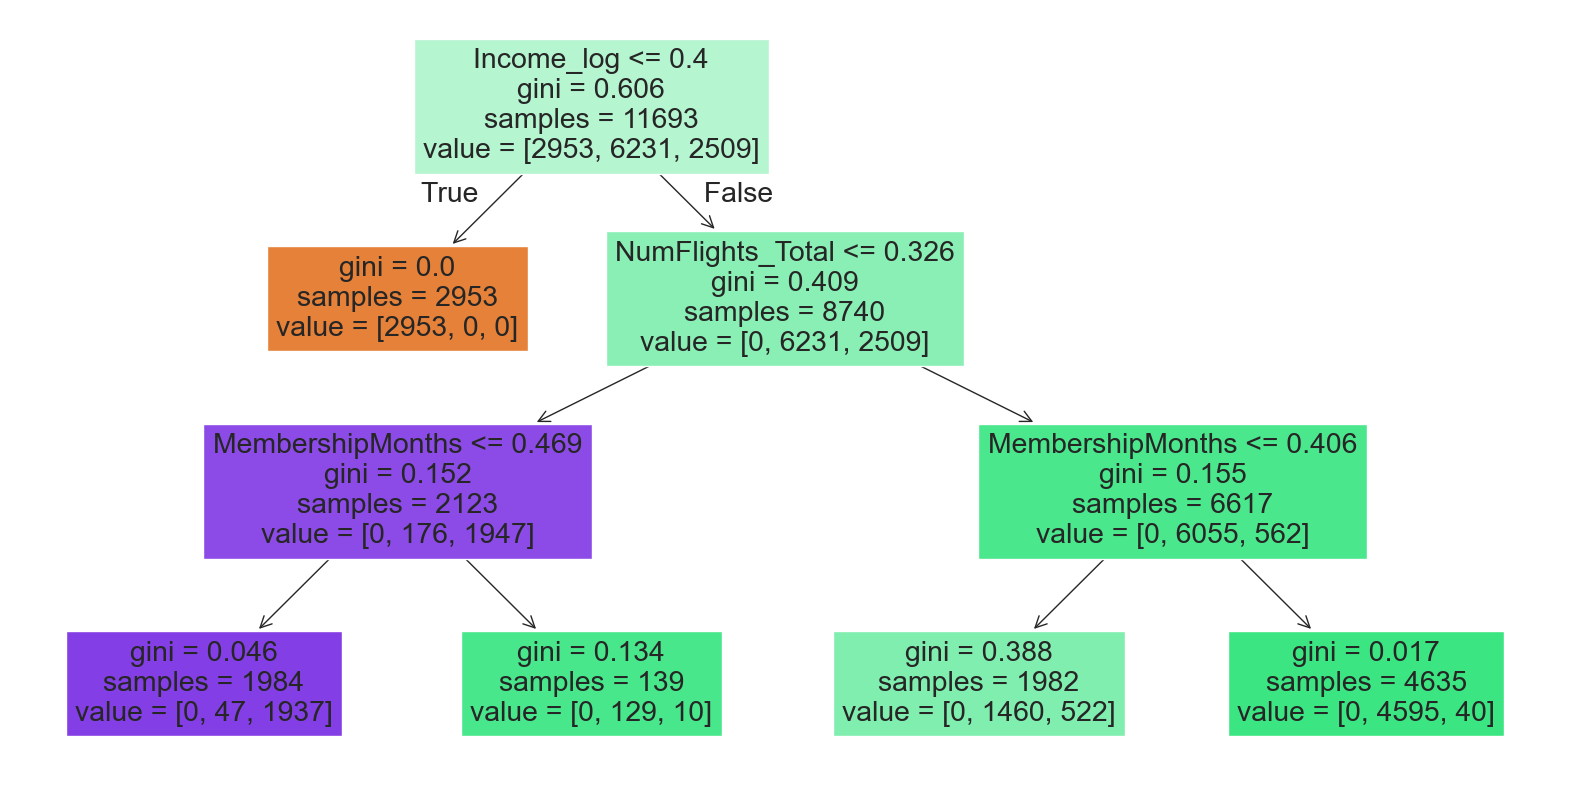

In [3343]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=metric_features, filled=True)
plt.show()

In [3363]:
df_minmax.to_csv("df_minmax.csv", index=False)

Vamos criar uma app web local (dashboard) onde podes:

ver clusters em 3D (rotação/zoom),

filtrar clientes em tempo real,

clicar/ver detalhes de um cliente,

exportar a lista filtrada em CSV.

In [ ]:
#!pip install plotly ipywidgets scikit-learn pyarrow

**Funções:**

In [2514]:
import os

# --------- helpers ---------
def make_range_slider(col, desc=None):
    if col not in DF.columns:
        return None
    vmin = float(np.nanmin(DF[col].values))
    vmax = float(np.nanmax(DF[col].values))
    if np.isclose(vmin, vmax):
        vmax = vmin + 1e-6
    return widgets.FloatRangeSlider(
        value=[vmin, vmax],
        min=vmin,
        max=vmax,
        step=(vmax - vmin) / 200 if vmax > vmin else 0.01,
        description=desc or col,
        continuous_update=False,
        layout=widgets.Layout(width="420px")
    )

def apply_filters():
    fdf = DF[DF[CLUSTER_COL].isin(list(w_clusters.value))].copy()

    # mapeamento descriptions -> colunas reais
    desc_to_col = {
        "Flights": "NumFlights_Total",
        "Pts Acc": "PointsAccumulated_Total",
        "Pts Red": "PointsRedeemed_Total",
        "Income_log": "Income_log",
        "CLV_log": "CLV_log"
    }

    for rw in range_widgets:
        col = desc_to_col.get(rw.description, rw.description)
        lo, hi = rw.value
        if col in fdf.columns:
            fdf = fdf[fdf[col].between(lo, hi)]

    return fdf

def update_customer_dropdown(fdf):
    ids = fdf[ID_COL].astype(str).unique().tolist()
    ids = ids[:5000]  # proteção
    w_customer.options = ids
    w_customer.value = ids[0] if len(ids) > 0 else None

def draw_plot_widget(fdf):
    hover_cols = [ID_COL, CLUSTER_COL] + [c for c in [
        "Income_log","CLV_log","NumFlights_Total",
        "PointsAccumulated_Total","PointsRedeemed_Total"
    ] if c in fdf.columns]

    fig = px.scatter_3d(
        fdf,
        x="PC1", y="PC2", z="PC3",
        color=CLUSTER_COL,
        hover_data=hover_cols,
        opacity=0.85
    )
    fig.update_layout(height=650, legend_title_text="Cluster")

    # 👇 isto evita overlay e duplicação
    return fig

def on_export_clicked(btn):
    fdf = apply_filters()
    with out_export:
        clear_output(wait=True)
        if len(fdf) == 0:
            print("Nothing to export (empty after filters).")
            return
        fname = "filtered_clusters.csv"
        fdf.to_csv(fname, index=False)
        print(f"Exported: {fname} | Rows: {len(fdf):,} | Path: {os.path.abspath(fname)}")

def render(_=None):
    fdf = apply_filters()

    # --- plot ---
    with out_plot:
        clear_output(wait=True)
        print(f"Filtered rows: {len(fdf):,} / {len(DF):,}")
        if len(fdf) == 0:
            print("No data after filters.")
        else:
            update_customer_dropdown(fdf)
            figw = draw_plot_widget(fdf)
            display(figw)

    # --- detail ---
    with out_detail:
        clear_output(wait=True)
        if len(fdf) == 0 or w_customer.value is None:
            print("No customer to display.")
            return

        row = fdf[fdf[ID_COL].astype(str) == str(w_customer.value)].iloc[0]
        detail_cols = [ID_COL, CLUSTER_COL] + [c for c in FEATURES if c in fdf.columns]
        display(row[detail_cols].to_frame().T)  # 


In [2516]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go



# A) AJUSTA ESTES 2 CAMPOS AO TEU PROJETO

DF = df_minmax.copy()                 # <- teu dataframe final (clientes)
CLUSTER_COL = "final_cluster"        # <- ou "final_cluster"
ID_COL = "Loyalty#" if "Loyalty#" in DF.columns else None

# se não tiveres um ID, criamos um
if ID_COL is None:
    DF["customer_id"] = DF.index.astype(str)
    ID_COL = "customer_id"

# features que queres visualizar (ideal: as do merge/segmentation)
# usa a tua lista metric_features (já existe no teu projeto)
FEATURES = metric_features


# B) CRIAR COORDENADAS 3D (PCA) PARA VISUALIZAÇÃO

X = DF[FEATURES].copy()

# garantir que são numéricas
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3, random_state=42)
coords = pca.fit_transform(X_scaled)

DF["PC1"] = coords[:, 0]
DF["PC2"] = coords[:, 1]
DF["PC3"] = coords[:, 2]

# WIDGETS (FILTROS)

clusters = sorted(DF[CLUSTER_COL].unique().tolist())

w_clusters = widgets.SelectMultiple(
    options=clusters,
    value=tuple(clusters),
    description="Clusters",
    layout=widgets.Layout(width="300px", height="120px")
)

# Ajusta aqui que filtros queres disponibilizar
w_income = make_range_slider("Income_log", "Income_log")
w_clv = make_range_slider("CLV_log", "CLV_log")
w_flights = make_range_slider("NumFlights_Total", "Flights")
w_points_acc = make_range_slider("PointsAccumulated_Total", "Pts Acc")
w_points_red = make_range_slider("PointsRedeemed_Total", "Pts Red")

range_widgets = [w for w in [w_income, w_clv, w_flights, w_points_acc, w_points_red] if w is not None]

# dropdown de cliente (vai ser atualizado após filtros)
w_customer = widgets.Dropdown(
    options=[],
    description="Customer",
    layout=widgets.Layout(width="420px")
)

# botão export
w_export = widgets.Button(
    description="Export filtered CSV",
    button_style="success"
)

# outputs
out_plot = widgets.Output()
out_detail = widgets.Output()
out_export = widgets.Output()

# bind export
w_export.on_click(on_export_clicked)

# bind render on change
w_clusters.observe(lambda c: render(), names="value")
for rw in range_widgets:
    rw.observe(lambda c: render(), names="value")
w_customer.observe(lambda c: render(), names="value")

controls_left = widgets.VBox([w_clusters] + range_widgets)
controls_right = widgets.VBox([w_customer, w_export, out_export])

ui = widgets.HBox([
    controls_left,
    widgets.VBox([controls_right, out_plot, out_detail])
])

display(ui)

# first render
render()